# Importing Dependencies

In [1]:
import warnings
warnings.filterwarnings("ignore")

### PySpark

In [ ]:
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder.appName("LoadHdfsCsv").getOrCreate()

23/05/05 16:31:57 WARN Utils: Your hostname, sujan123-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/05/05 16:31:57 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/05 16:31:57 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [240]:
# Read CSV file from HDFS into PySpark DataFrame
df = spark.read.format("csv").option("header", "true").load("hdfs://localhost:9000/user/hadoop/listings.csv")

In [1156]:
df.show()

+-------+--------------------+----------+------------+---------------+--------------------+--------------------+---------------------+--------------------+-------+--------------------+-------------+----------+-------------+--------------------+------------------+------------------+--------------------+-----------------+--------------------+--------------------+------------------+-------------------+-------------------------+--------------------+--------------------+----------------------+--------------------+----------------------+----------------------------+---------+----------+--------------------+---------------+------------+---------+--------------+--------+----+--------------------+--------+--------------+--------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------+----------------+---------------+---------------+---------------+----------------+---------------------+-----

In [1157]:
df.printSchema()

root
 |-- id: double (nullable = true)
 |-- listing_url: string (nullable = true)
 |-- scrape_id: double (nullable = true)
 |-- last_scraped: string (nullable = true)
 |-- source: string (nullable = true)
 |-- name: string (nullable = true)
 |-- description: string (nullable = true)
 |-- neighborhood_overview: string (nullable = true)
 |-- picture_url: string (nullable = true)
 |-- host_id: long (nullable = true)
 |-- host_url: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- host_since: string (nullable = true)
 |-- host_location: string (nullable = true)
 |-- host_about: string (nullable = true)
 |-- host_response_time: string (nullable = true)
 |-- host_response_rate: string (nullable = true)
 |-- host_acceptance_rate: string (nullable = true)
 |-- host_is_superhost: string (nullable = true)
 |-- host_thumbnail_url: string (nullable = true)
 |-- host_picture_url: string (nullable = true)
 |-- host_neighbourhood: string (nullable = true)
 |-- host_listings_count

In [1158]:
# filtering_cols = list(df1.columns)

### Other dependencies for Visualization purpose

In [1159]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import pymongo
import pandas as pd
import seaborn as sns

# Basic information about the data

In [1160]:
df.show(5)

+------+--------------------+----------+------------+---------------+--------------------+--------------------+---------------------+--------------------+-------+--------------------+-------------+----------+-------------+--------------------+------------------+------------------+--------------------+-----------------+--------------------+--------------------+------------------+-------------------+-------------------------+--------------------+--------------------+----------------------+--------------------+----------------------+----------------------------+--------+---------+--------------------+---------------+------------+---------+--------------+--------+----+--------------------+--------+--------------+--------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------------+----------------+----------------+---------------+---------------+---------------+----------------+---------------------+--------

In [1161]:
# Get the number of rows
num_rows = df.count()

# Get the number of columns
num_cols = len(df.columns)

num_rows, num_cols


(41533, 75)

<b> There are 41533 rows and 75 columns in our data.

In [1162]:
df.printSchema()

root
 |-- id: double (nullable = true)
 |-- listing_url: string (nullable = true)
 |-- scrape_id: double (nullable = true)
 |-- last_scraped: string (nullable = true)
 |-- source: string (nullable = true)
 |-- name: string (nullable = true)
 |-- description: string (nullable = true)
 |-- neighborhood_overview: string (nullable = true)
 |-- picture_url: string (nullable = true)
 |-- host_id: long (nullable = true)
 |-- host_url: string (nullable = true)
 |-- host_name: string (nullable = true)
 |-- host_since: string (nullable = true)
 |-- host_location: string (nullable = true)
 |-- host_about: string (nullable = true)
 |-- host_response_time: string (nullable = true)
 |-- host_response_rate: string (nullable = true)
 |-- host_acceptance_rate: string (nullable = true)
 |-- host_is_superhost: string (nullable = true)
 |-- host_thumbnail_url: string (nullable = true)
 |-- host_picture_url: string (nullable = true)
 |-- host_neighbourhood: string (nullable = true)
 |-- host_listings_count

In [1163]:
# nulls = dict(df.isnull().sum() / df.shape[0] * 100)

In [1164]:
nulls = {col: df.filter(df[col].isNull()).count() / df.count() * 100
         for col in df.columns}


In [1165]:
nulls

{'id': 0.0,
 'listing_url': 0.0,
 'scrape_id': 0.0,
 'last_scraped': 0.0,
 'source': 0.0,
 'name': 0.03130041172080032,
 'description': 1.8924710471191584,
 'neighborhood_overview': 42.00033708135699,
 'picture_url': 0.0,
 'host_id': 0.0,
 'host_url': 0.0,
 'host_name': 0.012038619892615511,
 'host_since': 0.012038619892615511,
 'host_location': 18.647822213661424,
 'host_about': 44.090241494715045,
 'host_response_time': 32.853393686947726,
 'host_response_rate': 32.853393686947726,
 'host_acceptance_rate': 29.4007175017456,
 'host_is_superhost': 0.06982399537716996,
 'host_thumbnail_url': 0.012038619892615511,
 'host_picture_url': 0.012038619892615511,
 'host_neighbourhood': 19.716851660125684,
 'host_listings_count': 0.012038619892615511,
 'host_total_listings_count': 0.012038619892615511,
 'host_verifications': 0.0,
 'host_has_profile_pic': 0.012038619892615511,
 'host_identity_verified': 0.012038619892615511,
 'neighbourhood': 41.997929357378474,
 'neighbourhood_cleansed': 0.0,
 '

In [1166]:
from pyspark.sql.functions import col, sum, when

null_counts = df.select([sum(when(col(c).isNull(), 1).otherwise(0)).alias(c) for c in df.columns])\
                .selectExpr("stack(" + str(len(df.columns)) + ", " + ", ".join(["'" + c + "', " + c for c in df.columns]) + ")")\
                .toDF("Column", "Null Count")

In [1167]:
null_counts.show(n=10000, truncate=False)

+--------------------------------------------+----------+
|Column                                      |Null Count|
+--------------------------------------------+----------+
|id                                          |0         |
|listing_url                                 |0         |
|scrape_id                                   |0         |
|last_scraped                                |0         |
|source                                      |0         |
|name                                        |13        |
|description                                 |786       |
|neighborhood_overview                       |17444     |
|picture_url                                 |0         |
|host_id                                     |0         |
|host_url                                    |0         |
|host_name                                   |5         |
|host_since                                  |5         |
|host_location                               |7745      |
|host_about   

In [1168]:
nulls =  {k: v for k, v in sorted(nulls.items(), reverse = True, key=lambda item: item[1])}

In [1169]:
df.select('bathrooms').show()

+---------+
|bathrooms|
+---------+
|     null|
|     null|
|     null|
|     null|
|     null|
|     null|
|     null|
|     null|
|     null|
|     null|
|     null|
|     null|
|     null|
|     null|
|     null|
|     null|
|     null|
|     null|
|     null|
|     null|
+---------+
only showing top 20 rows



In [1170]:
nulls

{'bathrooms': 100.0,
 'calendar_updated': 100.0,
 'license': 99.99759227602148,
 'host_about': 44.090241494715045,
 'neighborhood_overview': 42.00033708135699,
 'neighbourhood': 41.997929357378474,
 'host_response_time': 32.853393686947726,
 'host_response_rate': 32.853393686947726,
 'host_acceptance_rate': 29.4007175017456,
 'review_scores_location': 23.71126574049551,
 'review_scores_value': 23.71126574049551,
 'review_scores_checkin': 23.70404256855994,
 'review_scores_accuracy': 23.69441167264585,
 'review_scores_communication': 23.682373052753235,
 'review_scores_cleanliness': 23.670334432860617,
 'first_review': 22.615751330267496,
 'last_review': 22.615751330267496,
 'review_scores_rating': 22.615751330267496,
 'reviews_per_month': 22.615751330267496,
 'host_neighbourhood': 19.716851660125684,
 'host_location': 18.647822213661424,
 'bedrooms': 9.202321045915296,
 'beds': 2.2656682637902392,
 'description': 1.8924710471191584,
 'bathrooms_text': 0.18539474634627887,
 'host_is_sup

In [1171]:
def is_not_zero(pair):
    key, value = pair

    if value > 0:
        return True
    else:
        return False

nulls = dict(filter(is_not_zero, nulls.items()))

In [1172]:
keys = list(nulls.keys())
values = list(nulls.values())

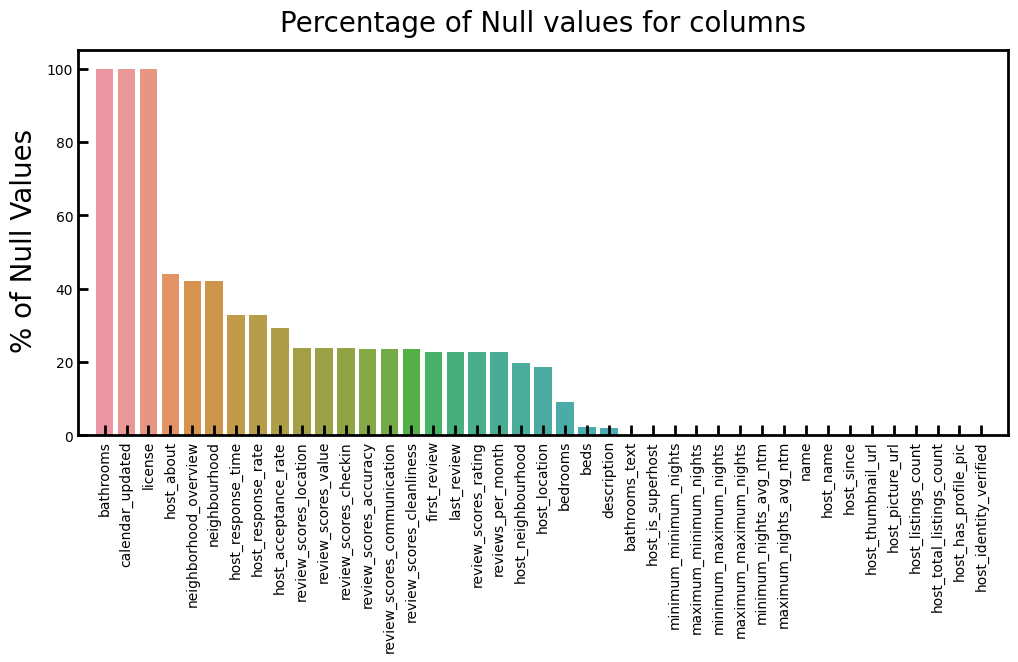

In [1173]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = keys, y = values, ax = ax)

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

plt.text(0.5, 1.05, 'Percentage of Null values for columns',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

plt.xticks(rotation = 90)
ax.margins(x=0.02)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

# fig.text(0.5, -0.35, 'Columns', ha='center', va='center', fontsize = 20)
fig.text(0.08, 0.5, '% of Null Values', ha='center', va='center', rotation='vertical', fontsize = 20)

plt.savefig('percentage_of_null_values.jpg',  bbox_inches='tight', dpi = 500)

It looks like we have two choices for columns with more than 30 % null values. 
    
    1. Either drop them, or
    2. Figure out a way to properly fill those null values

In [1174]:
available_columns = df.columns;available_columns

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'source',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'minimum_nights',
 'maximum_nights',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm',
 'calendar_updated',
 'has_availability',
 'availability_30

In [1175]:
columns_that_are_dropped = []

In [1176]:
data_dictionary = { 
    'id': 'The unique identifier of the Airbnb listing.',
    'listing_url': 'The URL of the Airbnb listing page.',
    'scrape_id': 'The unique identifier of the data scrape used to generate the Airbnb listing data.',
    'last_scraped': 'The date on which the Airbnb listing data was last scraped.', 
    'name': 'The name or title of the Airbnb listing.',
    'summary': 'A short summary of the Airbnb listing.',
    'space': 'A description of the space available in the Airbnb listing.',
    'description': 'A detailed description of the Airbnb listing.', 
    'experiences_offered' : 'A list of experiences offered by the Airbnb host.',
    'neighborhood_overview': 'An overview of the neighbourhood where the Airbnb listing is located.',
    'notes': 'Additional notes or information about the Airbnb listing.',
    'transit': 'Information about nearby public transportation options.',
    'access': 'Information about what areas of the Airbnb listing are accessible to guests.',
    'interaction': 'Information about how the Airbnb host will interact with guests.',
    'house_rules': 'Rules and policies set by the Airbnb host for guests.',
    'thumbnail_url': 'The URL of the Airbnb listing thumbnail image.',
    'medium_url': 'The URL of a medium-sized image of the Airbnb listing.',
    'picture_url': 'The URL of the main image of the Airbnb listing.',
    'xl_picture_url': 'The URL of an extra-large image of the Airbnb listing.',
    'host_id': 'The unique identifier of the Airbnb host who owns the listing.',
    'host_url': 'The URL of the Airbnb host page.',
    'host_name': 'The name of the Airbnb host who owns the listing.',
    'host_since': 'The date on which the Airbnb host joined the platform.',
    'host_location': 'The location of the Airbnb host.',
    'host_about': 'Information about the Airbnb host.',
    'host_response_time': 'The typical amount of time it takes for the Airbnb host to respond to messages.',
    'host_response_rate': 'The percentage of messages that the Airbnb host responds to.',
    'host_acceptance_rate': 'The percentage of booking requests that the Airbnb host accepts.',
    'host_is_superhost': 'A binary value indicating whether or not the Airbnb host is a Superhost.',
    'host_thumbnail_url': 'The URL of the Airbnb host\'s thumbnail image.', 
    'host_picture_url': 'The URL of the Airbnb host\'s main image.',
    'host_neighbourhood': 'The neighbourhood where the Airbnb host lives.',
    'host_listings_count': 'The number of listings that the Airbnb host has on the platform.',
    'host_total_listings_count': 'The total number of listings that the Airbnb host has on all platforms.',
    'host_verifications': 'A list of verification methods used by the Airbnb host.',
    'host_has_profile_pic': 'A binary value indicating whether or not the Airbnb host has a profile picture.',
    'host_identity_verified': 'A binary value indicating whether or not the Airbnb host\'s identity has been verified.',
    'neighbourhood': 'The neighbourhood where the Airbnb listing is located.',
    'neighbourhood_cleansed': 'The cleaned-up version of the neighbourhood name.',
    'neighbourhood_group_cleansed': 'The cleaned-up version of the neighbourhood group name.',
    'latitude': 'The latitude coordinate of the Airbnb listing.',
    'longitude': 'The longitude coordinate of the Airbnb listing.',
    'property_type': 'The type of property being listed on Airbnb (e.g. Apartment, House, etc.).',
    'room_type': 'The type of room being listed on Airbnb (e.g. Private room, Entire home/apt, etc.).',
    'accommodates': 'The maximum number of guests the Airbnb listing can accommodate.',
    'bathrooms': 'The number of bathrooms available in the Airbnb listing.',
    'bedrooms': 'The number of bedrooms available in the Airbnb listing.',
    'beds': 'The number of beds available in the Airbnb listing.',
    'bed_type': 'The type of bed available in the Airbnb listing (e.g. Real Bed, Futon, etc.).',
    'amenities': 'A list of amenities available in the Airbnb listing (e.g. Wifi, TV, etc.).',
    'square_feet': 'The size of the Airbnb listing in square feet.',
    'price': 'The nightly price of the Airbnb listing.',
    'weekly_price': 'The weekly price of the Airbnb listing.',
    'monthly_price': 'The monthly price of the Airbnb listing.',
    'security_deposit': 'The amount of security deposit required for the Airbnb listing.',
    'cleaning_fee': 'The cleaning fee charged for the Airbnb listing.',
    'guests_included': 'The number of guests included in the nightly price of the Airbnb listing.',
    'extra_people': 'The additional cost per guest after the number of guests included in the nightly price.',
    'minimum_nights': 'The minimum number of nights required to book the Airbnb listing.',
    'maximum_nights': 'The maximum number of nights allowed for a booking of the Airbnb listing.',
    'calendar_updated': 'The last time the Airbnb listing calendar was updated.',
    'has_availability': 'A binary value indicating whether or not the Airbnb listing is currently available.',
    'availability_30': 'The number of available nights in the next 30 days.',
    'availability_60': 'The number of available nights in the next 60 days.',
    'availability_90': 'The number of available nights in the next 90 days.',
    'availability_365': 'The number of available nights in the next 365 days.',
    'calendar_last_scraped': 'The date on which the Airbnb listing calendar was last scraped.',
    'number_of_reviews': 'The total number of reviews for the Airbnb listing.',
    'number_of_reviews_ltm': 'The total number of reviews for the Airbnb listing in the last 12 months.',
    'first_review': 'The date of the first review for the Airbnb listing.',
    'last_review': 'The date of the most recent review for the Airbnb listing.',
    'review_scores_rating': 'The average rating score for the Airbnb listing.',
    'review_scores_accuracy': 'The average accuracy score for the Airbnb listing.',
    'review_scores_cleanliness': 'The average cleanliness score for the Airbnb listing.',
    'review_scores_communication': 'The average communication score for the Airbnb listing.',
}

In [1177]:
# pd.DataFrame(data_dictionary.values(), 
# columns = data_dictionary.keys())

# Data Cleaning

In [1178]:
def check_column_presence(column):
    try:
        if df[column].shape[0] > 0:
            return 'Column |{}| is Present'.format(column)
        else:
            return None
    except:
        return "Column |{}| has been removed !! ".format(column)

In [1179]:
# testing the function
check_column_presence('availability_365')

'Column |availability_365| has been removed !! '

In [1180]:
df.select('amenities').show()

+--------------------+
|           amenities|
+--------------------+
|["Carbon monoxide...|
|["Hair dryer", "S...|
|["HDTV with Disne...|
|["Heating", "Wifi...|
|["Carbon monoxide...|
|["Shampoo", "Cond...|
|["Smoke alarm", "...|
|["Smoke alarm", "...|
|["Carbon monoxide...|
|["Smoke alarm", "...|
|["Board games", "...|
|["Washer", "Heati...|
|["Smoke alarm", "...|
|["Carbon monoxide...|
|["Carbon monoxide...|
|["Carbon monoxide...|
|["Carbon monoxide...|
|["Washer", "Heati...|
|["Carbon monoxide...|
|["Carbon monoxide...|
+--------------------+
only showing top 20 rows



## Dropping useless individual columns

### 1. `_id` column

<b> The code below for this section is the previous pandas code. This section is left as it is because we are now processing the data using PySpark from HDFS and not mongodb.

In [1181]:
# df['_id'].unique().shape

This column is simply generated by Mongodb by assignng a unique value to each document/rows while uploading the file.
We don't need this column, which is why we will proceed to drop this column.

In [1182]:
# df.drop('_id', axis = 1, inplace = True)

In [1183]:
check_column_presence('_id')

'Column |_id| has been removed !! '

In [1184]:
columns_that_are_dropped.append('_id')

### 2. `id` column

In [1185]:
from pyspark.sql.functions import countDistinct

In [1186]:

unique_count = df.select(countDistinct("id")).collect()[0][0]

In [1187]:
unique_count

40847

Each rental is assigned a unique ID. So, this column is also not necessary.

In [1188]:
df = df.drop('id')

In [1189]:
check_column_presence('id')

'Column |id| has been removed !! '

In [1190]:
columns_that_are_dropped.append('id')

### 3. `listing_url` column

In [1191]:
df.select(countDistinct("listing_url")).collect()[0][0]

41533

Likewise, this column contains the listing URL for the corresponding rentals. We can remove this column as it does not contain any useful information.

In [1192]:
df = df.drop('listing_url')

In [1193]:
check_column_presence('listing_url')

'Column |listing_url| has been removed !! '

In [1194]:
columns_that_are_dropped.append('listing_url')

### 4. `scrape_id` column

In [1195]:
df.select(countDistinct("scrape_id")).collect()[0][0]

1

In [1196]:
df.select('scrape_id').dropDuplicates().show()

+----------+
| scrape_id|
+----------+
|2.02212E13|
+----------+



This column has only one unique value which is why we will proceed to remove this column as well. 

In [1197]:
df = df.drop('scrape_id')

In [1198]:
check_column_presence('scrape_id')

'Column |scrape_id| has been removed !! '

In [1199]:
columns_that_are_dropped.append('scrape_id')

### 5. `last_scraped` column

In [1200]:
df.select('last_scraped').dropDuplicates().show()

+------------+
|last_scraped|
+------------+
|   12/4/2022|
|   12/5/2022|
+------------+



It looks like Airbnb scraped all of their data from database at the end of 2022, which is why two date values belonging to december are only present in this column. So, we can safely drop this column as well.

In [1201]:
df = df.drop('last_scraped')

In [1202]:
check_column_presence('last_scraped')

'Column |last_scraped| has been removed !! '

In [1203]:
columns_that_are_dropped.append('last_scraped')

### 6. `source` column

In [1204]:
available_columns[5]

'name'

In [1205]:
df.select('source').dropDuplicates().show()

+---------------+
|         source|
+---------------+
|    city scrape|
|previous scrape|
+---------------+



This column contains the source from where Airbnb retrieved their data. So, we can remove this column. 

In [1206]:
df = df.drop('source')
check_column_presence('source')

'Column |source| has been removed !! '

In [1207]:
columns_that_are_dropped.append('source')

### 7. `name` column

In [1208]:
available_columns[5]

'name'

In [1209]:
df.select('name').show()

+--------------------+
|                name|
+--------------------+
|Skylit Midtown Ca...|
|Cozy Clean Guest ...|
|Spacious Brooklyn...|
|     BlissArtsSpace!|
|Only 2 stops to M...|
|Large Furnished R...|
|UES Beautiful Blu...|
|Uptown Sanctuary ...|
|Perfect for Your ...|
|Amazing location!...|
|Maison des Sirene...|
|Sweet and Spaciou...|
|Midtown Pied-a-terre|
|Lovely Room 1 in ...|
|Lovely Room 2 in ...|
|Spacious 1 bedroo...|
| ENJOY Downtown NYC!|
|Country space in ...|
|Charming Brownsto...|
|1 Stop fr. Manhat...|
+--------------------+
only showing top 20 rows



This column contains names of each Airbnb rentals

In [1210]:
df.select('name').show(10)

+--------------------+
|                name|
+--------------------+
|Skylit Midtown Ca...|
|Cozy Clean Guest ...|
|Spacious Brooklyn...|
|     BlissArtsSpace!|
|Only 2 stops to M...|
|Large Furnished R...|
|UES Beautiful Blu...|
|Uptown Sanctuary ...|
|Perfect for Your ...|
|Amazing location!...|
+--------------------+
only showing top 10 rows



some of the names of the Airbnb rentals contain the location of the rentals. Since we have other columns precisely providing the location of the rentals, we can proceed to safely remove this column.

In [1211]:
df = df.drop('name')
check_column_presence('name')

'Column |name| has been removed !! '

In [1212]:
columns_that_are_dropped.append('name')

### 8. `description` column

In [1213]:
df.select('description').show()

+--------------------+
|         description|
+--------------------+
|Beautiful, spacio...|
|Our best guests a...|
|We welcome you to...|
|One room availabl...|
|Comfortable studi...|
|Please don’t expe...|
|Beautiful peacefu...|
|A charming month-...|
|Parents/grandpare...|
|Large, private lo...|
|<b>The space</b><...|
|A true open-plan ...|
|HELLO.  PLEASE DO...|
|Beautiful house, ...|
|Lovely room,  gor...|
|The room is spaci...|
|Please be vaccina...|
|<b>The space</b><...|
|Super cute 1 bedr...|
|Private room, ded...|
+--------------------+
only showing top 20 rows



This column is also useless for analysis as it contains description of each Airbnb rentals.

In [1214]:
df = df.drop('description')
check_column_presence('description')

'Column |description| has been removed !! '

In [1215]:
columns_that_are_dropped.append('description')

### 9. `neighborhood_overview` column

In [1216]:
df.select(sum(col("neighborhood_overview").isNull().cast("int"))).show()

+-------------------------------------------------+
|sum(CAST((neighborhood_overview IS NULL) AS INT))|
+-------------------------------------------------+
|                                            17444|
+-------------------------------------------------+



In [1217]:
df.select('neighborhood_overview').na.drop().show(truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

We won't need this column as well as we already have columns containing neighbourhood information. 

In [1218]:
df = df.drop('neighborhood_overview')
check_column_presence('neighborhood_overview')

'Column |neighborhood_overview| has been removed !! '

In [1219]:
columns_that_are_dropped.append('neighborhood_overview')

### 10. `host_id` column

In [1220]:
df.select('host_id').show()

+-------+
|host_id|
+-------+
|   2845|
|   7490|
|   7378|
|   7356|
|  15991|
|   8967|
|  16800|
|  16104|
|  17571|
|  17297|
|  25183|
|  21207|
|  30193|
|   9744|
|   9744|
|  32045|
|  46978|
|  45445|
|  50148|
|  50124|
+-------+
only showing top 20 rows



Each Airbnb rental's host will have unique host id. So, we can proceed to drop this column as well.

In [1221]:
df = df.drop('host_id')
check_column_presence('host_id')
columns_that_are_dropped.append('host_id')

### 11. `host_url` column

In [1222]:
df.select('host_url').show(truncate = False)

+---------------------------------------+
|host_url                               |
+---------------------------------------+
|https://www.airbnb.com/users/show/2845 |
|https://www.airbnb.com/users/show/7490 |
|https://www.airbnb.com/users/show/7378 |
|https://www.airbnb.com/users/show/7356 |
|https://www.airbnb.com/users/show/15991|
|https://www.airbnb.com/users/show/8967 |
|https://www.airbnb.com/users/show/16800|
|https://www.airbnb.com/users/show/16104|
|https://www.airbnb.com/users/show/17571|
|https://www.airbnb.com/users/show/17297|
|https://www.airbnb.com/users/show/25183|
|https://www.airbnb.com/users/show/21207|
|https://www.airbnb.com/users/show/30193|
|https://www.airbnb.com/users/show/9744 |
|https://www.airbnb.com/users/show/9744 |
|https://www.airbnb.com/users/show/32045|
|https://www.airbnb.com/users/show/46978|
|https://www.airbnb.com/users/show/45445|
|https://www.airbnb.com/users/show/50148|
|https://www.airbnb.com/users/show/50124|
+---------------------------------

This column contains the URL of each Airbnb's hosts' profiles. So, we can safely drop this column as it will be of no further use to us.

In [1223]:
df = df.drop('host_url')
check_column_presence('host_url')
columns_that_are_dropped.append('host_url')

### 12. `host_name` column

In [1224]:
df.select('host_name').show(truncate = False)

+-------------+
|host_name    |
+-------------+
|Jennifer     |
|MaryEllen    |
|Rebecca      |
|Garon        |
|Allen & Irina|
|Shunichi     |
|Cyn          |
|Kae          |
|Jane         |
|Joelle       |
|Nathalie     |
|Chaya        |
|Tommi        |
|Laurie       |
|Laurie       |
|Teri         |
|Edward       |
|Harriet      |
|Adreinne     |
|Orestes      |
+-------------+
only showing top 20 rows



In [1225]:
df.select('host_name').dropDuplicates().count()

9629

Each Airbnb rental's host will have a name. Therefore, this column will not be of much use to us.

In [1226]:
df = df.drop('host_name')
check_column_presence('host_name')
columns_that_are_dropped.append('host_name')

### 13. `host_since` column

In [1227]:
df.select('host_since').show()

+----------+
|host_since|
+----------+
|  9/9/2008|
|  2/5/2009|
|  2/3/2009|
|  2/3/2009|
|  5/6/2009|
|  3/3/2009|
| 5/12/2009|
|  5/7/2009|
| 5/17/2009|
| 5/15/2009|
| 7/10/2009|
| 6/12/2009|
|  8/6/2009|
| 3/10/2009|
| 3/10/2009|
| 8/16/2009|
|10/19/2009|
|10/12/2009|
|10/31/2009|
|10/31/2009|
+----------+
only showing top 20 rows



This column contains information about the date since when the Airbnb rental has been opened up for hosting services.

<b> Since we will be predicting the rental's price, we would be focusing more on the properties of individual rental. So, date from which a rental has been open should not matter much in predicting price. 

In [1228]:
from pyspark.sql.functions import col, sum

null_count = df.select(sum(col('host_since').isNull().cast('integer'))).collect()[0][0]
print(null_count)

5


In [1229]:
# df.select(sum(col('host_since').isNull().cast('integer'))).collect()[0][0]

In [1230]:
df = df.drop('host_since')
check_column_presence('host_since')
columns_that_are_dropped.append('host_since')

### 14. `host_about` column

In [1231]:
df.select('host_about').show(truncate = False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [1232]:
null_count = df.select(sum(col('host_about').isNull().cast('integer'))).collect()[0][0]
print(null_count)

18312


This column doesn't contain any useful information. So, we will proceed to drop this columns.

In [1233]:
df = df.drop('host_about')
check_column_presence('host_about')
columns_that_are_dropped.append('host_about')

In [1234]:
len(columns_that_are_dropped)

14

### 15. `host_location` column

In [1235]:
df.select('host_location').show(truncate = False)

+-------------+
|host_location|
+-------------+
|New York, NY |
|New York, NY |
|New York, NY |
|New York, NY |
|New York, NY |
|New York, NY |
|New York, NY |
|New York, NY |
|New York, NY |
|New York, NY |
|New York, NY |
|New York, NY |
|New York, NY |
|New York, NY |
|New York, NY |
|null         |
|New York, NY |
|New York, NY |
|Berkeley, CA |
|New York, NY |
+-------------+
only showing top 20 rows



In [1236]:
null_count = df.select(sum(col('host_location').isNull().cast('integer'))).collect()[0][0]
print(null_count)

7745


It looks like this column contains information about the location of the Airbnb's rental's hosts' locations. Furthermore, a foreigner can also host a rental through Airbnb. But, the price of a Airbnb rental should not matter at all as we are predicting price of a rental in NYC and not in other countries.

In [1237]:
df = df.drop('host_location')
check_column_presence('host_location')
columns_that_are_dropped.append('host_location')

In [1238]:
# available_host_countries = df['host_location'].apply(lambda x : x.split(',')[-1])

### 16. `host_response_time` column

In [1239]:
df.select('host_response_time').show()

+------------------+
|host_response_time|
+------------------+
|      within a day|
|              null|
|              null|
|      within a day|
|    within an hour|
|within a few hours|
|    within an hour|
|      within a day|
|    within an hour|
|      within a day|
|    within an hour|
|    within an hour|
|              null|
|within a few hours|
|within a few hours|
|a few days or more|
|      within a day|
|              null|
|within a few hours|
|      within a day|
+------------------+
only showing top 20 rows



In [1240]:
df.select(sum(col('host_response_time').isNull().cast('integer'))).collect()[0][0]

13645

Since there are 13645 null values, we could assign them a new category.

In [1241]:
# df.groupBy(col).count().show()
df.groupBy('host_response_time').count().show()

+------------------+-----+
|host_response_time|count|
+------------------+-----+
|a few days or more|  627|
|              null|13645|
|      within a day| 3201|
|within a few hours| 5997|
|    within an hour|18063|
+------------------+-----+



Majority of Airbnb hosts seem to respond within an hour. This column will be useful. Additionally, I will change the N/A values to unknown. I will also fill null values as unknown respectively.

In [1242]:
df = df.withColumn('host_response_time', when(df['host_response_time'].isNull(), 'Unknown').otherwise(df['host_response_time']))

In [1243]:
df = df.withColumn('host_response_time', when(col('host_response_time').isNull(), 'Unknown').otherwise(col('host_response_time')))

In [1244]:
from pyspark.sql.functions import count, desc, col

In [1245]:
df.groupBy("host_response_time").agg(count("*").alias("count")) \
  .orderBy(col("count").desc()).show()

+------------------+-----+
|host_response_time|count|
+------------------+-----+
|    within an hour|18063|
|           Unknown|13645|
|within a few hours| 5997|
|      within a day| 3201|
|a few days or more|  627|
+------------------+-----+



In [1246]:
df.filter(col('host_response_time').isNull())\
  .count()

0

In [1247]:
dictionary = dict(df.groupBy('host_response_time').agg(count('*').alias('count'))
                        .fillna({'host_response_time': 'Unknown'})
                        .collect())

dictionary = dict(sorted(dictionary.items(), key=lambda x: x[1], reverse=True))

In [1248]:
dictionary

{'within an hour': 18063,
 'Unknown': 13645,
 'within a few hours': 5997,
 'within a day': 3201,
 'a few days or more': 627}

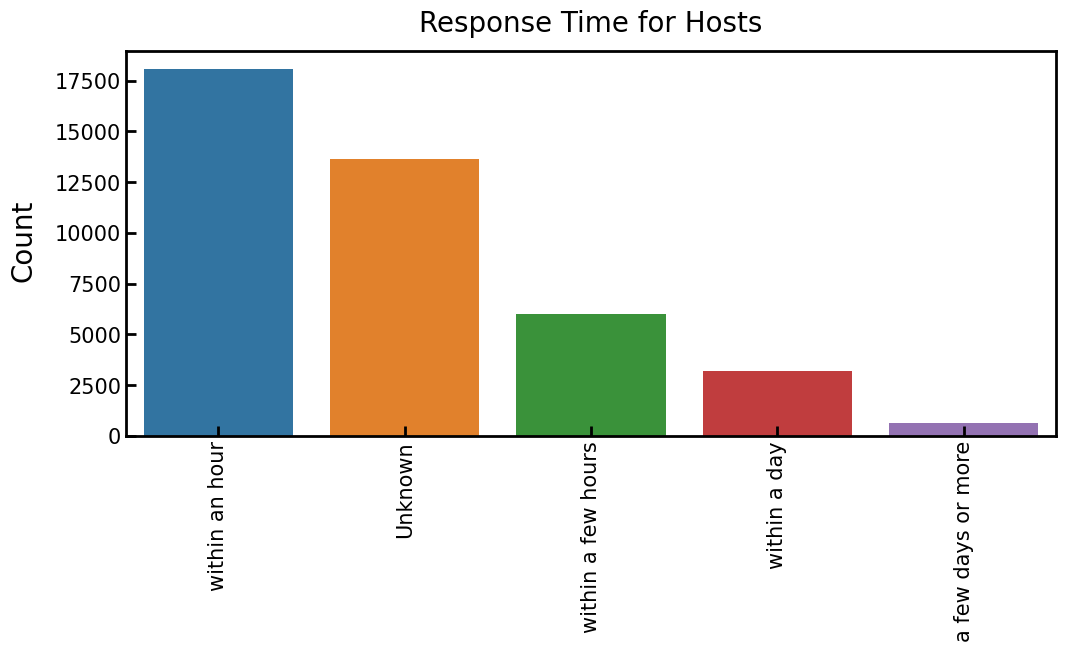

In [1249]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = list(dictionary.keys()), y = list(dictionary.values()), ax = ax)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Response Time for Hosts',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

plt.xticks(rotation = 90)
ax.margins(x=0.02)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

# fig.text(0.5, -0.35, 'Time', ha='center', va='center', fontsize = 20)
fig.text(0.04, 0.5, 'Count', ha='center', va='center', rotation='vertical', fontsize = 20)

plt.savefig('response_time_For_hosts.jpg',  bbox_inches='tight', dpi = 500)


It is clear that majority of hosts respond within an hour. Similarly, there is a huge section of hosts whose responses were either not recorded properly or did not respond at all. The price of a rental might depend upon this column due to the fact that quickly responding to potential customers about rental information could be an important factors for guest to decide to book a particular rental. For now, we will keep this column and later do additional analysis to check if we will really need this column for modelling purposes.

In [1250]:
# df.drop('host_name', axis = 1, inplace = True)
# check_column_presence('host_name')
# columns_that_are_dropped.append('host_about')

### 17. `host_response_rate` column

In [1251]:
df.select('host_response_rate').show(truncate = False)

+------------------+
|host_response_rate|
+------------------+
|72%               |
|null              |
|null              |
|90%               |
|100%              |
|94%               |
|100%              |
|100%              |
|100%              |
|100%              |
|100%              |
|100%              |
|null              |
|100%              |
|100%              |
|33%               |
|100%              |
|null              |
|100%              |
|80%               |
+------------------+
only showing top 20 rows



In [1252]:
df.select(col('host_response_rate')).distinct().collect()
distinct_values = [row[0] for row in df.select(col('host_response_rate')).distinct().collect()]
np.array(distinct_values)

array(['88%', '31%', '81%', '33%', '82%', '83%', '98%', '0%', '89%',
       '54%', None, '70%', '90%', '85%', '38%', '65%', '57%', '78%',
       '99%', '71%', '69%', '91%', '62%', '100%', '20%', '79%', '17%',
       '77%', '80%', '58%', '44%', '55%', '60%', '92%', '41%', '13%',
       '22%', '56%', '87%', '51%', '67%', '53%', '97%', '10%', '61%',
       '25%', '86%', '68%', '75%', '64%', '50%', '72%', '73%', '96%',
       '95%', '84%', '14%', '46%', '29%', '63%', '94%', '30%', '74%',
       '40%', '26%', '93%', '76%', '43%'], dtype=object)

In [1253]:
df.select(sum(col('host_response_rate').isNull().cast('integer'))).collect()[0][0]

13645

### 18. `host_acceptance_rate` column

In [1254]:
df.select('host_acceptance_rate').show()

+--------------------+
|host_acceptance_rate|
+--------------------+
|                 22%|
|                null|
|                 50%|
|                 82%|
|                100%|
|                100%|
|                100%|
|                 13%|
|                100%|
|                 54%|
|                 98%|
|                 96%|
|                null|
|                 97%|
|                 97%|
|                  0%|
|                 82%|
|                null|
|                 83%|
|                 95%|
+--------------------+
only showing top 20 rows



In [1255]:
df.select(sum(col('host_acceptance_rate').isNull().cast('integer'))).collect()[0][0]

12211

In [1256]:
np.array([row[0] for row in df.select(col('host_response_rate')).distinct().collect()])

array(['88%', '31%', '81%', '33%', '82%', '83%', '98%', '0%', '89%',
       '54%', None, '70%', '90%', '85%', '38%', '65%', '57%', '78%',
       '99%', '71%', '69%', '91%', '62%', '100%', '20%', '79%', '17%',
       '77%', '80%', '58%', '44%', '55%', '60%', '92%', '41%', '13%',
       '22%', '56%', '87%', '51%', '67%', '53%', '97%', '10%', '61%',
       '25%', '86%', '68%', '75%', '64%', '50%', '72%', '73%', '96%',
       '95%', '84%', '14%', '46%', '29%', '63%', '94%', '30%', '74%',
       '40%', '26%', '93%', '76%', '43%'], dtype=object)

This column could play an important role in determining the price of a rental. If a host is very much likely to accept user inquiries and bookings, more people might prefer to choose the corresponding rental ultimately driving up its price.
Similarly, if a host has vey low acceptance rate, customers might imply that the host has too many restrictions on his rental which is why he/she doesnot generally accept bookings. We will keep this column for now to do additional analysis.

### 19. `host_is_superhost` column

In [1257]:
data_dictionary['host_is_superhost']

'A binary value indicating whether or not the Airbnb host is a Superhost.'

In [1258]:
df.select(sum(col('host_is_superhost').isNull().cast('integer'))).collect()[0][0]

29

29 null values should not be much of a problem for us as we have enough data to fill the null values.

In [1259]:
df.groupBy("host_is_superhost").agg(count("*").alias("count")) \
  .orderBy(col("count").desc()).show()

+-----------------+-----+
|host_is_superhost|count|
+-----------------+-----+
|                f|32635|
|                t| 8869|
|             null|   29|
+-----------------+-----+



It looks like the majority of hosts are not superhosts. This column could play an important role in determining the price of a rental. If a host is a `Superhost`, he/she is considered an experienced host and is very likely to consistently receive very high ratings from the customers who stayed in that rental. Additionally, being a superhost also provides customers with the assurance that the host is reliable, trustworthy and offers high quality of hospitality.

Therefore, we will keep this column for further analysis for now.

### 20. `host_thumbnail_url` column

In [1260]:
col = 'host_thumbnail_url'
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  host_thumbnail_url
DATA DICT:  The URL of the Airbnb host's thumbnail image.


In [1261]:
df.select(col).show(truncate = False)

+----------------------------------------------------------------------------------------------------------+
|host_thumbnail_url                                                                                        |
+----------------------------------------------------------------------------------------------------------+
|https://a0.muscache.com/im/pictures/user/50fc57af-a6a3-4e88-8f16-efd6cac7c9bc.jpg?aki_policy=profile_small|
|https://a0.muscache.com/im/users/7490/profile_pic/1409068414/original.jpg?aki_policy=profile_small        |
|https://a0.muscache.com/im/users/7378/profile_pic/1259098621/original.jpg?aki_policy=profile_small        |
|https://a0.muscache.com/im/pictures/user/72a61bea-cfb1-45b6-abbb-85bdbd790b32.jpg?aki_policy=profile_small|
|https://a0.muscache.com/im/users/15991/profile_pic/1259104907/original.jpg?aki_policy=profile_small       |
|https://a0.muscache.com/im/users/8967/profile_pic/1265419894/original.jpg?aki_policy=profile_small        |
|https://a0.muscach

The thumbnail of a property should have absolutely no bearing in the price of a rental. Therefore, we will proceed to drop this column.

In [1262]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |host_thumbnail_url| has been removed !! 


### 21. `host_picture_url` column

In [1263]:
col = 'host_picture_url'
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  host_picture_url
DATA DICT:  The URL of the Airbnb host's main image.


In [1264]:
df.select(col).show()

+--------------------+
|    host_picture_url|
+--------------------+
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
+--------------------+
only showing top 20 rows



In [1265]:
df.select('host_picture_url').distinct().count()

26363

This column contains the url to the host's profile picture. This column should also have no bearing in the property's price. So, we will proceed to drop this column. 

In [1266]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |host_picture_url| has been removed !! 


### 22. `host_neighbourhood` column

In [1267]:
col = 'host_neighbourhood'

In [1268]:
print("DATA DICT: ", data_dictionary['host_neighbourhood'])

DATA DICT:  The neighbourhood where the Airbnb host lives.


In [1269]:
df.select('host_neighbourhood').show()

+------------------+
|host_neighbourhood|
+------------------+
|           Midtown|
|   Upper West Side|
| Greenwood Heights|
|Bedford-Stuyvesant|
|      Williamsburg|
|    Hell's Kitchen|
|       East Harlem|
|       East Harlem|
|       Fort Greene|
|      Williamsburg|
|Bedford-Stuyvesant|
|      Williamsburg|
|    Hell's Kitchen|
|        Park Slope|
|        Park Slope|
|            Harlem|
|     Alphabet City|
|          Flatbush|
|Bedford-Stuyvesant|
|  Long Island City|
+------------------+
only showing top 20 rows



In [1270]:
df.groupBy('host_neighbourhood').count().show()

+------------------+-----+
|host_neighbourhood|count|
+------------------+-----+
|         Homecrest|   13|
|   Lighthouse HIll|    1|
|            Corona|   75|
|      Prince's Bay|    7|
|   National Harbor|    2|
|        Canadensis|    1|
|         Castropol|    2|
|           Ipanema|    1|
|        Mill Basin|   12|
|       Westerleigh|    2|
|         East Rock|    1|
|      Civic Center|   10|
|           Harwood|    1|
| Greenwood Heights|   68|
|            Queens|    2|
|       Marble Hill|    6|
|          Westside|    1|
|         Koolauloa|    1|
|         Rego Park|   43|
|    Bristol/Warner|    1|
+------------------+-----+
only showing top 20 rows



This column is very much unlikely to be very useful for predicting price. It is so because this column provides information about the location of the neighbour where the actual host resides and not the neighbourhood of the rental itself. Since I could be staying in kathmandu and operate a rental in New york city, my rental's price in NYC should have absolutely no relationship whatsoever. So, we will proceed to drop this column.

In [1271]:
df = df.drop('host_neighbourhood')
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |host_neighbourhood| has been removed !! 


### 23. `host_listings_count` column

In [1272]:
col = 'host_listings_count'

In [1273]:
print("DATA DICT: ", data_dictionary['host_listings_count'])

DATA DICT:  The number of listings that the Airbnb host has on the platform.


In [1274]:
df.select('host_listings_count').show()

+-------------------+
|host_listings_count|
+-------------------+
|                6.0|
|                1.0|
|                1.0|
|                2.0|
|                1.0|
|                1.0|
|                1.0|
|                2.0|
|                2.0|
|                2.0|
|                2.0|
|                4.0|
|                1.0|
|                3.0|
|                3.0|
|                1.0|
|                2.0|
|                1.0|
|                7.0|
|                1.0|
+-------------------+
only showing top 20 rows



In [1275]:
from pyspark.sql.functions import desc

In [1276]:
df.groupBy('host_listings_count').count().orderBy(desc('count')).show()

+-------------------+-----+
|host_listings_count|count|
+-------------------+-----+
|                1.0|20037|
|                2.0| 5930|
|                3.0| 2883|
|                4.0| 1912|
|                5.0| 1155|
|                6.0|  890|
|                7.0|  638|
|                8.0|  529|
|             4559.0|  487|
|                9.0|  406|
|              347.0|  345|
|               10.0|  295|
|               12.0|  245|
|               13.0|  217|
|               14.0|  214|
|              276.0|  214|
|              200.0|  200|
|              257.0|  196|
|              232.0|  175|
|              314.0|  172|
+-------------------+-----+
only showing top 20 rows



A host with many listings available could potentially show that host is an experienced person. Similarly, someone with relatively low listings indicates that they are probably new to the platform and are inexperienced. A tourist might feel more comfortable staying at someone's property if they are experienced. So, this could could be important. We will keep it for further analysis. 

### 24. `host_total_listings_count` column

In [1277]:
col = 'host_total_listings_count'

In [1278]:
print("DATA DICT: ", data_dictionary['host_total_listings_count'])

DATA DICT:  The total number of listings that the Airbnb host has on all platforms.


In [1279]:
df.groupBy('host_total_listings_count').count().orderBy(desc('count')).show()

+-------------------------+-----+
|host_total_listings_count|count|
+-------------------------+-----+
|                      1.0|12527|
|                      2.0| 7422|
|                      3.0| 4547|
|                      4.0| 2870|
|                      5.0| 1900|
|                      6.0| 1254|
|                      7.0|  955|
|                      8.0|  755|
|                      9.0|  619|
|                   4960.0|  487|
|                     10.0|  447|
|                     12.0|  356|
|                    505.0|  345|
|                     13.0|  328|
|                     15.0|  314|
|                     11.0|  278|
|                   1512.0|  214|
|                    202.0|  200|
|                     14.0|  200|
|                    279.0|  196|
+-------------------------+-----+
only showing top 20 rows



This column is very similar to previous column `host_listings_count`. Both column indicate the number of listings a host has on platforms. Therefore, we will proceed to drop this column altogether.

In [1280]:
df = df.drop('host_total_listings_count')
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |host_total_listings_count| has been removed !! 


### 25. `host_verifications` column

In [1281]:
col = 'host_verifications'

In [1282]:
print("DATA DICT: ", data_dictionary['host_verifications'])

DATA DICT:  A list of verification methods used by the Airbnb host.


In [1283]:
df.groupBy('host_verifications').count().orderBy(desc('count')).show(truncate = False)

+--------------------------------+-----+
|host_verifications              |count|
+--------------------------------+-----+
|['email', 'phone']              |32167|
|['email', 'phone', 'work_email']|5313 |
|['phone']                       |3836 |
|['phone', 'work_email']         |119  |
|['email']                       |61   |
|[]                              |27   |
|None                            |5    |
|['email', 'work_email']         |5    |
+--------------------------------+-----+



This column contains the list of profile verification methods like email, phone and work_email. Out of available methods, a user could use any one to verify their accounts. Furthermore, their verification method will probably have no bearing in the price of their corresponding rental. So, we will drop this column.

In [1284]:
df = df.drop('host_verifications')
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |host_verifications| has been removed !! 


### 26. `host_has_profile_pic` column

In [1285]:
print("DATA DICT: ", data_dictionary['host_has_profile_pic'])

DATA DICT:  A binary value indicating whether or not the Airbnb host has a profile picture.


In [1286]:
df.groupBy('host_has_profile_pic').count().orderBy(desc('count')).show(truncate = False)

+--------------------+-----+
|host_has_profile_pic|count|
+--------------------+-----+
|t                   |40904|
|f                   |624  |
|null                |5    |
+--------------------+-----+



while the fact that a host has no profile picture might not be directly linked to the price of a rental, potential customers could feel more comfortable about contacting a host with profile picture and ask for inquiries. We will use this column for further analysis.

### 27. `host_identity_verified` column

In [1287]:
col = 'host_identity_verified'

In [1288]:
print("DATA DICT: ", data_dictionary['host_identity_verified'])

DATA DICT:  A binary value indicating whether or not the Airbnb host's identity has been verified.


In [1289]:
df.groupBy('host_identity_verified').count().show()

+----------------------+-----+
|host_identity_verified|count|
+----------------------+-----+
|                  null|    5|
|                     f| 6266|
|                     t|35262|
+----------------------+-----+



Similarly, customers might feel more confident in a rental whose owner's profile and identity has been verified. Therefore, we will proceed to keep this column for further analysis.

### 28. `neighbourhood` column

In [1290]:
col = 'neighbourhood'
print("DATA DICT: ", data_dictionary['neighbourhood'])

DATA DICT:  The neighbourhood where the Airbnb listing is located.


In [1291]:
df.groupBy('neighbourhood').count().show()

+-----------------------+-----+
|          neighbourhood|count|
+-----------------------+-----+
|   Woodside, New Yor...|   25|
|   new york, New Yor...|    2|
|   Brooklyn , New Yo...|  221|
|   Richmond Hill, Ja...|    1|
|   Saint Albans , Ne...|    4|
|   astoria, New York...|    2|
|   Springfield garde...|    1|
|   BROOKLYN , New Yo...|    2|
|   Laurelton, New Yo...|    2|
|   Flush, New York, ...|    1|
|   New York, New Yor...|    1|
|   Nueva York, New Y...|    3|
|   Flushing , New Yo...|   16|
|   Floral Park, New ...|    1|
|   NY, New York, Uni...|    4|
|   ASTORIA, New York...|    1|
|   Whitestone, New Y...|    1|
|   College Point, Ne...|    1|
|纽约市, New York, Un...|    3|
|   New York,Manhatta...|    1|
+-----------------------+-----+
only showing top 20 rows



The price of a rental is directly affected by the neighbourhood it is located on. For example, brooklyn neighbourhood of New york might be very expensive than other neighbourhoods in terms of living expenses which ultimately drives up the price of a rental.

But, there are two additional columns containing similar information about neighbourhood and this column contains too many unique values. So, we will drop this column and use another column that is equivalent to the information provided in this column.

In [1292]:
df = df.drop('neighbourhood')
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |neighbourhood| has been removed !! 


### 29. `neighbourhood_cleansed` column

In [1293]:
col = 'neighbourhood_cleansed'
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  neighbourhood_cleansed
DATA DICT:  The cleaned-up version of the neighbourhood name.


In [1294]:
df.groupBy(col).count().show()

+----------------------+-----+
|neighbourhood_cleansed|count|
+----------------------+-----+
|                Corona|   80|
|          Richmondtown|    3|
|          Prince's Bay|    7|
|            Mill Basin|   14|
|           Westerleigh|    1|
|          Civic Center|   31|
|            Douglaston|    6|
|            Mount Hope|   39|
|           Marble Hill|    9|
|             Rego Park|   97|
|         Dyker Heights|   20|
|     Kew Gardens Hills|   39|
|          Dongan Hills|    8|
|    Financial District|  570|
|           Bay Terrace|    5|
|               Midtown| 1918|
|               Bayside|   75|
|       Jackson Heights|  232|
|        Hell's Kitchen| 1533|
|            Highbridge|   27|
+----------------------+-----+
only showing top 20 rows



This column simply slices the strings available in previous column and take first element of the list. However, there are still too many unique column and there is an additional column that explains the neighbourhood location of a rental. 

But, we will use this column for spatial analysis by creating a heatmap. So, we will keep this column for now.

In [1295]:
# df.drop(col, axis = 1, inplace = True)
# print(check_column_presence(col))
# columns_that_are_dropped.append(col)

### 30. `neighbourhood_group_cleansed` column

In [1296]:
col = 'neighbourhood_group_cleansed'
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  neighbourhood_group_cleansed
DATA DICT:  The cleaned-up version of the neighbourhood group name.


In [1297]:
df.groupBy(col).count().show()

+----------------------------+-----+
|neighbourhood_group_cleansed|count|
+----------------------------+-----+
|                      Queens| 6519|
|                    Brooklyn|15688|
|               Staten Island|  405|
|                   Manhattan|17334|
|                       Bronx| 1587|
+----------------------------+-----+



This column explains the number of rentals present in each neighbourhood. Since Manhattan and Brooklyn are two most populus and tourist attraction regions of NYC, it is appropriate in business terms to establish a rental in this region, which can drive up the price as these areas are pretty expensive. We will keep this column as it could be very important for price modeling.

### 31. `latitude` column

In [1298]:
col = 'latitude'
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  latitude
DATA DICT:  The latitude coordinate of the Airbnb listing.


This column contains the latitude of the airbnb listing. It will be useful for performing geospatial analysis.

### 32. `longitude` column

In [1299]:
col = 'longitude'
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  longitude
DATA DICT:  The longitude coordinate of the Airbnb listing.


This column contains the longitude of the airbnb listing. It will be useful for performing geospatial analysis.

### 33. `property_type` column

In [1300]:
col = 'property_type'
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  property_type
DATA DICT:  The type of property being listed on Airbnb (e.g. Apartment, House, etc.).


In [1301]:
df.groupBy(col).count().show()

+--------------------+-----+
|       property_type|count|
+--------------------+-----+
|Private room in l...|    1|
|Private room in loft|  268|
|Private room in e...|    6|
|  Entire rental unit|17579|
|Private room in m...|    1|
|         Shared room|    3|
|Private room in c...|  610|
|Room in boutique ...|  438|
|Private room in r...|    1|
|Room in bed and b...|    4|
|Private room in c...|  100|
|   Entire guesthouse|   67|
|Private room in b...|    9|
|  Entire guest suite|  383|
|Private room in home| 2198|
|        Entire place|   75|
|               Floor|    8|
|Shared room in bu...|    1|
|           Camper/RV|   13|
|Private room in barn|    2|
+--------------------+-----+
only showing top 20 rows



The type of a rental could have direct impact on its price. For example, an entire rental unit or condo could be more expensive than a shared room. We will keep this column for further analysis.

### 34. `room_type` column

In [1302]:
col = 'room_type'
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  room_type
DATA DICT:  The type of room being listed on Airbnb (e.g. Private room, Entire home/apt, etc.).


In [1303]:
df.groupBy(col).count().show()

+---------------+-----+
|      room_type|count|
+---------------+-----+
|    Shared room|  532|
|     Hotel room|  188|
|Entire home/apt|23526|
|   Private room|17287|
+---------------+-----+



The "room_type" column indicates the type of room being rented (e.g. entire home/apt, private room, shared room, etc.). It could be important so we will keep this for additional analysis

### 35. `accommodates` column

In [1304]:
col = 'accommodates'
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  accommodates
DATA DICT:  The maximum number of guests the Airbnb listing can accommodate.


In [1305]:
df.groupBy(col).count().show()

+------------+-----+
|accommodates|count|
+------------+-----+
|           0|   16|
|           7|  446|
|           6| 2176|
|           9|  102|
|           5| 1705|
|           1| 6432|
|          10|  251|
|           3| 4006|
|          12|  164|
|           8|  738|
|          11|   32|
|           2|18556|
|           4| 6621|
|          13|   18|
|          14|   28|
|          15|   37|
|          16|  205|
+------------+-----+



This column indicates the number of accomodates to allow in the airbnb rental. The accommodates column can be a useful predictor of rental prices, as properties that can accommodate more guests may be more in demand and therefore have higher prices. So, we will keep this column for further analysis.

### 36. `bathrooms_text` column

In [1306]:
col = 'bathrooms_text'
print("COLUMN: ", col)
# print("DATA DICT: ", data_dictionary['bathrooms'])

COLUMN:  bathrooms_text


In [1307]:
df.groupBy(col).count().show()

+-----------------+-----+
|   bathrooms_text|count|
+-----------------+-----+
|   2 shared baths| 1109|
|          4 baths|  126|
|          0 baths|   57|
|        4.5 baths|   36|
|          3 baths|  303|
|        2.5 baths|  400|
| 1.5 shared baths|  722|
|Private half-bath|   12|
|    1 shared bath| 9589|
|   4 shared baths|   14|
|             null|   77|
|          2 baths| 2729|
|          7 baths|    1|
| 4.5 shared baths|    2|
|   1 private bath| 2893|
|   6 shared baths|    2|
|        Half-bath|   40|
|       15.5 baths|    1|
|          6 baths|    8|
|          8 baths|    1|
+-----------------+-----+
only showing top 20 rows



This column will be useful as various number of bathrooms could increase the demand of a rental and ultimately increasing the price. So, we will do further analysis in this column.

### 37. `beds` column

In [1308]:
col = 'beds'
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  beds
DATA DICT:  The number of beds available in the Airbnb listing.


In [1309]:
df.groupBy(col).count().show()

+----+-----+
|beds|count|
+----+-----+
| 8.0|   94|
| 7.0|  101|
|42.0|    1|
|null|  941|
|18.0|    1|
| 1.0|25557|
| 4.0| 1528|
|11.0|   11|
|21.0|    1|
|14.0|    3|
| 3.0| 3486|
| 2.0| 8894|
|17.0|    1|
|10.0|   20|
|13.0|    1|
| 6.0|  307|
| 5.0|  538|
| 9.0|   34|
|16.0|    2|
|12.0|   12|
+----+-----+



Higher the number of a bed could increase the price of a rental. So, we will use this column for further analysis.

### 38. `amenities` column

In [1310]:
col = 'amenities'
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  amenities
DATA DICT:  A list of amenities available in the Airbnb listing (e.g. Wifi, TV, etc.).


In [1311]:
df.groupBy(col).count().show(3, truncate = False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----+
|amenities                                                                                                                                                                                                                                                                                                                                                                                                                                                                |count|
+-------------------------------------------------------------------

If a rental unit has many ameneties, it would make the rental more attractive for potential customers. Therefore, this column will be very important. However, this column contains too many unique values. So, it will need good preprocessing. We will keep this column for further analysis.

### 39. `price` column

In [1312]:
col = 'price'
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  price
DATA DICT:  The nightly price of the Airbnb listing.


In [1313]:
df.select(col).show()

+--------+
|   price|
+--------+
|$175.00 |
| $75.00 |
|$275.00 |
| $60.00 |
| $68.00 |
| $68.00 |
| $62.00 |
| $65.00 |
|$220.00 |
| $95.00 |
|$150.00 |
|$395.00 |
|$175.00 |
|$124.00 |
|$124.00 |
| $55.00 |
| $80.00 |
|$150.00 |
|$119.00 |
|$146.00 |
+--------+
only showing top 20 rows



<b> This is the column which will be used for making predictions. This column is very messy and will need preprocessing. Additionally, we will be predicting price range for a rental with specific properties. So, this continuous column will be converted to a categorical form.

### 40. `minimum_nights` column

In [1314]:
col = 'minimum_nights'
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  minimum_nights
DATA DICT:  The minimum number of nights required to book the Airbnb listing.


In [1315]:
df.groupBy(col).count().show()

+--------------+-----+
|minimum_nights|count|
+--------------+-----+
|            29|   75|
|            26|    7|
|            65|    2|
|           270|    3|
|           222|    1|
|            19|    1|
|           299|    1|
|           330|    1|
|           198|    1|
|            22|    2|
|           130|    1|
|             7|  962|
|           184|    1|
|            50|   17|
|            94|    1|
|           110|    2|
|            32|   10|
|            43|    1|
|            84|    1|
|            31|  740|
+--------------+-----+
only showing top 20 rows



Like previous column, a rental's requirement that a customer has to stay up to a minimum period of time at most will play an important role in its price. So, we will use this column for additional analysis. 

### 41. `maximum_nights` column

In [1316]:
col = 'maximum_nights'
print("COLUMN: ", col)
print("DATA DICT: ", data_dictionary[col])

COLUMN:  maximum_nights
DATA DICT:  The maximum number of nights allowed for a booking of the Airbnb listing.


In [1317]:
df.select(col).show()

+--------------+
|maximum_nights|
+--------------+
|          1125|
|            14|
|          1125|
|           730|
|           730|
|            14|
|           700|
|           180|
|          1125|
|            45|
|          1125|
|            90|
|          1125|
|            21|
|            21|
|           730|
|          1125|
|           730|
|           365|
|            30|
+--------------+
only showing top 20 rows



Like previous column, a rental's requirement that a customer can only stay up to a given period of time at most will play an important role in its price. So, we will use this column for additional analysis. 

### 42. `minimum_minimum_nights` column

In [1318]:
col = 'minimum_minimum_nights'
print("COLUMN: ", col)
# print("DATA DICT: ", data_dictionary[col])

COLUMN:  minimum_minimum_nights


The information provided by this column is already given by previous column. So, I will drop this column.

In [1319]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |minimum_minimum_nights| has been removed !! 


### 43. `maximum_minimum_nights` column

In [1320]:
col = 'maximum_minimum_nights'
print("COLUMN: ", col)
# print("DATA DICT: ", data_dictionary[col])

COLUMN:  maximum_minimum_nights


The information provided by this column is already given by previous column. So, I will drop this column.

In [1321]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |maximum_minimum_nights| has been removed !! 


### 44. `maximum_minimum_nights` column

In [1322]:
col = 'minimum_maximum_nights'
print("COLUMN: ", col)

COLUMN:  minimum_maximum_nights


The information provided by this column is already given by previous column. So, I will drop this column.

In [1323]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |minimum_maximum_nights| has been removed !! 


### 45. `maximum_maximum_nights` column

In [1324]:
col = 'maximum_maximum_nights'
print("COLUMN: ", col)

COLUMN:  maximum_maximum_nights


The information provided by this column is already given by previous column. So, I will drop this column.

In [1325]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |maximum_maximum_nights| has been removed !! 


### 46. `minimum_nights_avg_ntm` column

In [1326]:
col = 'minimum_nights_avg_ntm'
print("COLUMN: ", col)

COLUMN:  minimum_nights_avg_ntm


The information provided by this column is already given by previous column. So, I will drop this column.

In [1327]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |minimum_nights_avg_ntm| has been removed !! 


### 47. `maximum_nights_avg_ntm` column

In [1328]:
col = 'maximum_nights_avg_ntm'
print("COLUMN: ", col)

COLUMN:  maximum_nights_avg_ntm


The information provided by this column is already given by previous column. So, I will drop this column.

In [1329]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |maximum_nights_avg_ntm| has been removed !! 


### 48. `has_availability` column

In [1330]:
col = 'has_availability'
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  has_availability


'A binary value indicating whether or not the Airbnb listing is currently available.'

In [1331]:
df.groupBy(col).count().show()

+----------------+-----+
|has_availability|count|
+----------------+-----+
|               f| 6252|
|               t|35281|
+----------------+-----+



This column might not be useful for predicting price because the values in this column are not real-time. It contains information about whether a rental is currently available or not. Since we will pre predicting the price of a rental, this column might not be very useful as a tourist will be looking for an available rental to book.

In [1332]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |has_availability| has been removed !! 


### 49. `availability_30` column

In [1333]:
col = 'availability_30'
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  availability_30


'The number of available nights in the next 30 days.'

In [1334]:
df.select(col).show()

+---------------+
|availability_30|
+---------------+
|             30|
|              0|
|              0|
|             11|
|             23|
|              0|
|              3|
|              0|
|             15|
|              0|
|              4|
|              0|
|              0|
|             18|
|             14|
|              0|
|              4|
|              0|
|              0|
|              3|
+---------------+
only showing top 20 rows



The availability_30 column in the Airbnb NYC dataset represents the number of days the rental property is available for booking in the next 30 days. However, this column may not be directly related to the rental price of the property. For example, a property that is highly in demand may have a higher rental price, but the relationship between availability and rental price may not be straightforward.


But, the data here is not in real time. So, we will drop this column.

In [1335]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |availability_30| has been removed !! 


### 50. `availability_60` column

In [1336]:
col = 'availability_60'
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  availability_60


'The number of available nights in the next 60 days.'

This column explains the number of days the rental propertey is available for booking in the next 60 days. We will drop this column as if there is a relationship between availability and price, then we can get that relationship from availability_30 column.

In [1337]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |availability_60| has been removed !! 


### 51. `availability_90` column

In [1338]:
col = 'availability_90'
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  availability_90


'The number of available nights in the next 90 days.'

Like in previous columns, we will proceed to drop this column as well.

In [1339]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |availability_90| has been removed !! 


### 52. `availability_365` column

In [1340]:
col = 'availability_365'
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  availability_365


'The number of available nights in the next 365 days.'

Similar to the previous column, we will also drop this column.

In [1341]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |availability_365| has been removed !! 


### 53. `calendar_last_scraped` column

In [1342]:
col = 'calendar_last_scraped'
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  calendar_last_scraped


'The date on which the Airbnb listing calendar was last scraped.'

In [1343]:
df.select(col).show()

+---------------------+
|calendar_last_scraped|
+---------------------+
|            12/5/2022|
|            12/5/2022|
|            12/4/2022|
|            12/5/2022|
|            12/5/2022|
|            12/5/2022|
|            12/5/2022|
|            12/5/2022|
|            12/4/2022|
|            12/5/2022|
|            12/5/2022|
|            12/5/2022|
|            12/5/2022|
|            12/4/2022|
|            12/4/2022|
|            12/5/2022|
|            12/5/2022|
|            12/5/2022|
|            12/5/2022|
|            12/5/2022|
+---------------------+
only showing top 20 rows



This column contains date on which the airbnb listing calender data was scraped. So, there is no useful information in this column. So, we will proceed to drop this column.

In [1344]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |calendar_last_scraped| has been removed !! 


### 54. `number_of_reviews` column

In [1345]:
col = 'number_of_reviews'
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  number_of_reviews


'The total number of reviews for the Airbnb listing.'

In [1346]:
df.select(col).show()

+-----------------+
|number_of_reviews|
+-----------------+
|               49|
|              118|
|                3|
|               50|
|              187|
|              559|
|              242|
|                1|
|              316|
|               13|
|              163|
|                9|
|               58|
|              218|
|              220|
|               98|
|              290|
|                0|
|               73|
|              350|
+-----------------+
only showing top 20 rows



The number_of_reviews column in the Airbnb NYC dataset represents the total number of reviews that a rental property has received from guests. This column can be useful in predicting rental prices because it gives an indication of the popularity and overall experience of the property. We will keep this column for further analysis.

### 55. `number_of_reviews_ltm` column

In [1347]:
col = 'number_of_reviews_ltm'
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  number_of_reviews_ltm


'The total number of reviews for the Airbnb listing in the last 12 months.'

In [1348]:
df.select(col).show()

+---------------------+
|number_of_reviews_ltm|
+---------------------+
|                    1|
|                    0|
|                    1|
|                    0|
|                    5|
|                   50|
|                    8|
|                    1|
|                   36|
|                    4|
|                   24|
|                    0|
|                    0|
|                   14|
|                   25|
|                    0|
|                   23|
|                    0|
|                    1|
|                   39|
+---------------------+
only showing top 20 rows



The number_of_reviews_ltm column in the Airbnb NYC dataset represents the number of reviews a rental property received in the last 12 months. It is important that a rental property with a high number of recent reviews may not necessarily be more expensive than a property with fewer recent reviews but higher overall ratings.

So, we will drop this column.

In [1349]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |number_of_reviews_ltm| has been removed !! 


### 56. `number_of_reviews_l30d` column

In [1350]:
col = 'number_of_reviews_l30d'
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  number_of_reviews_l30d


In [1351]:
df.select(col).show()

+----------------------+
|number_of_reviews_l30d|
+----------------------+
|                     0|
|                     0|
|                     0|
|                     0|
|                     0|
|                     3|
|                     0|
|                     0|
|                     0|
|                     0|
|                     1|
|                     0|
|                     0|
|                     0|
|                     2|
|                     0|
|                     3|
|                     0|
|                     0|
|                     5|
+----------------------+
only showing top 20 rows



We already have reviews information. So, additional similar column might not be very useful. So, we will drop this column.

In [1352]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |number_of_reviews_l30d| has been removed !! 


### 57. `first_review` column

In [1353]:
col = 'first_review'
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  first_review


'The date of the first review for the Airbnb listing.'

In [1354]:
df.select(col).show()

+------------+
|first_review|
+------------+
|  11/21/2009|
|    9/7/2009|
|    1/2/2014|
|   5/28/2009|
|   5/25/2009|
|    5/6/2009|
|  10/28/2009|
|    6/5/2022|
|   1/16/2010|
|   8/17/2010|
|   8/25/2009|
|    8/9/2009|
|   10/4/2009|
|   4/23/2009|
|   9/27/2009|
|   6/10/2014|
|  10/27/2009|
|        null|
|   12/6/2009|
|   6/13/2010|
+------------+
only showing top 20 rows



The date of first review for the Airbnb listing should have no bearing on its price. So, we can safely drop this column.

In [1355]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |first_review| has been removed !! 


### 58. `last_review` column

In [1356]:
col = 'last_review'
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  last_review


'The date of the most recent review for the Airbnb listing.'

In [1357]:
df.select(col).show()

+-----------+
|last_review|
+-----------+
|  6/21/2022|
|  7/21/2017|
|  8/10/2022|
|  12/2/2019|
|  11/2/2022|
| 11/20/2022|
| 10/21/2022|
|   6/5/2022|
| 10/29/2022|
|  9/12/2022|
| 11/19/2022|
| 12/28/2011|
|  8/13/2017|
| 10/10/2022|
| 11/18/2022|
|  3/14/2020|
| 11/29/2022|
|       null|
|   6/4/2022|
| 11/26/2022|
+-----------+
only showing top 20 rows



Similarly, the date of last review for the Airbnb listing should have no bearing on its price. So, we can safely drop this column.

In [1358]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |last_review| has been removed !! 


### 59. `review_scores_rating` column

In [1359]:
col = 'review_scores_rating'
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  review_scores_rating


'The average rating score for the Airbnb listing.'

In [1360]:
df.select(col).show()

+--------------------+
|review_scores_rating|
+--------------------+
|                4.68|
|                4.91|
|                 5.0|
|                4.52|
|                4.57|
|                4.23|
|                4.88|
|                 5.0|
|                4.89|
|                4.91|
|                4.76|
|                4.86|
|                4.52|
|                4.71|
|                4.73|
|                4.89|
|                4.38|
|                null|
|                 4.5|
|                4.91|
+--------------------+
only showing top 20 rows



In [1361]:
from pyspark.sql.functions import col

df.select(col('host_listings_count')).describe().show()

+-------+-------------------+
|summary|host_listings_count|
+-------+-------------------+
|  count|              41528|
|   mean|  86.61621074937392|
| stddev|  518.3459027056261|
|    min|                1.0|
|    max|             4559.0|
+-------+-------------------+



The review_scores_rating column in the Airbnb NYC dataset represents the overall rating of a rental property, as determined by the average of all the ratings provided by guests who have stayed at the property. The higher the review scores rating, the more could be the price of that rental.

So, we will keep this column for further analysis.

### 60. `review_scores_accuracy` column

In [1362]:
col = 'review_scores_accuracy'
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  review_scores_accuracy


'The average accuracy score for the Airbnb listing.'

In [1363]:
df.select(col).show()

+----------------------+
|review_scores_accuracy|
+----------------------+
|                  4.73|
|                  4.83|
|                   5.0|
|                  4.22|
|                  4.59|
|                  4.24|
|                  4.82|
|                   5.0|
|                   4.9|
|                   5.0|
|                  4.83|
|                   4.6|
|                  4.68|
|                   4.7|
|                  4.75|
|                  4.91|
|                  4.57|
|                  null|
|                   4.6|
|                  4.92|
+----------------------+
only showing top 20 rows



The review_scores_accuracy column in the Airbnb NYC dataset represents the degree to which the listing description matches the actual rental property as rated by guests who have stayed at the property. This rating is on a scale of 1 to 10, with higher scores indicating that the description was more accurate.

This column could have a linear relationship with the target column, which is why we will keep this column for further analysis.

<b> We will use this column for further analysis

### 61. `review_scores_cleanliness` column

In [1364]:
col = 'review_scores_cleanliness'
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  review_scores_cleanliness


'The average cleanliness score for the Airbnb listing.'

In [1365]:
df.select(col).show()

+-------------------------+
|review_scores_cleanliness|
+-------------------------+
|                     4.63|
|                     4.82|
|                      5.0|
|                     4.09|
|                     4.86|
|                     3.75|
|                     4.96|
|                      5.0|
|                      4.9|
|                     4.91|
|                     4.74|
|                      4.4|
|                     4.16|
|                     4.61|
|                     4.62|
|                     4.73|
|                     4.02|
|                     null|
|                      4.4|
|                     4.89|
+-------------------------+
only showing top 20 rows



The review_scores_cleanliness column in the Airbnb NYC dataset represents the degree to which the rental property was clean upon arrival, as rated by guests who have stayed at the property. This rating is on a scale of 1 to 10, with higher scores indicating that the property was cleaner.

The price of a rental could be affected by the clealiness review of that rental. Therefore, we will keep this column for further analysis.

<B> This column will be useful for further analysis.

### 62. `review_scores_checkin` column

In [1366]:
col = 'review_scores_checkin'
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  review_scores_checkin


In [1367]:
df.select(col).show()

+---------------------+
|review_scores_checkin|
+---------------------+
|                 4.77|
|                 4.97|
|                  5.0|
|                 4.91|
|                 4.84|
|                 4.65|
|                 4.96|
|                  5.0|
|                 4.96|
|                  5.0|
|                 4.88|
|                  4.8|
|                 4.97|
|                 4.79|
|                 4.86|
|                 4.91|
|                  4.8|
|                 null|
|                  4.7|
|                  4.9|
+---------------------+
only showing top 20 rows



The review_scores_checkin column may provide some useful information for predicting the price of a rental property, as guests' satisfaction with the check-in experience could influence their overall impression of the property and their willingness to pay a higher price. So, this column will be used for further analysis.

### 63. `review_scores_communication` column

In [1368]:
col = 'review_scores_communication'
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  review_scores_communication


'The average communication score for the Airbnb listing.'

In [1369]:
df.select(col).show()

+---------------------------+
|review_scores_communication|
+---------------------------+
|                        4.8|
|                       4.95|
|                        5.0|
|                       4.91|
|                        4.8|
|                       4.45|
|                       4.95|
|                        5.0|
|                       4.92|
|                        5.0|
|                       4.87|
|                        4.6|
|                        5.0|
|                       4.83|
|                       4.78|
|                       4.84|
|                       4.85|
|                       null|
|                       4.52|
|                       4.91|
+---------------------------+
only showing top 20 rows



The review_scores_communication column could be a useful feature for predicting rental price, as good communication with guests can enhance their overall experience and satisfaction with the property. Guests who feel well-informed and supported by the host are more likely to leave positive reviews and recommend the property to others, which could translate into higher demand and higher prices. So, this column will be used for further analysis.

### 64. `review_scores_location` column

In [1370]:
col = 'review_scores_location'
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  review_scores_location


In [1371]:
df.select(col).show()

+----------------------+
|review_scores_location|
+----------------------+
|                  4.81|
|                  4.94|
|                  4.67|
|                  4.47|
|                  4.67|
|                  4.88|
|                  4.84|
|                   5.0|
|                  4.94|
|                   5.0|
|                  4.65|
|                   5.0|
|                  4.95|
|                  4.87|
|                  4.88|
|                  4.84|
|                  4.69|
|                  null|
|                  4.03|
|                   4.9|
+----------------------+
only showing top 20 rows



The review_scores_location column could be a useful feature for predicting rental price, especially if the property is located in a popular or desirable neighborhood. So, this column will be used for further analyis.

### 65. `review_scores_value` column

In [1372]:
idx = 65
col = available_columns[idx]
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  review_scores_communication


In [1373]:
df.select(col).show()

+---------------------------+
|review_scores_communication|
+---------------------------+
|                        4.8|
|                       4.95|
|                        5.0|
|                       4.91|
|                        4.8|
|                       4.45|
|                       4.95|
|                        5.0|
|                       4.92|
|                        5.0|
|                       4.87|
|                        4.6|
|                        5.0|
|                       4.83|
|                       4.78|
|                       4.84|
|                       4.85|
|                       null|
|                       4.52|
|                       4.91|
+---------------------------+
only showing top 20 rows



The review_scores_value column could also be a useful feature for predicting rental price. This metric represents how much guests feel they got for their money in terms of the property's quality and amenities. Properties with higher ratings in this category may be able to command higher prices, especially if they are in a desirable location or have other attractive features. Therefor, we will proceed to keep this column for further analysis.

### 66. `instant_bookable` column

In [1374]:
col = 'instant_bookable'
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  instant_bookable


In [1375]:
df.groupBy(col).count().show()

+----------------+-----+
|instant_bookable|count|
+----------------+-----+
|               f|33123|
|               t| 8410|
+----------------+-----+



The instant_bookable column could be a useful feature for predicting rental price. This column indicates whether the property is available for instant booking or requires approval from the host before a booking can be made. Properties that are available for instant booking may be more convenient for guests and therefore may be able to command higher prices, especially in areas where demand for rentals is high.

### 67. `calculated_host_listings_count` column

In [1376]:
col = 'calculated_host_listings_count'
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  calculated_host_listings_count


In [1377]:
df.select(col).show()

+------------------------------+
|calculated_host_listings_count|
+------------------------------+
|                             3|
|                             1|
|                             1|
|                             2|
|                             1|
|                             1|
|                             1|
|                             2|
|                             2|
|                             2|
|                             2|
|                             1|
|                             1|
|                             3|
|                             3|
|                             1|
|                             2|
|                             1|
|                             1|
|                             1|
+------------------------------+
only showing top 20 rows



The calculated_host_listings_count column represents the total number of listings that a host has on Airbnb in a particular city. This information may not be directly useful for predicting the price of a particular listing, as it relates to the host rather than the listing itself.  So, we will be droping this column.

In [1378]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |calculated_host_listings_count| has been removed !! 


### 68. `calculated_host_listings_count_entire_homes` column

In [1379]:
col = 'calculated_host_listings_count_entire_homes'
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  calculated_host_listings_count_entire_homes


In [1380]:
df.select(col).show()

+-------------------------------------------+
|calculated_host_listings_count_entire_homes|
+-------------------------------------------+
|                                          3|
|                                          0|
|                                          1|
|                                          0|
|                                          1|
|                                          0|
|                                          0|
|                                          0|
|                                          1|
|                                          0|
|                                          2|
|                                          1|
|                                          1|
|                                          1|
|                                          1|
|                                          0|
|                                          0|
|                                          0|
|                                 

The calculated_host_listings_count_entire_homes column represents the number of entire homes or apartments that are listed by the host, based on the listings data. It could potentially be useful in predicting the price of a rental, as hosts who list multiple entire homes may have different pricing strategies compared to hosts who list only a single room or share their own home.

However, this column is closely related to other columns such as room_type and property_type, which also provide information about the type of listing. So, we will drop this column.

In [1381]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |calculated_host_listings_count_entire_homes| has been removed !! 


### 69. `calculated_host_listings_count_private_rooms` column

In [1382]:
col = 'calculated_host_listings_count_private_rooms'
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  calculated_host_listings_count_private_rooms


In [1383]:
df.select(col).show()

+--------------------------------------------+
|calculated_host_listings_count_private_rooms|
+--------------------------------------------+
|                                           0|
|                                           1|
|                                           0|
|                                           2|
|                                           0|
|                                           1|
|                                           1|
|                                           2|
|                                           1|
|                                           2|
|                                           0|
|                                           0|
|                                           0|
|                                           2|
|                                           2|
|                                           1|
|                                           2|
|                                           1|
|            

The calculated_host_listings_count_private_rooms column is a subcategory of the calculated_host_listings_count column, which represents the number of listings that a host has across all room types. So, We will be dropping this column.

In [1384]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |calculated_host_listings_count_private_rooms| has been removed !! 


### 70. `calculated_host_listings_count_shared_rooms` column

In [1385]:
col = 'calculated_host_listings_count_shared_rooms'
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  calculated_host_listings_count_shared_rooms


The calculated_host_listings_count_shared_rooms column indicates the number of listings that are shared rooms in the host's total number of listings. This column may not be particularly useful in predicting the price of a rental, as it only pertains to a subset of listings and may not have a strong correlation with price.So, we will proceed to drop this column.

In [1386]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |calculated_host_listings_count_shared_rooms| has been removed !! 


### 71. `reviews_per_month` column

In [1387]:
col = 'reviews_per_month'
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  reviews_per_month


In [1388]:
df.select(col).show()

+-----------------+
|reviews_per_month|
+-----------------+
|             0.31|
|             0.73|
|             0.03|
|              0.3|
|             1.13|
|             3.38|
|             1.52|
|             0.16|
|             2.01|
|             0.09|
|             1.01|
|             0.06|
|             0.36|
|             1.31|
|             1.37|
|             0.95|
|             1.82|
|             null|
|             0.46|
|              2.3|
+-----------------+
only showing top 20 rows



The reviews_per_month column in the Airbnb dataset provides the average number of reviews per month for a listing. This column can be useful for predicting the popularity of a listing or its occupancy rate, but it may not have a direct impact on the price prediction. So, we will drop this column.




In [1389]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |reviews_per_month| has been removed !! 


### 72. `bedrooms` column

In [1390]:
col = 'bedrooms'
print("COLUMN: ", col)
data_dictionary[col]

COLUMN:  bedrooms


'The number of bedrooms available in the Airbnb listing.'

In [1391]:
df.select(col).show()

+--------+
|bedrooms|
+--------+
|    null|
|     1.0|
|     2.0|
|     1.0|
|    null|
|     1.0|
|     1.0|
|     1.0|
|     1.0|
|     1.0|
|     1.0|
|    null|
|    null|
|     1.0|
|     1.0|
|     1.0|
|     1.0|
|     1.0|
|     1.0|
|     1.0|
+--------+
only showing top 20 rows



This column will be important.

### 73. `license` column

In [1392]:
col = 'license'
print("COLUMN: ", col)
# data_dictionary[col]

COLUMN:  license


In [1393]:
from pyspark.sql.functions import isnan, col

In [1394]:
df.filter(isnan(col('license')) | col('license').isNull()).count() / df.count()

0.9999759227602147

Almost all of the values in this column are Null. So, we can simply drop this column as it is of no use to us.

In [1395]:
df = df.drop('license')
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |<function col at 0x000001E27F0181F8>| has been removed !! 


### 74. `Picture URL` column

In [1396]:
col = 'picture_url'

In [1397]:
data_dictionary['picture_url']

'The URL of the main image of the Airbnb listing.'

In [1398]:
df.select('picture_url').show(5)

+--------------------+
|         picture_url|
+--------------------+
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
|https://a0.muscac...|
+--------------------+
only showing top 5 rows



This column has no useful information. So, we drop this column as well/

In [1399]:
df = df.drop('picture_url')

In [1400]:
df = df.drop(col)
print(check_column_presence(col))
columns_that_are_dropped.append(col)

Column |picture_url| has been removed !! 


In [1401]:
len(columns_that_are_dropped)

44

In [1402]:
len(df.columns)

32

### 75. `Price` column

we will be predicting the price. So, we will need this column for modelling purpose.

## Cleaning and visualizing columns

In [1403]:
features_for_modelling = []

In [1404]:
len(columns_that_are_dropped)

44

In [1405]:
df.show(10)

+------------------+------------------+--------------------+-----------------+-------------------+--------------------+----------------------+----------------------+----------------------------+---------+----------+--------------------+---------------+------------+---------+--------------+--------+----+--------------------+--------+--------------+--------------+----------------+-----------------+--------------------+----------------------+-------------------------+---------------------+---------------------------+----------------------+-------------------+----------------+
|host_response_time|host_response_rate|host_acceptance_rate|host_is_superhost|host_listings_count|host_has_profile_pic|host_identity_verified|neighbourhood_cleansed|neighbourhood_group_cleansed| latitude| longitude|       property_type|      room_type|accommodates|bathrooms|bathrooms_text|bedrooms|beds|           amenities|   price|minimum_nights|maximum_nights|calendar_updated|number_of_reviews|review_scores_rating|

## Cleaning and exploring `price` column

In [1406]:
df.select('price').show()

+--------+
|   price|
+--------+
|$175.00 |
| $75.00 |
|$275.00 |
| $60.00 |
| $68.00 |
| $68.00 |
| $62.00 |
| $65.00 |
|$220.00 |
| $95.00 |
|$150.00 |
|$395.00 |
|$175.00 |
|$124.00 |
|$124.00 |
| $55.00 |
| $80.00 |
|$150.00 |
|$119.00 |
|$146.00 |
+--------+
only showing top 20 rows



we will drop `$` as we need raw numbers for further analysis. Additionally, I will proceed to convert the values to float64.

In [1407]:
from pyspark.sql.functions import regexp_replace

In [1408]:
df = df.withColumn("price", regexp_replace("price", "\$", ""))

In [1409]:
df.select('price').show(3)

+-------+
|  price|
+-------+
|175.00 |
| 75.00 |
|275.00 |
+-------+
only showing top 3 rows



we still need to remove comma from the values.

In [1410]:
df = df.withColumn("price", regexp_replace("price", "\,", ""))

In [1411]:
from pyspark.sql.types import FloatType

df = df.withColumn("price", df["price"].cast(FloatType()))

In [1412]:
price = df.select('price')

<b> lets remove and cap outliers with a maximum possible value. We will use outlier formula with Inter quartile range for outlier remvoal

In [1413]:
q1, q3 = df.approxQuantile('price', [0.25, 0.75], 0.01)

print("Q1: ", q1)
print("Q3: ", q3)

Q1:  79.0
Q3:  214.0


In [1414]:
iqr = q3 - q1;iqr

135.0

In [1415]:
range_out = [q1 - 1.5 * iqr, q3 + 1.5 * iqr];range_out

[-123.5, 416.5]

In [1416]:
df = df.withColumn('price' + '_outlier_removed', when(df['price'] < range_out[0], range_out[0])
                                          .when(df['price'] > range_out[1], range_out[1])
                                          .otherwise(df['price']))

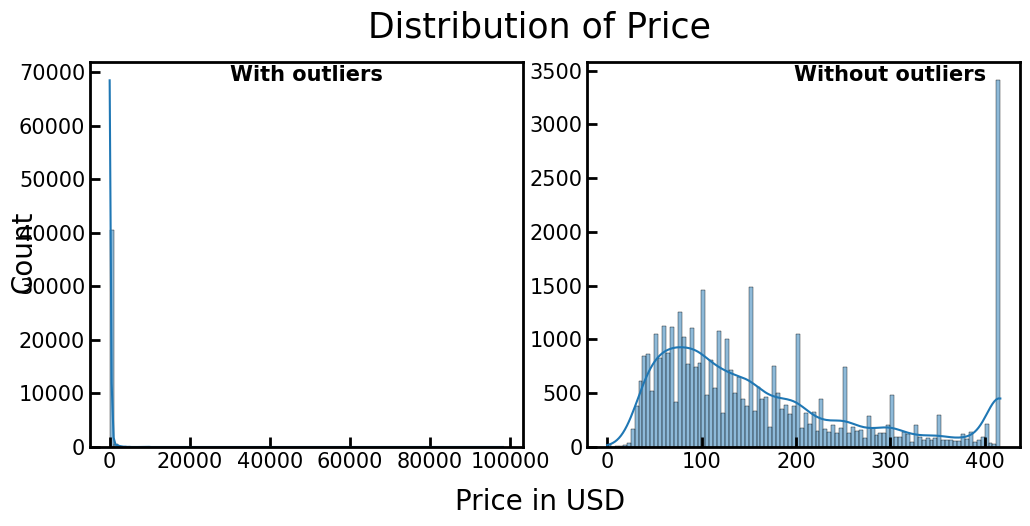

In [1417]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ax = plt.subplot(1, 2, 1)

hist_with_outliers = sns.histplot(x = [row[0] for row in df.select('price').collect()], kde = True, bins = 100, ax = ax)
ax.set_ylabel("")
ax.set_xlabel("")

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

ax.text(0.5, 0.95, "With outliers", horizontalalignment='center',\
     transform=ax.transAxes, fontsize = 15, fontweight="bold", rotation = 'horizontal')


ax = plt.subplot(1, 2, 2)

hist_without_outliers = sns.histplot(x = [row[0] for row in df.select('price_outlier_removed').collect()], kde = True, bins = 100, ax = ax)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.set_ylabel("")
ax.set_xlabel("")

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')
ax.text(0.7, 0.95, "Without outliers", horizontalalignment='center',\
     transform=ax.transAxes, fontsize = 15, fontweight="bold", rotation = 'horizontal')

plt.subplots_adjust(wspace=0.15, hspace=0.075)
fig.text(0.07, 0.5, 'Count', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, 0., 'Price in USD', ha='center', va='center', rotation='horizontal', fontsize = 20)

fig.text(0.5, 0.95, 'Distribution of Price', ha='center', va='center', rotation='horizontal', fontsize = 25)

plt.savefig('price_vs_priceoutlierremoved_distribution_skewness.jpg',  bbox_inches='tight', dpi = 500)

In [1418]:
from pyspark.sql.functions import max

max_price = df.agg(max('price')).collect()[0][0]
print("THE Maximum cost of a rental is: ", max_price) # maximum price of a rental

THE Maximum cost of a rental is:  98159.0


In [1419]:
from pyspark.sql.functions import mean

result = df.groupBy('neighbourhood_group_cleansed').agg(mean('price').alias('avg_price'))
result.show()

+----------------------------+------------------+
|neighbourhood_group_cleansed|         avg_price|
+----------------------------+------------------+
|                      Queens|135.65638901672037|
|                    Brooklyn|171.92644059153494|
|               Staten Island| 320.3432098765432|
|                   Manhattan|  301.211664935964|
|                       Bronx|180.81663516068053|
+----------------------------+------------------+



In [1420]:
df_filtered = df.filter(df.price > 1000)

In [1421]:
df_filtered.count(), len(df_filtered.columns)

(780, 33)

<b> 780 rentals are priced more than $ 1000.

It can be seen that the price column is very much positively or right skewed. It looks like majority of the rentals have price between 50 to 300. Some rentals are extremely expensive. Some are even higher than 1000. One costs $ 98159 which seems to indicate there are another variables at play here. Perhaps, the rental is a penthouse located in an extremely expensive neighbourhood?. We will need to look into it. We will keep the original column as it is because we can't simply remove outliers unless we are certain that they are not errors but correct values.

In [1422]:
# df['price_outlier_removed'] = price_outlier_removed

## `host_response_time` vs `Price`

In [1423]:
df.groupBy('host_response_time').count().orderBy(desc('count')).show()

+------------------+-----+
|host_response_time|count|
+------------------+-----+
|    within an hour|18063|
|           Unknown|13645|
|within a few hours| 5997|
|      within a day| 3201|
|a few days or more|  627|
+------------------+-----+



In [1424]:
dictionary

{'within an hour': 18063,
 'Unknown': 13645,
 'within a few hours': 5997,
 'within a day': 3201,
 'a few days or more': 627}

In [1425]:
from pyspark.sql.functions import mean, median

price_vs_response_time = (df
                          .groupBy('host_response_time')
                          .agg(mean('price').alias('mean'), 
                               median('price').alias('median'), 
                               count('*').alias('Count'))
                          .orderBy('host_response_time')
                         )
price_vs_response_time.show()


+------------------+------------------+------+-----+
|host_response_time|              mean|median|Count|
+------------------+------------------+------+-----+
|           Unknown|166.94774642726273| 106.0|13645|
|a few days or more|253.20574162679426| 142.0|  627|
|      within a day|253.36613558263042| 145.0| 3201|
|within a few hours|203.24595631148907| 125.0| 5997|
|    within an hour| 263.1219066600232| 153.0|18063|
+------------------+------------------+------+-----+



Text(0.04, 0.5, 'Count')

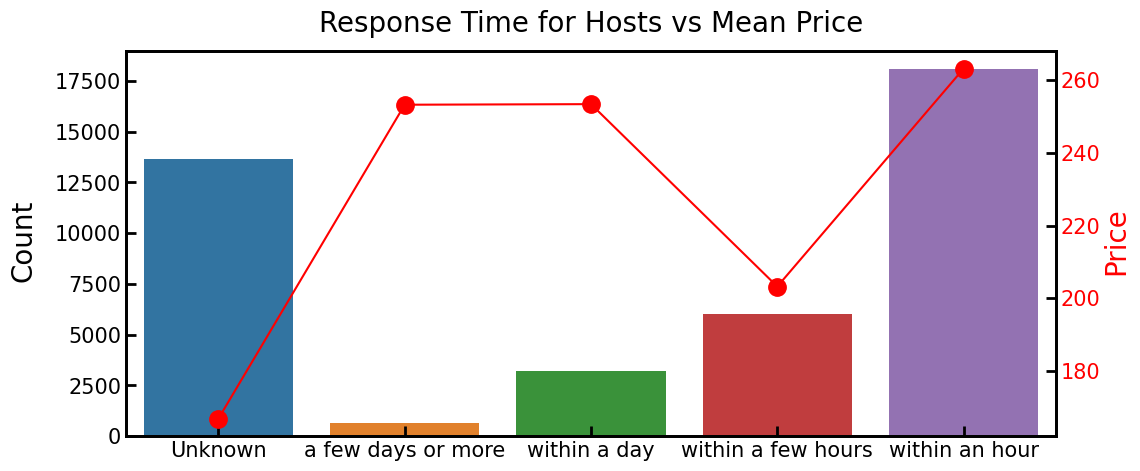

In [1426]:
fig, ax = plt.subplots(figsize=(12, 5))
bar = sns.barplot(x = [row[0] for row in price_vs_response_time.select('host_response_time').collect()],\
                   y = [row[0] for row in price_vs_response_time.select('Count').collect()], ax  =ax) 

bar.set_xlabel("")
bar.set_ylabel("")

ax1 = ax.twinx()
ax1.plot(range(5), [row[0] for row in price_vs_response_time.select('mean').collect()], color = 'red', marker = 'o', markersize = 12.5)


ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Response Time for Hosts vs Mean Price',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

plt.xticks(rotation = 90)
ax.margins(x=0.02)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black') 
ax1.spines['right'].set_color('black')
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_color('black')
ax1.spines['left'].set_lw(2) 
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=7)
ax1.tick_params(which = 'both', direction = 'in')
ax1.margins(x=0.02)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15, labelcolor = 'red')

fig.text(0.95, 0.5, 'Price', ha='center', va='center', rotation = 'vertical', color = 'red', fontsize = 20)
fig.text(0.04, 0.5, 'Count', ha='center', va='center', rotation='vertical', fontsize = 20)


It looks like due to too much skewness, we can't find relavant relationship between the price of a rental and how quickly a host responds to inquiries. So, lets aggregate using `price_outlier_removed` column.

In [1427]:
from pyspark.sql.functions import median, mean, count, col

In [1428]:
price_vs_response_time = df.groupby('host_response_time')\
                           .agg(median('price_outlier_removed'))\
                           .withColumnRenamed('median(price_outlier_removed)', 'median_price')\
                           .withColumn('Count', when(col('host_response_time') == 'within an hour', 18063)\
                                                .when(col('host_response_time') == 'within a few hours', 5997)\
                                                .when(col('host_response_time') == 'within a day', 3201)\
                                                .when(col('host_response_time') == 'a few days or more', 627)\
                                                .otherwise(13645))\
                           .orderBy('host_response_time')\
                           .select('host_response_time', 'median_price', 'Count')


# price_vs_response_time = df.groupby('host_response_time')\
#                            .agg(mean('price_outlier_removed'))\
#                            .withColumnRenamed('avg(price_outlier_removed)', 'mean_price')\
#                            .withColumn('Count', when(col('host_response_time') == 'within an hour', 18063)\
#                                                 .when(col('host_response_time') == 'within a few hours', 5997)\
#                                                 .when(col('host_response_time') == 'within a day', 3201)\
#                                                 .when(col('host_response_time') == 'a few days or more', 627)\
#                                                 .otherwise(13645))\
#                            .orderBy('host_response_time')\
#                            .select('host_response_time', 'mean_price', 'Count')



price_vs_response_time.show()

+------------------+------------+-----+
|host_response_time|median_price|Count|
+------------------+------------+-----+
|           Unknown|       106.0|13645|
|a few days or more|       142.0|  627|
|      within a day|       145.0| 3201|
|within a few hours|       125.0| 5997|
|    within an hour|       153.0|18063|
+------------------+------------+-----+



Text(0.04, 0.5, 'Count')

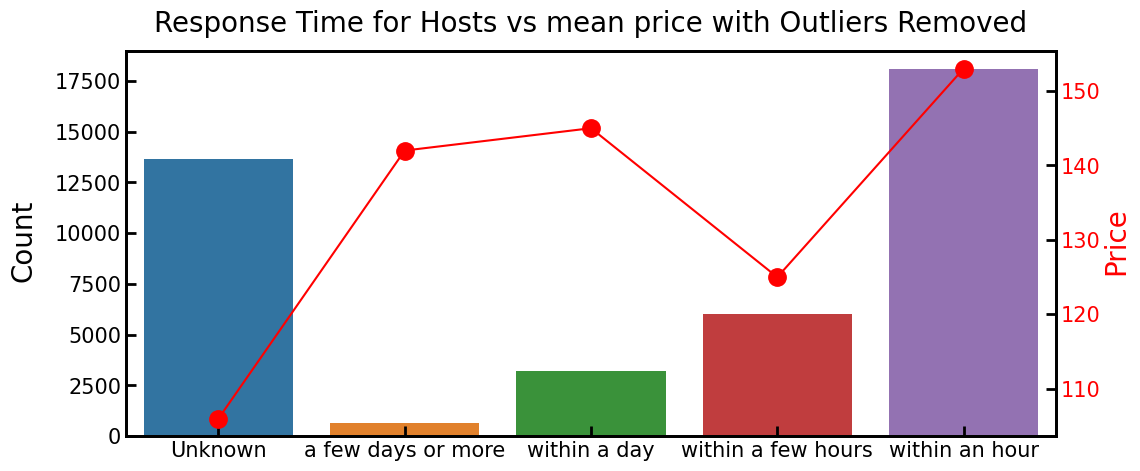

In [1429]:
# [row[0] for row in price_vs_response_time.select('median_price').collect()]

fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = [row[0] for row in price_vs_response_time.select('host_response_time').collect()], \
                  y = [row[0] for row in price_vs_response_time.select('Count').collect()], ax  =ax)
bar.set_xlabel("")
bar.set_ylabel("")

ax1 = ax.twinx()
ax1.plot(range(5), [row[0] for row in price_vs_response_time.select('median_price').collect()], color = 'red', marker = 'o', markersize = 12.5)


ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Response Time for Hosts vs mean price with Outliers Removed',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

plt.xticks(rotation = 90)
ax.margins(x=0.02)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black') 
ax1.spines['right'].set_color('black')
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_color('black')
ax1.spines['left'].set_lw(2) 
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=7)
ax1.tick_params(which = 'both', direction = 'in')
ax1.margins(x=0.02)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15, labelcolor = 'red')

fig.text(0.95, 0.5, 'Price', ha='center', va='center', rotation = 'vertical', color = 'red', fontsize = 20)
fig.text(0.04, 0.5, 'Count', ha='center', va='center', rotation='vertical', fontsize = 20)



Now this provides useful analysis. After removing the outliers in the price column, we can clearly see that the hosts that respond within an hour for rental inquires have the highest average price. Unsuprisingly, the rentals whose hosts response is unrecorded have the lowest rental price among all other categories.

Since the price column is highly skewed, lets also check how this analysis varies with median price.

In [1430]:
price_vs_response_time = df.groupby('host_response_time')\
                           .agg(mean('price'), median('price'), count('price'))\
                           .withColumnRenamed('avg(price)', 'mean')\
                           .withColumnRenamed('median(price)', 'median')\
                           .withColumnRenamed('count(price)', 'count')\
                           .orderBy('host_response_time')
price_vs_response_time.show()

+------------------+------------------+------+-----+
|host_response_time|              mean|median|count|
+------------------+------------------+------+-----+
|           Unknown|166.94774642726273| 106.0|13645|
|a few days or more|253.20574162679426| 142.0|  627|
|      within a day|253.36613558263042| 145.0| 3201|
|within a few hours|203.24595631148907| 125.0| 5997|
|    within an hour| 263.1219066600232| 153.0|18063|
+------------------+------------------+------+-----+



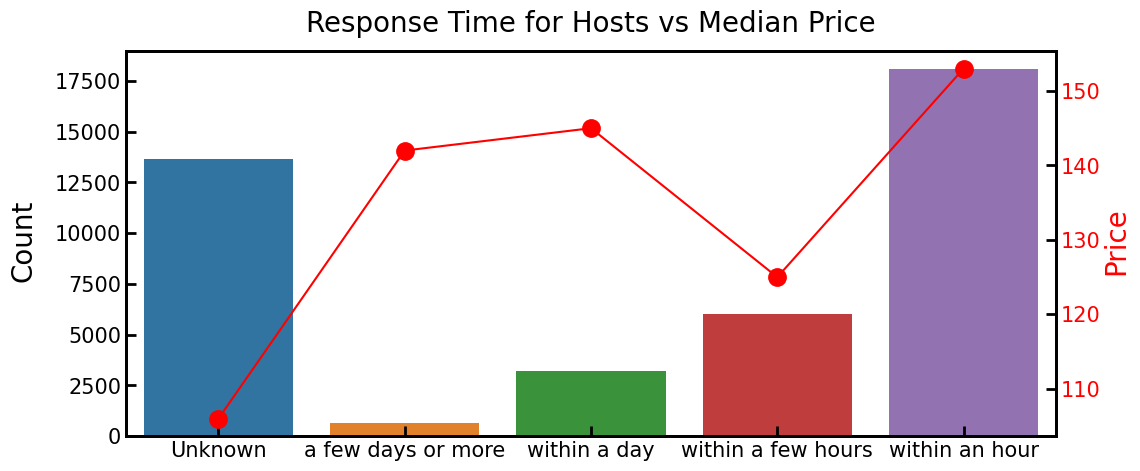

In [1431]:
# [row[0] for row in df.select('count').collect()]

fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = [row[0] for row in price_vs_response_time.select('host_response_time').collect()], \
                  y = [row[0] for row in price_vs_response_time.select('count').collect()], ax  =ax)
bar.set_xlabel("")
bar.set_ylabel("")

ax1 = ax.twinx()
ax1.plot(range(5), [row[0] for row in price_vs_response_time.select('median').collect()], color = 'red', marker = 'o', markersize = 12.5)


ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Response Time for Hosts vs Median Price',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

plt.xticks(rotation = 90)
ax.margins(x=0.02)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black') 
ax1.spines['right'].set_color('black')
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_color('black')
ax1.spines['left'].set_lw(2) 
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=7)
ax1.tick_params(which = 'both', direction = 'in')
ax1.margins(x=0.02)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15, labelcolor = 'red')

fig.text(0.95, 0.5, 'Price', ha='center', va='center', rotation = 'vertical', color = 'red', fontsize = 20)
fig.text(0.04, 0.5, 'Count', ha='center', va='center', rotation='vertical', fontsize = 20)

plt.savefig('host_response_time_vs_median_rental_price.jpg',  bbox_inches='tight', dpi = 500)

In [1432]:
df.filter(col('host_response_time') == 'Unknown').count() / df.count()

0.3285339368694773

<b> Almost 33 % of the values in this column are `Unknown` which indicates that majority of hosts response time is not known. Similarly, this group of hosts have lowest rental price on average. So, we will use this column for modelling purpose.

In [1433]:
features_for_modelling.append('host_response_time')

In [1434]:
df.select(sum(col('host_response_time').isNull().cast('integer'))).show()

+----------------------------------------------+
|sum(CAST((host_response_time IS NULL) AS INT))|
+----------------------------------------------+
|                                             0|
+----------------------------------------------+



In [1435]:
features_for_modelling

['host_response_time']

## `host_response_rate` vs `Price`

In [1436]:
data_dictionary['host_response_rate']

'The percentage of messages that the Airbnb host responds to.'

In [1437]:
# df['host_response_rate'].isnull().sum()
df.select(sum(col('host_response_rate').isNull().cast('integer'))).show()

+----------------------------------------------+
|sum(CAST((host_response_rate IS NULL) AS INT))|
+----------------------------------------------+
|                                         13645|
+----------------------------------------------+



In [1438]:
df.groupBy('host_response_rate').count().orderBy(desc('count')).show()

+------------------+-----+
|host_response_rate|count|
+------------------+-----+
|              100%|18953|
|              null|13645|
|               99%| 1480|
|               90%| 1152|
|               80%|  733|
|               98%|  718|
|               94%|  484|
|                0%|  381|
|               97%|  361|
|               67%|  285|
|               50%|  279|
|               96%|  261|
|               95%|  260|
|               92%|  255|
|               70%|  211|
|               93%|  207|
|               91%|  190|
|               60%|  159|
|               86%|  148|
|               89%|  132|
+------------------+-----+
only showing top 20 rows



<b> Lets remove % from the values first.

In [1439]:
# df = df.withColumn("host_response_rate", regexp_replace("host_response_rate", "%,", ""))
from pyspark.sql.functions import regexp_replace, col

df = df.withColumn("host_response_rate", regexp_replace(col("host_response_rate"), "[^0-9.]", ""))

In [1440]:
df.groupBy('host_response_rate').count().orderBy(desc('count')).show(5)

+------------------+-----+
|host_response_rate|count|
+------------------+-----+
|               100|18953|
|              null|13645|
|                99| 1480|
|                90| 1152|
|                80|  733|
+------------------+-----+
only showing top 5 rows



In [1441]:
# df['host_response_rate'] = df['host_response_rate'].apply(lambda x : x[:-1] if x not in ['N/A', np.nan] else x )

<b> Lets replace N/A with null values

In [1442]:
from pyspark.sql.functions import when, col

df = df.withColumn("host_response_rate", when(col("host_response_rate") == "N/A", float("nan")).otherwise(col("host_response_rate")))

<b> Lets replace "" values with null values

In [1443]:
df.filter(col("host_response_rate") == "").count()

0

In [1444]:
df = df.withColumn("host_response_rate", when(col("host_response_rate") == "", None).otherwise(col("host_response_rate")))

In [1445]:
df.filter(col("host_response_rate").isNull()).count() / df.count()

0.3285339368694773

There is no point in filling almost 33 % of null values. Lets do further analysis with price before deciding what to do with this column.

In [1446]:
temp = df.select('host_response_rate', 'price', 'price_outlier_removed').dropna()
temp = temp.withColumn('host_response_rate', col('host_response_rate').cast('int'))

In [1447]:
temp.show()

+------------------+-----+---------------------+
|host_response_rate|price|price_outlier_removed|
+------------------+-----+---------------------+
|                72|175.0|                175.0|
|                90| 60.0|                 60.0|
|               100| 68.0|                 68.0|
|                94| 68.0|                 68.0|
|               100| 62.0|                 62.0|
|               100| 65.0|                 65.0|
|               100|220.0|                220.0|
|               100| 95.0|                 95.0|
|               100|150.0|                150.0|
|               100|395.0|                395.0|
|               100|124.0|                124.0|
|               100|124.0|                124.0|
|                33| 55.0|                 55.0|
|               100| 80.0|                 80.0|
|               100|119.0|                119.0|
|                80|146.0|                146.0|
|               100| 96.0|                 96.0|
|               100|

<AxesSubplot:>

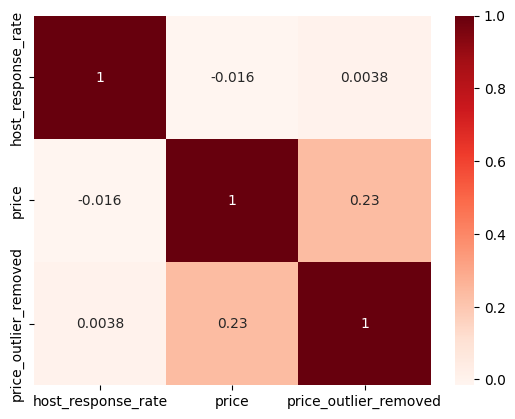

In [1448]:
sns.heatmap(temp.toPandas().corr(), annot = True, cmap = 'Reds')

There seems to be no correlation between the price and host's response rate.

In [1449]:
from pyspark.sql.functions import asc

temp1 = temp.groupBy('host_response_rate')\
           .agg({'price': 'median', 'price_outlier_removed': 'median'})\
           .withColumnRenamed('median(price)', 'price')\
           .withColumnRenamed('median(price_outlier_removed)', 'price_outlier_removed')\
           .orderBy(asc('host_response_rate'))\
           .fillna(0)

In [1450]:
temp1.show()

+------------------+-----+---------------------+
|host_response_rate|price|price_outlier_removed|
+------------------+-----+---------------------+
|                 0|125.0|                125.0|
|                10| 95.0|                 95.0|
|                13|160.0|                160.0|
|                14|169.0|                169.0|
|                17|223.0|                223.0|
|                20|150.0|                150.0|
|                22|735.0|               318.25|
|                25|147.5|                147.5|
|                26|802.0|                416.5|
|                29| 80.0|                 80.0|
|                30| 57.0|                 57.0|
|                31|156.5|                156.5|
|                33|173.0|                173.0|
|                38|253.5|                253.5|
|                40|144.0|                144.0|
|                41|220.0|                220.0|
|                43|110.0|                110.0|
|                44|

Text(0.5, 0.0, 'Host Response Rate')

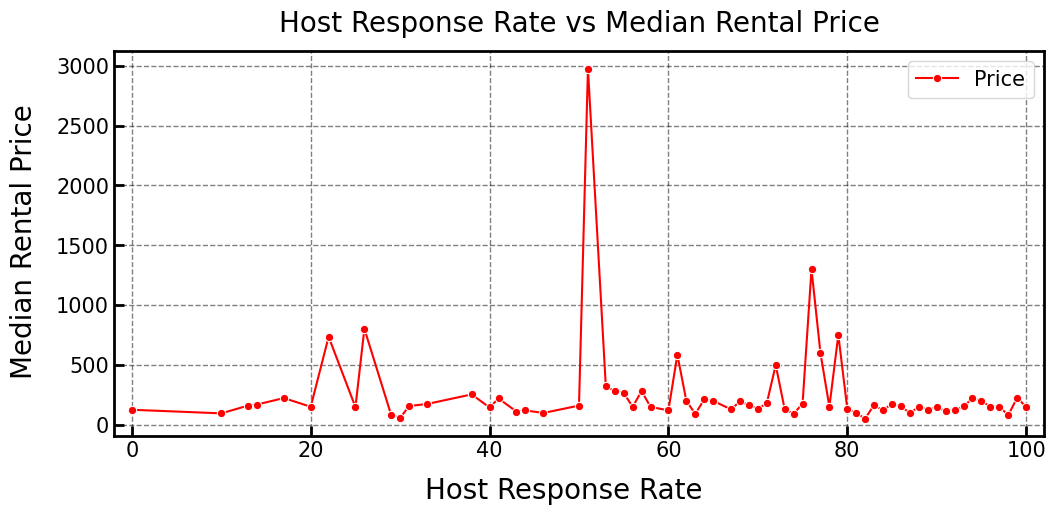

In [1451]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.lineplot(x = temp1.toPandas()['host_response_rate'], y = temp1.toPandas()['price'], ax  =ax, color = 'red', marker = 'o', label = 'Price')

bar.set_xlabel("")
bar.set_ylabel("")



ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Host Response Rate vs Median Rental Price',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

# plt.xticks(rotation = 90)
ax.margins(x=0.02)

plt.legend(fontsize = 15)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')
ax.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')

fig.text(0.05, 0.5, 'Median Rental Price', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, 0., 'Host Response Rate', ha='center', va='center', rotation='horizontal', fontsize = 20)
# plt.xticks(range(1,10,1));


<b> There seems to be no relationship between the price of a rental and it's host's percentage of responese to rental inquiries. So, we will drop this column.

In [1452]:
df = df.drop('host_response_rate')

In [1453]:
columns_that_are_dropped.append('host_response_rate')

## `host_acceptance_rate` vs `Price`

In [1454]:
data_dictionary['host_acceptance_rate']

'The percentage of booking requests that the Airbnb host accepts.'

In [1455]:
df.groupBy('host_acceptance_rate').count().show()

+--------------------+-----+
|host_acceptance_rate|count|
+--------------------+-----+
|                 88%|  363|
|                 31%|   16|
|                 81%|  176|
|                 33%|  198|
|                 27%|   38|
|                 45%|   19|
|                 82%|  213|
|                 66%|   79|
|                  6%|  346|
|                 24%|    9|
|                 98%| 1383|
|                 83%|  286|
|                  0%|  946|
|                 89%|  521|
|                 54%|   82|
|                null|12211|
|                 70%|  149|
|                 90%|  377|
|                 85%|  382|
|                 38%|   45|
+--------------------+-----+
only showing top 20 rows



<b> Lets remove % from the values first.

In [1456]:
from pyspark.sql.functions import regexp_replace, col, desc

In [1457]:

df = df.withColumn("host_acceptance_rate", regexp_replace(col("host_acceptance_rate"), "[^0-9.]", ""))

In [1458]:
df.groupBy('host_acceptance_rate').count().orderBy(desc('count')).show(5)

+--------------------+-----+
|host_acceptance_rate|count|
+--------------------+-----+
|                null|12211|
|                 100| 9438|
|                  99| 1796|
|                  97| 1513|
|                  98| 1383|
+--------------------+-----+
only showing top 5 rows



<b> Lets replace N/A with null values

In [1459]:
from pyspark.sql.functions import when, col

df = df.withColumn("host_acceptance_rate", when(col("host_acceptance_rate") == "N/A", float("nan")).otherwise(col("host_acceptance_rate")))

<b> Lets replace "" values with null values

In [1460]:
df.filter(col("host_acceptance_rate") == "").count()

0

In [1461]:
df = df.withColumn("host_acceptance_rate", when(col("host_acceptance_rate") == "", None).otherwise(col("host_acceptance_rate")))

In [1462]:
df.filter(col("host_acceptance_rate").isNull()).count() / df.count()

0.294007175017456

Almost 30 % of data in this columns are null values. Let's check if the host_acceptance rate truly impacts the price or not.

In [1463]:
temp = df.select('host_acceptance_rate', 'price', 'price_outlier_removed').dropna()
temp = temp.withColumn('host_acceptance_rate', col('host_acceptance_rate').cast('int'))

In [1464]:
temp.show()

+--------------------+-----+---------------------+
|host_acceptance_rate|price|price_outlier_removed|
+--------------------+-----+---------------------+
|                  22|175.0|                175.0|
|                  50|275.0|                275.0|
|                  82| 60.0|                 60.0|
|                 100| 68.0|                 68.0|
|                 100| 68.0|                 68.0|
|                 100| 62.0|                 62.0|
|                  13| 65.0|                 65.0|
|                 100|220.0|                220.0|
|                  54| 95.0|                 95.0|
|                  98|150.0|                150.0|
|                  96|395.0|                395.0|
|                  97|124.0|                124.0|
|                  97|124.0|                124.0|
|                   0| 55.0|                 55.0|
|                  82| 80.0|                 80.0|
|                  83|119.0|                119.0|
|                  95|146.0|   

<AxesSubplot:>

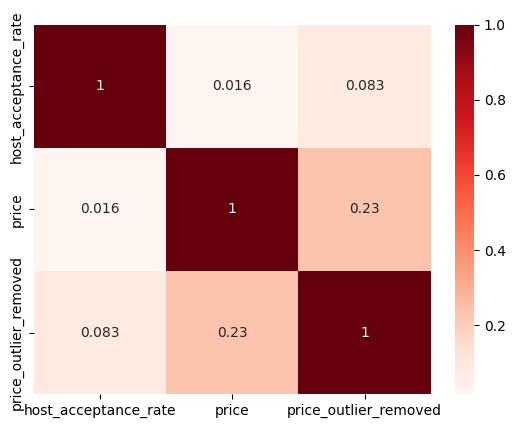

In [1465]:
sns.heatmap(temp.toPandas().corr(), annot = True, cmap = 'Reds')

<b> There does not seem to be much relationship between these two columns. So, we will proceed to drop this column.

In [1466]:
temp1 = temp.groupBy('host_acceptance_rate')\
           .agg({'price': 'median', 'price_outlier_removed': 'median'})\
           .withColumnRenamed('median(price)', 'price')\
           .withColumnRenamed('median(price_outlier_removed)', 'price_outlier_removed')\
           .orderBy(asc('host_acceptance_rate'))\
           .fillna(0)
temp1.show(5)

+--------------------+-----+---------------------+
|host_acceptance_rate|price|price_outlier_removed|
+--------------------+-----+---------------------+
|                   0|118.5|                118.5|
|                   4|783.5|                416.5|
|                   5|178.5|                178.5|
|                   6| 36.0|                 36.0|
|                   7|314.5|               297.75|
+--------------------+-----+---------------------+
only showing top 5 rows



In [1467]:
# temp1 = temp.groupby('host_acceptance_rate')[['price', 'price_outlier_removed']].median().reset_index();temp

Text(0.5, 0.0, 'Host Acceptance Rate')

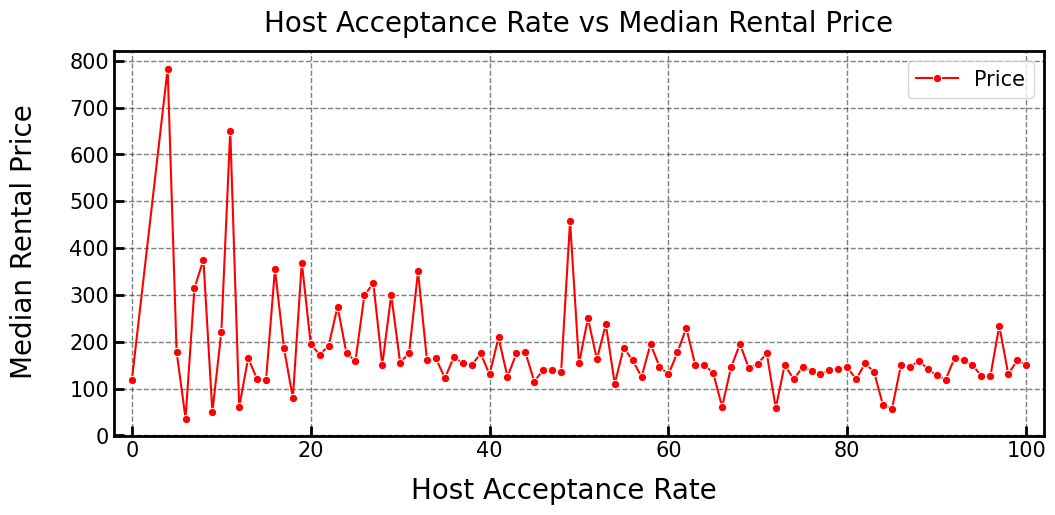

In [1468]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.lineplot(x = temp1.toPandas()['host_acceptance_rate'], \
                   y = temp1.toPandas()['price'], ax  =ax, color = 'red', marker = 'o', label = 'Price')

bar.set_xlabel("")
bar.set_ylabel("")



ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Host Acceptance Rate vs Median Rental Price',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

# plt.xticks(rotation = 90)
ax.margins(x=0.02)

plt.legend(fontsize = 15)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')
ax.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')

fig.text(0.05, 0.5, 'Median Rental Price', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, 0., 'Host Acceptance Rate', ha='center', va='center', rotation='horizontal', fontsize = 20)
# plt.xticks(range(1,10,1));


<b> The price seems to be very high for hosts with very low acceptance rate. Perhaps it is due to the fact that these rentals are top tier and only the very rich stay here. So, the host is very selective on renting their property to people. This column will be useful for modelling. But, lets check the null values.

<b> Working with null values in this column.

In [1469]:
df.filter(col("host_acceptance_rate").isNull()).count() / df.count() * 100

29.4007175017456

<b> Almost 29.5 % of the values in this column are null. 
It is perhaps better if we simply drop this column due to the amount of null values.

In [1470]:
features_for_modelling

['host_response_time']

## `host_is_superhost` vs `Price`

In [1471]:
from pyspark.sql.functions import desc

total_rows = df.count()
result = df.groupBy('host_is_superhost').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+-----------------+-----+-------------------+
|host_is_superhost|count|         percentage|
+-----------------+-----+-------------------+
|                f|32635|  78.57607203910145|
|                t| 8869| 21.354103965521393|
|             null|   29|0.06982399537716996|
+-----------------+-----+-------------------+



Almost 79 % of Airbnb rental hosts in NYC are not superhost. Could it be possible that superhosts will have higher rental price on average?

In [1472]:
df.filter(col("host_acceptance_rate").isNull()).count()

12211

In [1473]:
df.filter(df.host_is_superhost.isNull()).count()

29

We will fill null values with `f` as this value is present in almost 78.6 % of values in this column. Lets check the relationship with price.

In [1474]:
df = df.withColumn('host_is_superhost', when(col('host_is_superhost').isNull(), 'f').otherwise(col('host_is_superhost')))

In [1475]:
df.filter(df.host_is_superhost.isNull()).count()

0

<b> Changing f to False and t to True

In [1476]:
df = df.withColumn("host_is_superhost", when(col("host_is_superhost") == "t", True).otherwise(False))

In [1477]:
result = df.groupBy('host_is_superhost').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+-----------------+-----+------------------+
|host_is_superhost|count|        percentage|
+-----------------+-----+------------------+
|            false|32664| 78.64589603447861|
|             true| 8869|21.354103965521393|
+-----------------+-----+------------------+



In [1478]:
from pyspark.sql.functions import median, stddev, count

temp = df.groupby('host_is_superhost').agg(
    median('price_outlier_removed').alias('median'),
    stddev('price_outlier_removed').alias('std'),
    count('price').alias('count')
).orderBy('host_is_superhost')
temp.show()

+-----------------+------+------------------+-----+
|host_is_superhost|median|               std|count|
+-----------------+------+------------------+-----+
|            false| 130.0| 112.6402023156937|32664|
|             true| 144.0|111.38237463153719| 8869|
+-----------------+------+------------------+-----+



Text(0.5, 0.0, 'Is host superhost?')

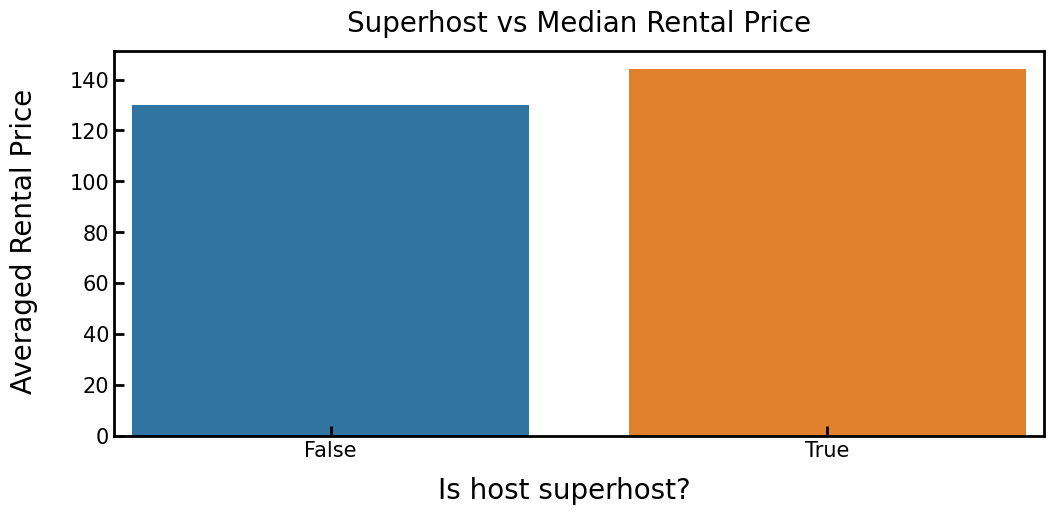

In [1479]:

fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = 'host_is_superhost', y = 'median', data = temp.toPandas())

bar.set_xlabel("")
bar.set_ylabel("")



ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Superhost vs Median Rental Price',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

# plt.xticks(rotation = 90)
ax.margins(x=0.02)

# plt.legend(fontsize = 15)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')
# ax.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')

fig.text(0.05, 0.5, 'Averaged Rental Price', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, 0., 'Is host superhost?', ha='center', va='center', rotation='horizontal', fontsize = 20)

The median score for superhost Airbnb rentals in NYC (144.0) is higher than the median score for non-superhost Airbnb rentals (130.0), suggesting that superhost Airbnb rentals tend to have higher scores than non-superhost rentals. Therefore, we can conclude that being a superhost is associated with higher median scores in NYC Airbnb rentals.


So, we will keep this column for modelling purpose.


In [1480]:

features_for_modelling.append('host_is_superhost')

In [1481]:
features_for_modelling

['host_response_time', 'host_is_superhost']

## `host_listings_count` vs `Price`

In [1482]:
data_dictionary['host_listings_count']

'The number of listings that the Airbnb host has on the platform.'

In [1483]:
df.select('host_listings_count').show()

+-------------------+
|host_listings_count|
+-------------------+
|                6.0|
|                1.0|
|                1.0|
|                2.0|
|                1.0|
|                1.0|
|                1.0|
|                2.0|
|                2.0|
|                2.0|
|                2.0|
|                4.0|
|                1.0|
|                3.0|
|                3.0|
|                1.0|
|                2.0|
|                1.0|
|                7.0|
|                1.0|
+-------------------+
only showing top 20 rows



In [1484]:
# df.host_listings_count.isnull().sum()
# df.filter(col("host_listings_count") == "").count()
df.filter(df.host_listings_count.isNull()).count()

5

In [1485]:
df.select('host_listings_count').distinct().show()

+-------------------+
|host_listings_count|
+-------------------+
|              147.0|
|              169.0|
|              160.0|
|                8.0|
|               70.0|
|                7.0|
|              249.0|
|              154.0|
|              232.0|
|              410.0|
|              180.0|
|               88.0|
|              280.0|
|               49.0|
|              101.0|
|               29.0|
|               47.0|
|               42.0|
|              215.0|
|              465.0|
+-------------------+
only showing top 20 rows



In [1486]:
# temp = df[df.host_listings_count.isnull() == False][['host_listings_count', 'price', 'price_outlier_removed']]

temp = df.filter(df.host_listings_count.isNotNull())\
.select('host_listings_count', 'price', 'price_outlier_removed')

In [1487]:
temp = temp.withColumn("host_listings_count", col("host_listings_count").cast("int"))

In [1488]:
temp.toPandas().corr()

host_listings_count     price  price_outlier_removed
host_listings_count               1.000000  0.055440               0.204267
price                             0.055440  1.000000               0.256822
price_outlier_removed             0.204267  0.256822               1.000000

In [1489]:
temp1 = temp.groupby('host_listings_count').agg(median('price'), median('price_outlier_removed')) \
    .withColumnRenamed('median(price)', 'price') \
    .withColumnRenamed('median(price_outlier_removed)', 'price_outlier_removed') \
    .orderBy('host_listings_count')

temp1.show()

+-------------------+-----+---------------------+
|host_listings_count|price|price_outlier_removed|
+-------------------+-----+---------------------+
|                  1|134.0|                134.0|
|                  2|126.0|                126.0|
|                  3|115.0|                115.0|
|                  4|114.0|                114.0|
|                  5| 99.0|                 99.0|
|                  6|114.0|                114.0|
|                  7|138.0|                138.0|
|                  8|115.0|                115.0|
|                  9|135.0|                135.0|
|                 10|150.0|                150.0|
|                 11|129.0|                129.0|
|                 12|155.0|                155.0|
|                 13|199.0|                199.0|
|                 14|179.5|                179.5|
|                 15|118.0|                118.0|
|                 16|195.0|                195.0|
|                 17|155.0|                155.0|


In [1490]:
temp1.toPandas().corr()

host_listings_count     price  price_outlier_removed
host_listings_count               1.000000  0.414471               0.298185
price                             0.414471  1.000000               0.766284
price_outlier_removed             0.298185  0.766284               1.000000

Text(0.5, 0.0, 'Host Listings Count')

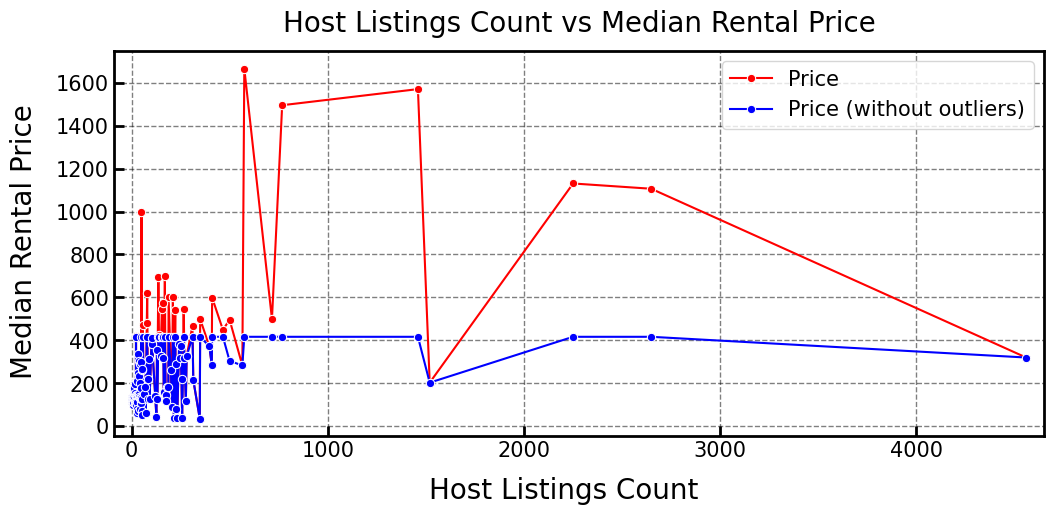

In [1491]:
temp1 = temp1.toPandas()

fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.lineplot(x = temp1['host_listings_count'], y = temp1['price'], ax  =ax, color = 'red', marker = 'o', label = 'Price')
bar = sns.lineplot(x = temp1['host_listings_count'], y = temp1['price_outlier_removed'], ax  =ax, color = 'blue', marker = 'o', label = 'Price (without outliers)')

bar.set_xlabel("")
bar.set_ylabel("")



ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Host Listings Count vs Median Rental Price',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

# plt.xticks(rotation = 90)
ax.margins(x=0.02)

plt.legend(fontsize = 15)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')
ax.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')

fig.text(0.05, 0.5, 'Median Rental Price', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, 0., 'Host Listings Count', ha='center', va='center', rotation='horizontal', fontsize = 20)
# plt.xticks(range(1,10,1));

<AxesSubplot:>

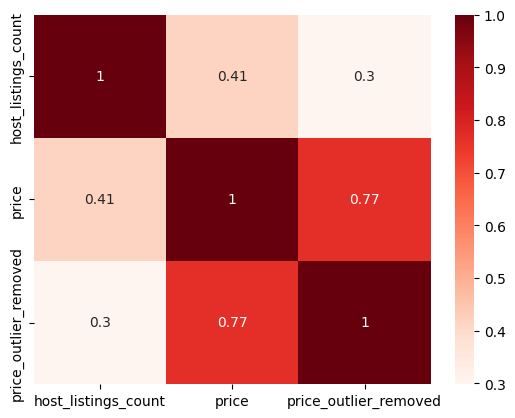

In [1492]:
sns.heatmap(temp1.corr(), annot = True, cmap = 'Reds')

There seems to be some linear relationship between price and number of listings of a host. The `Pearson Correlation Coefficient (r)` between number of listings and median score of original price column is 0.3. Similarly, the value of r beteween number of rentals active and  price column with outliers removed is 0.41. 


However, the relationships exists due to heavy outliers and in the plot. Some users have 2648  and 4559  which is very much likely a noise or error in the dataset. So, we will simply exclude this column for modelling purposes.

<b> But first, lets fill the null values.

In [1493]:
df.filter(df.host_listings_count.isNull()).count()

5

There are only 5 null values in this column. But, the values in this column are very delicate. This column represents the number of listings active by a host in NYC Airbnb. Some of the hosts have too many rentals active right now whereas some have very few. So, instead of just filling the null values with mean or median value, it is perhaps in our best interest to simply drop the 5 null values in this column.

In [1494]:
df = df.drop('host_listings_count')
columns_that_are_dropped.append('host_listings_count')

In [1495]:
# features_for_modelling.append('host_listings_count')

## `Price` vs `host_has_profile_pic`

In [1496]:
total_rows = df.count()
result = df.groupBy('host_has_profile_pic').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+--------------------+-----+--------------------+
|host_has_profile_pic|count|          percentage|
+--------------------+-----+--------------------+
|                   t|40904|   98.48554161750897|
|                   f|  624|  1.5024197625984157|
|                null|    5|0.012038619892615511|
+--------------------+-----+--------------------+



In [1497]:
df.filter(df.host_has_profile_pic.isNull()).count()

5

<b> Replacing t with 1 and f with 0.

In [1498]:
df = df.withColumn("host_has_profile_pic", when(col("host_has_profile_pic") == "t", True).otherwise(False))

In [1499]:
result = df.groupBy('host_has_profile_pic').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+--------------------+-----+------------------+
|host_has_profile_pic|count|        percentage|
+--------------------+-----+------------------+
|                true|40904| 98.48554161750897|
|               false|  629|1.5144583824910312|
+--------------------+-----+------------------+



Almost 98.5 % of all hosts have an active profile pic. Lets check if price depends on whether a host has a profile pic or not.

In [1500]:
temp = df.groupBy('host_has_profile_pic') \
         .agg(mean('price').alias('mean'), median('price').alias('median')) \
         .orderBy('host_has_profile_pic')

temp.show()

+--------------------+-----------------+------+
|host_has_profile_pic|             mean|median|
+--------------------+-----------------+------+
|               false|236.7456279809221| 135.0|
|                true|221.7511979268531| 130.0|
+--------------------+-----------------+------+



In [1501]:
temp.toPandas()

host_has_profile_pic        mean  median
0                 False  236.745628   135.0
1                  True  221.751198   130.0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0.0, 'Host has profile pic')

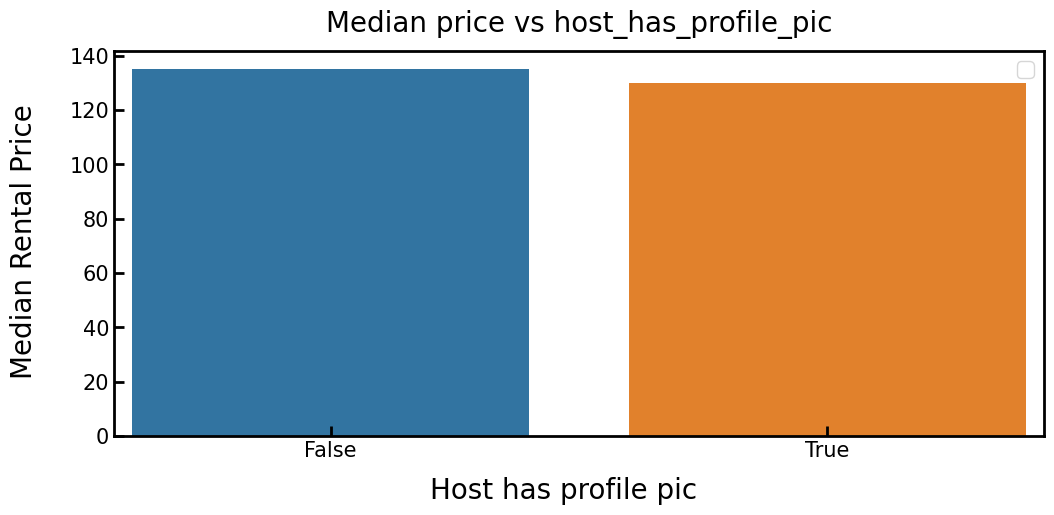

In [1502]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = 'host_has_profile_pic', y = 'median', data = temp.toPandas())
# plt.title("Median price vs host_has_profile_pic")

bar.set_xlabel("")
bar.set_ylabel("")



ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Median price vs host_has_profile_pic',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

# plt.xticks(rotation = 90)
ax.margins(x=0.02)

plt.legend(fontsize = 15)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')
# ax.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')

fig.text(0.05, 0.5, 'Median Rental Price', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, 0., 'Host has profile pic', ha='center', va='center', rotation='horizontal', fontsize = 20)
# plt.xticks(range(1,10,1));

There seems to be no useful analysis from this column. So, we will proceed to drop this column. 

In [1503]:
df = df.drop('host_has_profile_pic')

In [1504]:
columns_that_are_dropped.append('host_has_profile_pic')

## `host_identity_verified` vs `Price`

In [1505]:
total_rows = df.count()
result = df.groupBy('host_identity_verified').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+----------------------+-----+--------------------+
|host_identity_verified|count|          percentage|
+----------------------+-----+--------------------+
|                     t|35262|   84.90116293068162|
|                     f| 6266|  15.086798449425759|
|                  null|    5|0.012038619892615511|
+----------------------+-----+--------------------+



In [1506]:
df.filter(df.host_identity_verified.isNull()).count()

5

<b> Replacing t with 1 and f with 0.

In [1507]:
df = df.withColumn("host_identity_verified", when(col("host_identity_verified") == "t", True).otherwise(False))

In [1508]:
total_rows = df.count()
result = df.groupBy('host_identity_verified').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+----------------------+-----+------------------+
|host_identity_verified|count|        percentage|
+----------------------+-----+------------------+
|                  true|35262| 84.90116293068162|
|                 false| 6271|15.098837069318375|
+----------------------+-----+------------------+



In [1509]:
temp = df.groupBy('host_identity_verified') \
         .agg(mean('price').alias('mean'), median('price').alias('median')) \
         .orderBy('host_identity_verified')

temp.show()

+----------------------+------------------+------+
|host_identity_verified|              mean|median|
+----------------------+------------------+------+
|                 false|250.88646148939563| 124.0|
|                  true|216.83724689467417| 135.0|
+----------------------+------------------+------+



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


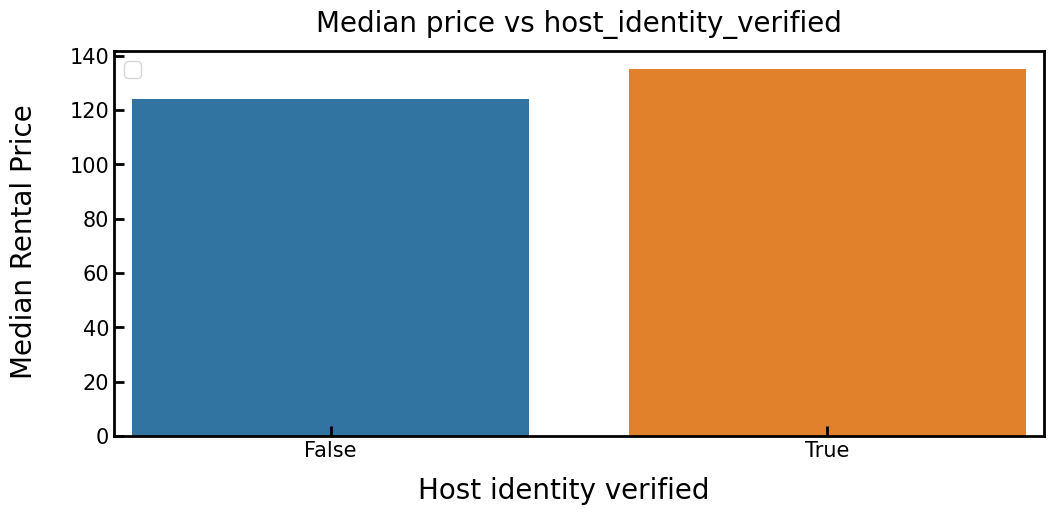

In [1510]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = 'host_identity_verified', y = 'median', data = temp.toPandas())
# plt.title("Median price vs host_has_profile_pic")

bar.set_xlabel("")
bar.set_ylabel("")



ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Median price vs host_identity_verified',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

# plt.xticks(rotation = 90)
ax.margins(x=0.02)

plt.legend(fontsize = 15)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')
# ax.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')

fig.text(0.05, 0.5, 'Median Rental Price', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, 0., 'Host identity verified', ha='center', va='center', rotation='horizontal', fontsize = 20)
plt.savefig('Medianprice_vs_host_identity_verified.jpg',  bbox_inches='tight', dpi = 500)

It can be clearly seen that Airbnb host's whose profile has been verified generally tend to have higher price than the hosts who don't have a identity verified. So, we will keep this column for modeling purpose.

In [1511]:
features_for_modelling.append('host_identity_verified')

## `neighbourhood_cleansed` vs `Price`

In [1512]:
df.select('neighbourhood_cleansed').show(truncate = False)

+----------------------+
|neighbourhood_cleansed|
+----------------------+
|Midtown               |
|Upper West Side       |
|Sunset Park           |
|Bedford-Stuyvesant    |
|Williamsburg          |
|Midtown               |
|East Harlem           |
|East Harlem           |
|Fort Greene           |
|Williamsburg          |
|Bedford-Stuyvesant    |
|Williamsburg          |
|Hell's Kitchen        |
|South Slope           |
|South Slope           |
|Harlem                |
|East Village          |
|Flatbush              |
|Bedford-Stuyvesant    |
|Long Island City      |
+----------------------+
only showing top 20 rows



In [1513]:
df.filter(df.neighbourhood_cleansed.isNull()).count()

0

In [1514]:
# temp = df.groupby('neighbourhood_cleansed')['price'].median().reset_index()
# temp = temp.sort_values('price', ascending = False).reset_index(drop = True)
# temp_max = temp.loc[range(30)]
# temp_min = temp.loc[range(temp.shape[0]-30, temp.shape[0])]

temp = df.groupBy('neighbourhood_cleansed').agg(median('price').alias('price_median')) \
    .orderBy(desc('price_median')).limit(30).toPandas()

temp_max = temp
temp_min = df.groupBy('neighbourhood_cleansed').agg(median('price').alias('price_median')) \
    .orderBy('price_median').limit(30).toPandas()

Text(0.5, 1.0, 'Median price in Top 30 NYC Neighbourhood')

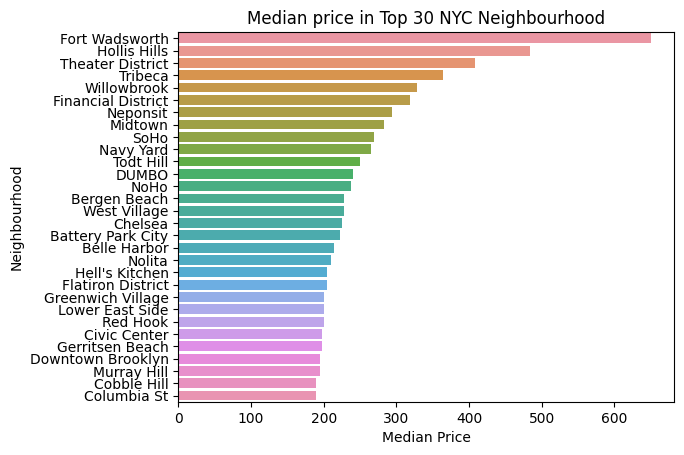

In [1515]:
sns.barplot(x = 'price_median', y = 'neighbourhood_cleansed', data = temp_max)
plt.xlabel("Median Price")
plt.ylabel("Neighbourhood")
plt.title("Median price in Top 30 NYC Neighbourhood")

Text(0.5, 1.0, 'Median price in Lower 30 NYC Neighbourhood')

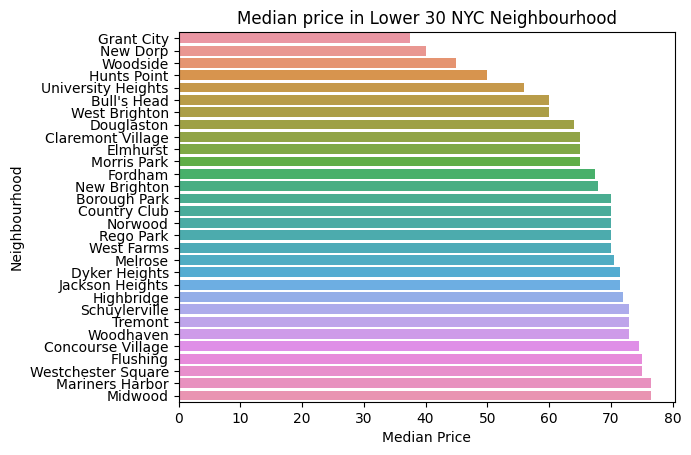

In [1516]:
sns.barplot(x = 'price_median', y = 'neighbourhood_cleansed', data = temp_min)
plt.xlabel("Median Price")
plt.ylabel("Neighbourhood")
plt.title("Median price in Lower 30 NYC Neighbourhood")

It can be seen that `Fort Wadsworth` neighbourhood is top tier expensive with a median price of more than $600


Similarly, Grant city neighbourhood is the cheapest with a median price of less than $ 40. 

Therfore, A tourist wanting to book a rental in NYC should be careful about which nighbourhood they intend to stay because some neighbourhood are simply too expensive than others.

<b> Since there are too many unique values in this column, and we already have another neighbourhood type column with only 5 unique values, we will not keep this column for modelling purpose. However, we will use this column to perform geospatial analysis.

In [1517]:
df1 = df.select('neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'price', 'price_outlier_removed')

In [1518]:
gis_df = df.select('neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'price', 'latitude', 'longitude')

## `neighbourhood_group_cleansed` vs `Price` 

The neighbourhood_cleansed column contains different neighbourhood in NYC. Similarly, each of these neighbourhoods belong to `boroughs` which is present in neighbourhood_group_cleansed column.

In [1519]:
df.groupBy('neighbourhood_group_cleansed').count().orderBy(desc('count')).show()

+----------------------------+-----+
|neighbourhood_group_cleansed|count|
+----------------------------+-----+
|                   Manhattan|17334|
|                    Brooklyn|15688|
|                      Queens| 6519|
|                       Bronx| 1587|
|               Staten Island|  405|
+----------------------------+-----+



In [1520]:
df.filter(df.neighbourhood_group_cleansed.isNull()).count()

0

In [1521]:
temp_count = df.groupBy('neighbourhood_group_cleansed').count().orderBy(desc('count')).toPandas()

In [1522]:
temp_count

neighbourhood_group_cleansed  count
0                    Manhattan  17334
1                     Brooklyn  15688
2                       Queens   6519
3                        Bronx   1587
4                Staten Island    405

Text(0.5, 1.0, 'Number of Airbnb Rentals in different boroughs in NYC')

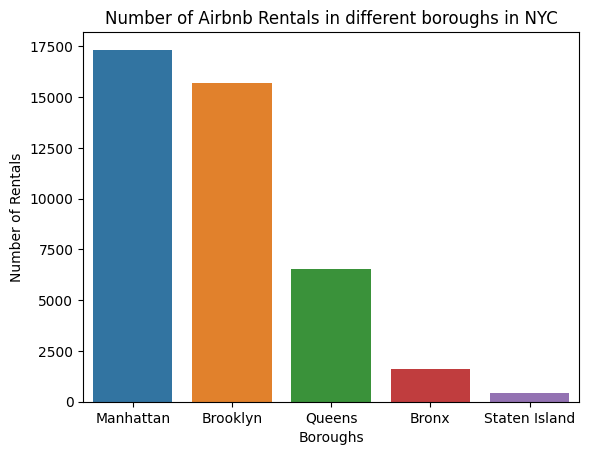

In [1523]:
sns.barplot(x = 'neighbourhood_group_cleansed', y = 'count', data = temp_count)
plt.xlabel("Boroughs")
plt.ylabel("Number of Rentals")
plt.title("Number of Airbnb Rentals in different boroughs in NYC")

<b> There seem to be almost 175000 rentals in Manhattan. Perhaps it is because this particular borough is most tourist attractive region. Staten Island seems to have the lowest number of rentals. Lets calculate the corresponding price of each borough.

In [1524]:
# temp_price = df.groupby('neighbourhood_group_cleansed')['price'].median().reset_index()

In [1525]:
# temp_count = temp_count.rename(columns = {'index': 'neighbourhood_group_cleansed', 'neighbourhood_group_cleansed': 'count'})

In [1526]:
temp_count = df.groupBy('neighbourhood_group_cleansed').count().withColumnRenamed('count', 'listing_count')
temp_price = df.groupBy('neighbourhood_group_cleansed').agg(median('price').alias('median_price'))


In [1527]:
# temp_merged = temp_price.merge(temp_count, on = 'neighbourhood_group_cleansed')
temp_merged = temp_price.join(temp_count, on='neighbourhood_group_cleansed').toPandas()

In [1528]:
temp_merged

neighbourhood_group_cleansed  median_price  listing_count
0                       Queens          93.0           6519
1                     Brooklyn         119.0          15688
2                Staten Island         100.0            405
3                    Manhattan         175.0          17334
4                        Bronx          89.0           1587

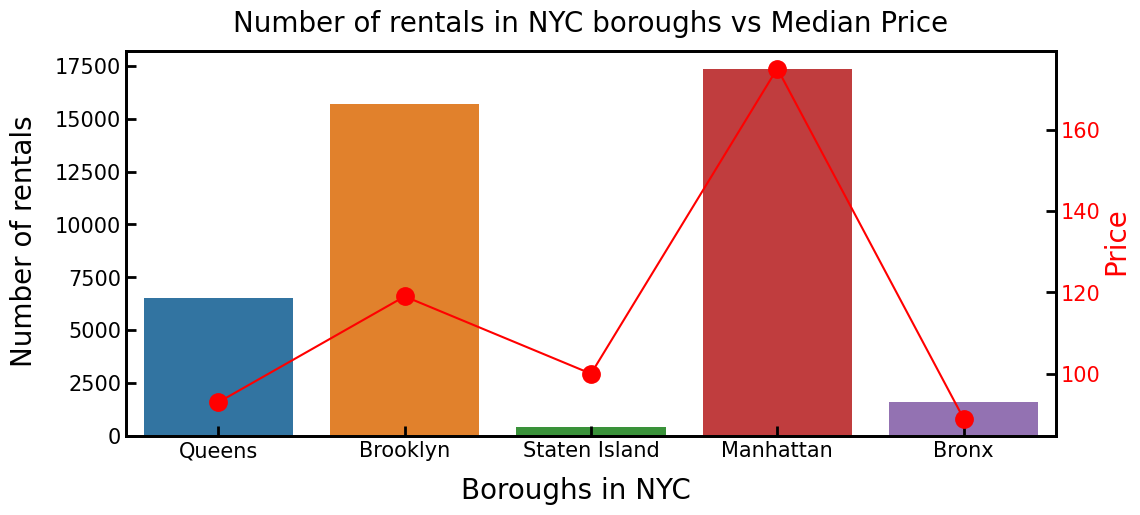

In [1529]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = temp_merged['neighbourhood_group_cleansed'], y = temp_merged['listing_count'], ax  =ax)
bar.set_xlabel("")
bar.set_ylabel("")

ax1 = ax.twinx()
ax1.plot(temp_merged['neighbourhood_group_cleansed'], temp_merged['median_price'], color = 'red', marker = 'o', markersize = 12.5)


ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Number of rentals in NYC boroughs vs Median Price',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)

plt.xticks(rotation = 90)
ax.margins(x=0.02)

# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black') 
ax1.spines['right'].set_color('black')
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_color('black')
ax1.spines['left'].set_lw(2) 
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=7)
ax1.tick_params(which = 'both', direction = 'in')
ax1.margins(x=0.02)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15, labelcolor = 'red')

fig.text(0.95, 0.5, 'Price', ha='center', va='center', rotation = 'vertical', color = 'red', fontsize = 20)
fig.text(0.04, 0.5, 'Number of rentals', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, 0., 'Boroughs in NYC', ha='center', va='center', rotation = 'horizontal', color = 'black', fontsize = 20)

plt.savefig('NumberofRentalsinBoroughs_vs_medianPrice.jpg',  bbox_inches='tight', dpi = 500)


We can clearly see that rentals tend to be higher in Manhattan and brooklyn as compared to other boroughs. So, visiting tourists should be more careful if they choose to go to these boroughs should they have a tight budget.

<b> This column is very important for modelling purpose. The question is, which of the two neighbourhood columns do we use. This column has only 5 unique values as compared to 233 unique values in the other column. Lets do additional analysis to ensure that.

In [1530]:
df.select(countDistinct('neighbourhood_cleansed')).show()

+--------------------------------------+
|count(DISTINCT neighbourhood_cleansed)|
+--------------------------------------+
|                                   223|
+--------------------------------------+



In [1531]:
features_for_modelling.append('neighbourhood_group_cleansed')

In [1532]:
columns_that_are_dropped.append('neighbourhood_cleansed')
df = df.drop('neighbourhood_cleansed')

## `latitude and Longitude` columns

<b> This section is processed using GeoPandas library to create the GIS plot. PySpark does not offer such functions, which is why GeoPandas library was used.

In [402]:
gis_df['price_outlier_removed'] = df['price_outlier_removed']

In [534]:
''' geopandas library has been used to create the geospatial heatmap '''

nyc_boroughs = gpd.read_file(gpd.datasets.get_path('nybb'))
nyc_boroughs = nyc_boroughs.set_geometry('geometry')
nyc_boroughs = nyc_boroughs.to_crs('EPSG:4326')
nyc_boroughs

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
1  MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...  
2  MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...

In [535]:
from matplotlib import rc, rcParams
rc('font', weight='bold')

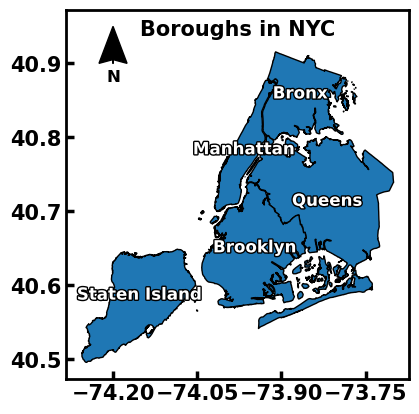

In [536]:
ax = plt.subplot()
plot1 = nyc_boroughs.plot(ax = ax, edgecolor = 'black')
nyc_boroughs.apply(lambda x: ax.annotate(text=x['BoroName'], xy=x.geometry.centroid.coords[0],ha='center', fontsize = 12
                                      ,color = 'white',fontweight='bold', alpha = 1, \
                                             path_effects=[pe.withStroke(linewidth=2, foreground="black")]), axis=1);

ax.text(x=-74.2125, y=40.875, s='N', fontsize=12)
ax.arrow(-74.2, 40.9, 0, 0.,  length_includes_head=False,
  head_width=0.05, head_length=0.05, overhang= 0.1, facecolor='k')

plt.text(0.5, 0.93, 'Boroughs in NYC',
        horizontalalignment='center',
        fontsize=15, fontweight = 'bold', 
        
        transform = ax.transAxes)
    
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)

# ax.tick_params(labelsize=40)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2.5)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=8)
ax.tick_params(which = 'both', direction = 'in')

ax.yaxis.set_major_locator(plt.MaxNLocator(6))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))


In [537]:
median_price_with_respect_to_boroughs = gis_df.groupby('neighbourhood_group_cleansed').agg({'price':['mean', 'median']}).reset_index()
median_price_with_respect_to_boroughs.columns = ['neighbourhood_group_cleansed', 'mean_price', 'median_price']
median_price_with_respect_to_boroughs.rename(columns = {'neighbourhood_group_cleansed': 'BoroName',\
                                                       }, inplace =  True)
median_price_with_respect_to_boroughs

BoroName  mean_price  median_price
0          Bronx  180.816635          89.0
1       Brooklyn  171.943069         119.0
2      Manhattan  301.227417         175.0
3         Queens  135.656387          93.0
4  Staten Island  320.343201         100.0

In [538]:
nyc_boroughs = nyc_boroughs.merge(median_price_with_respect_to_boroughs, how = 'inner', on = 'BoroName');nyc_boroughs

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  mean_price  median_price  
0  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  320.343201         100.0  
1  MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...  135.656387          93.0  
2  MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...  171.943069         119.0  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  301.227417         175.0  
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  180.816635          89.0

In [560]:
# nyc_boroughs.to_file("nyc_boroughs.shp")

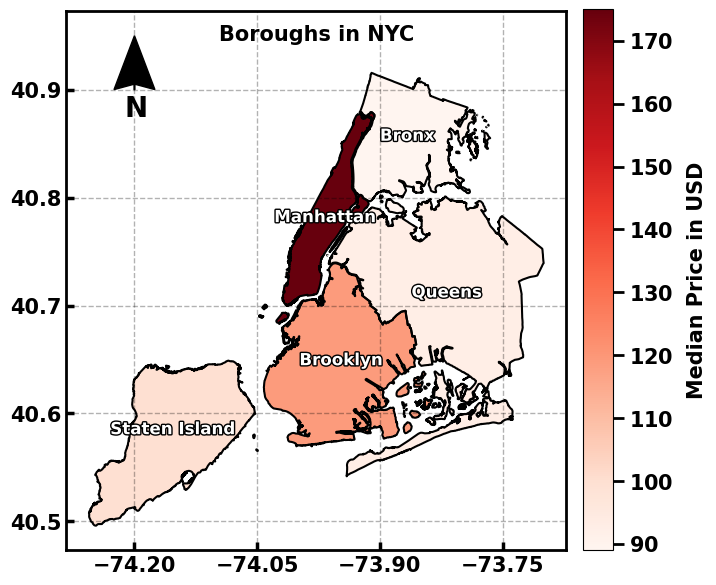

In [573]:
alpha = 1
cmap = 'Reds'
vmin = nyc_boroughs.median_price.min()
vmax = nyc_boroughs.median_price.max()

fig, axes = plt.subplots(1,1,figsize=(15, 7), constrained_layout=False)
plt.rcParams.update({'font.size': 15}) # legend ko title ko size


ax = plt.subplot(1,1,1)

grids = ax.grid(True, which = 'major', alpha = 0.3, linestyle='--', linewidth = 1, color = 'black')

plot1 = nyc_boroughs.geometry.boundary.plot(ax = ax, edgecolor = 'black')
nyc_boroughs.apply(lambda x: ax.annotate(text=x['BoroName'], xy=x.geometry.centroid.coords[0],ha='center', fontsize = 12
                                      ,color = 'white',fontweight='bold', alpha = 1, \
                                             path_effects=[pe.withStroke(linewidth=2, foreground="black")]), axis=1);

heatmap = nyc_boroughs.plot(ax= ax, column = 'median_price', cmap = cmap,linewidth = 0,alpha = alpha, edgecolor = 'black',legend = False, 
                   missing_kwds = dict(color='grey', label='No Data'),
                    markersize = 10, vmin =  vmin, vmax = vmax)

                            

ax.text(x=-74.2125, y=40.875, s='N', fontsize=20)
ax.arrow(-74.2, 40.9, 0, 0.,  length_includes_head=False,
  head_width=0.05, head_length=0.05, overhang= 0.1, facecolor='k')

plt.text(0.5, 0.945, 'Boroughs in NYC',
        horizontalalignment='center',
        fontsize=15, fontweight = 'bold', 
        
        transform = ax.transAxes)
    
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)

# ax.tick_params(labelsize=40)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2.5)
ax.tick_params(which='major', length=6)
ax.tick_params(which='minor', length=8)
ax.tick_params(which = 'both', direction = 'in')

ax.yaxis.set_major_locator(plt.MaxNLocator(6))
ax.xaxis.set_major_locator(plt.MaxNLocator(5))


cax = plt.axes([0.69, 0.11, 0.02, 0.7725])
sm = plt.cm.ScalarMappable(cmap= cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, cax=cax,orientation='vertical')#, extend='both')
cbar.set_label('Median Price in USD', fontsize = 15, labelpad = 10, fontweight = 'bold')
cbar.ax.tick_params(length=8, width=2, which="major",  direction = 'out', labelright=True)
cbar.set_alpha(alpha)
cbar.draw_all()
cbar.formatter.set_useMathText(True)
t = cbar.ax.yaxis.get_offset_text()
t.set_size(10)



<b> Latitude and Longitudes contain the geolocation of each rental. We will use those columns to create beautiful heatmaps. But, for now, we will proceed to drop these columns as they don't help us to create out model.

In [1533]:
columns_that_are_dropped.append('latitude')
df = df.drop('latitude')

columns_that_are_dropped.append('longitude')
df = df.drop('longitude')

## `property_type` vs `Price`

In [1534]:
df.select(countDistinct('property_type')).show()

+-----------------------------+
|count(DISTINCT property_type)|
+-----------------------------+
|                           80|
+-----------------------------+



In [1535]:
temp = df.select('property_type').distinct()
temp.show()

+--------------------+
|       property_type|
+--------------------+
|Private room in l...|
|Private room in loft|
|Private room in e...|
|  Entire rental unit|
|Private room in m...|
|         Shared room|
|Private room in c...|
|Room in boutique ...|
|Private room in r...|
|Room in bed and b...|
|Private room in c...|
|   Entire guesthouse|
|Private room in b...|
|  Entire guest suite|
|Private room in home|
|        Entire place|
|               Floor|
|Shared room in bu...|
|           Camper/RV|
|Private room in barn|
+--------------------+
only showing top 20 rows



Since there are too many unique values in this column, we need to group them in specific categories.
One way to approach this is to create a mapping of the unique values to the desired categories using a dictionary, and then use the "map()" method from pandas to apply the mapping to the "property_type" column.

In [1536]:
mapping = {
'Entire rental unit': 'Apartment',
'Private room in rental unit': 'Apartment',
'Private room in condo': 'Apartment',
'Entire guest suite': 'Apartment',
'Private room in loft': 'Apartment',
'Entire loft': 'Apartment',
'Private room in townhouse': 'House',
'Private room in home': 'House',
'Entire condo': 'Apartment',
'Entire home': 'House',
'Entire townhouse': 'House',
'Room in boutique hotel': 'Hotel',
'Entire serviced apartment': 'Apartment',
'Private room in bed and breakfast': 'Bed & Breakfast',
'Entire guesthouse': 'Guesthouse',
'Private room in guest suite': 'Apartment',
'Shared room in loft': 'Apartment',
'Shared room in rental unit': 'Apartment',
'Private room in houseboat': 'Other',
'Shared room in home': 'House',
'Private room': 'Other',
'Entire place': 'Other',
'Private room in guesthouse': 'Guesthouse',
'Boat': 'Other',
'Room in aparthotel': 'Hotel',
'Room in serviced apartment': 'Hotel',
'Entire cottage': 'House',
'Private room in religious building': 'Other',
'Private room in serviced apartment': 'Hotel',
'Cave': 'Other',
'Tiny home': 'Other',
'Entire bungalow': 'House',
'Shared room in condo': 'Apartment',
'Floor': 'Other',
'Room in hotel': 'Hotel',
'Private room in hostel': 'Hostel',
'Shared room in townhouse': 'House',
'Houseboat': 'Other',
'Private room in bungalow': 'House',
'Private room in resort': 'Other',
'Entire villa': 'House',
'Shared room in guest suite': 'Apartment',
'Private room in villa': 'House',
'Shared room in floor': 'Other',
'Private room in floor': 'Other',
'Entire bed and breakfast': 'Bed & Breakfast',
'Entire home/apt': 'House',
'Private room in casa particular': 'Other',
'Private room in tent': 'Other',
'Private room in in-law': 'Other',
'Room in resort': 'Hotel',
'Shared room in guesthouse': 'Guesthouse',
'Shared room in bed and breakfast': 'Bed & Breakfast',
'Private room in farm stay': 'Other',
'Private room in dorm': 'Other',
'Private room in tiny home': 'Other',
'Room in bed and breakfast': 'Bed & Breakfast',
'Private room in vacation home': 'House',
'Shared room in serviced apartment': 'Hotel',
'Shared room in bungalow': 'House',
'Private room in earthen home': 'Other',
'Private room in barn': 'Other',
'Private room in cottage': 'House',
'Entire cabin': 'House',
'Campsite': 'Other',
'Entire chalet': 'House',
'Earth house': 'Other',
'Shared room in casa particular': 'Other',
'Shared room in earth house': 'Other',
'Shared room in hostel': 'Hostel',
'Shared room in houseboat': 'Other',
'Shared room in villa': 'House',
'Entire vacation home': 'House',
'Casa particular': 'Other',
'Shared room':'House',  
'Shared room in vacation home': 'House',         
'Private room in train' : 'Other',                
'Private room in lighthouse': 'Other',           
'Lighthouse': 'Other',                           
'Private room in camper/rv': 'Other',            
'Private room in kezhan': 'Other',               
'Castle': 'House',                               
'Tent': 'Other',                                 
'Private room in minsu': 'Other',                
'Private room in tower': 'Other',               
'Shared room in shepherd\'s hut': 'Other'
}

In [1537]:
set(list(mapping.values()))

{'Apartment',
 'Bed & Breakfast',
 'Guesthouse',
 'Hostel',
 'Hotel',
 'House',
 'Other'}

In [1538]:
# df.property_type = df.property_type.replace(mapping)

from itertools import chain
from pyspark.sql.functions import create_map, col, lit


mapping_expr = create_map([lit(x) for x in chain(*mapping.items())])

df = df.withColumn('property_type', mapping_expr[col('property_type')])


In [1539]:
df.groupBy('property_type').count().orderBy(desc('count')).show()

+---------------+-----+
|  property_type|count|
+---------------+-----+
|      Apartment|33352|
|          House| 5776|
|          Hotel| 1812|
|          Other|  361|
|     Guesthouse|  105|
|Bed & Breakfast|   93|
|         Hostel|   18|
|           null|   16|
+---------------+-----+



In [1540]:
temp = df.groupBy(['property_type', 'neighbourhood_group_cleansed']) \
         .agg(median('price').alias('median_price'))

In [1541]:
temp.show()

+---------------+----------------------------+------------+
|  property_type|neighbourhood_group_cleansed|median_price|
+---------------+----------------------------+------------+
|Bed & Breakfast|               Staten Island|        55.0|
|           null|                      Queens|        75.0|
|          Other|                      Queens|        94.5|
|          Hotel|                      Queens|       144.0|
|      Apartment|               Staten Island|       100.0|
|     Guesthouse|                   Manhattan|       132.5|
|Bed & Breakfast|                      Queens|        75.0|
|      Apartment|                   Manhattan|       165.0|
|          Other|                       Bronx|        80.0|
|     Guesthouse|               Staten Island|       135.0|
|Bed & Breakfast|                   Manhattan|       128.0|
|          Hotel|                   Manhattan|       512.0|
|      Apartment|                       Bronx|        90.0|
|          Other|               Staten I

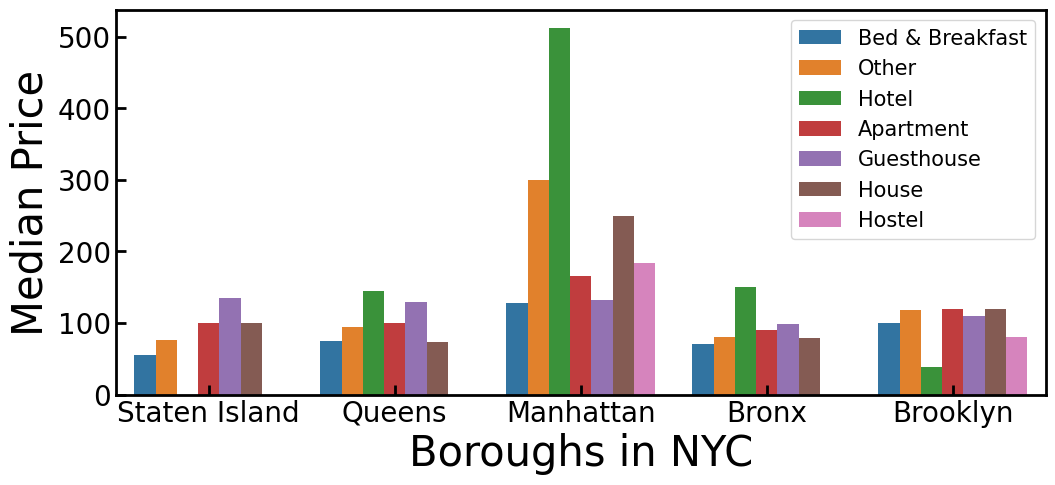

In [1542]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))

ax = plt.subplot(1, 1, 1)
sns.barplot(x = 'neighbourhood_group_cleansed', y = 'median_price', hue = 'property_type', data = temp.toPandas(), ax = ax)
plt.legend(loc = 'best', fontsize = 15)
ax.set_xlabel("Boroughs in NYC", fontsize = 30)
ax.set_ylabel("Median Price", fontsize = 30)


ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

plt.savefig('broughs_propertytype_vs_medianPrice.jpg',  bbox_inches='tight', dpi = 500)

There does not seem to be any useful analysis on this section. Regardless, The mapping we performed did not help with the analysis. There are too many unique values in this column, so we will drop this column altogether.

In [1543]:
columns_that_are_dropped.append('property_type')
df = df = df.drop('property_type')

## `room_type` vs `Price`

In [1544]:
total_rows = df.count()
result = df.groupBy('room_type').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+---------------+-----+-------------------+
|      room_type|count|         percentage|
+---------------+-----+-------------------+
|Entire home/apt|23526| 56.644114318734495|
|   Private room|17287| 41.622324416728866|
|    Shared room|  532| 1.2809091565742903|
|     Hotel room|  188|0.45265210796234323|
+---------------+-----+-------------------+



More than half of all airbnb rentals are either entire home or apartments. Similarly, very few ones are hotels respectively. Lets calculate the median and mean price for each room type.

In [1545]:

# Group by room_type and compute the median and mean of price
grouped_df = df.groupBy('room_type').agg(median('price').alias('median'), mean('price').alias('mean'))

# Rename columns
temp = grouped_df.withColumnRenamed('room_type', 'room_type').withColumnRenamed('median', 'median').withColumnRenamed('mean', 'mean')
temp.show()

+---------------+------+------------------+
|      room_type|median|              mean|
+---------------+------+------------------+
|    Shared room|  65.0|135.40037593984962|
|     Hotel room| 335.0| 416.1648936170213|
|Entire home/apt| 180.0|263.44240414860155|
|   Private room|  78.0|166.10204199687627|
+---------------+------+------------------+



Hotel rooms seem to be the most expensive. Similarly, if a person wishes to share rooms, it would tend to cost the least.

<b> Lets plot a boxplot 

Text(0, 0.5, 'Price in USD')

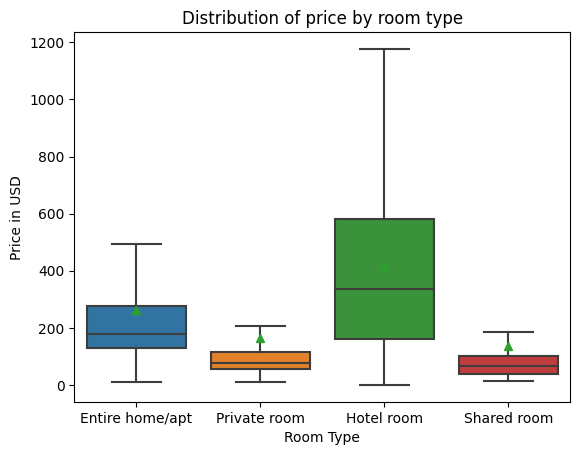

In [1546]:
sns.boxplot(x='room_type', y='price', data = df.toPandas(), showfliers = False, showmeans = True,
)
plt.title('Distribution of price by room type')
plt.xlabel("Room Type")
plt.ylabel("Price in USD")

Here we can see the distribution of prices of properties, based on which neighbourhood group they belong to. We can see that Manhattan sems to have more of the higher priced properties. Bronx, Staten Island, and Queens have much more reasonable prices compared to Brooklyn and Manhattan. All distributions have positive skew.

We can clearly see that Hostel rooms tend to be more expensive than other types of rooms. Similarly, shared rooms are pretty cheap as well. Lets look at the room type price with respect to boroughs.


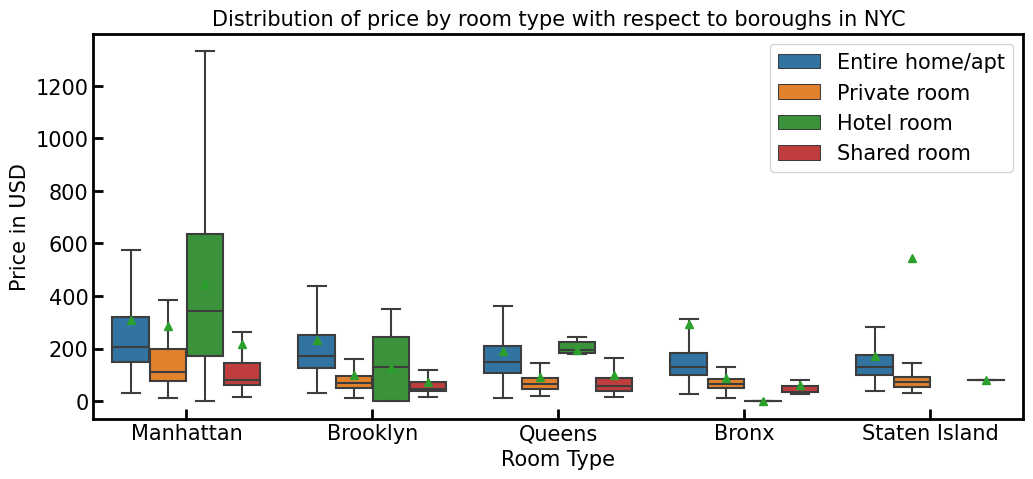

In [1547]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))

ax = plt.subplot(1, 1, 1)

sns.boxplot(x='neighbourhood_group_cleansed', y='price', hue = 'room_type',data = df.toPandas(), showfliers = False, showmeans = True, ax = ax)
plt.title('Distribution of price by room type with respect to boroughs in NYC', fontsize = 15)
ax.set_xlabel("Room Type", fontsize = 15)
ax.set_ylabel("Price in USD", fontsize = 15)
plt.legend(fontsize = 15, loc = 'best')

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

plt.savefig('roomtype_vs_medianprice.jpg',  bbox_inches='tight', dpi = 500)

Hotels in Manhatan seem to have the most expensive price. Similarly, the mean price, `indicated by a green triangle`, exceeds the median price indicating the price is extremely right skewed. It looks like every type of room is the most expensive in Manhattan respectively.

We will keep this column for modelling purposes.

In [1548]:
features_for_modelling.append('room_type')

## `accommodates` vs `Price`

In [1549]:
data_dictionary['accommodates']

'The maximum number of guests the Airbnb listing can accommodate.'

In [1550]:
df.select('accommodates').show()

+------------+
|accommodates|
+------------+
|           1|
|           1|
|           4|
|           2|
|           3|
|           2|
|           1|
|           1|
|           4|
|           2|
|           5|
|           4|
|           2|
|           2|
|           2|
|           2|
|           2|
|           1|
|           2|
|           4|
+------------+
only showing top 20 rows



Lets  convert the values into integers. But, lets check if there are any null values.

In [1551]:
df.filter(df.accommodates.isNull()).count()

0

In [1552]:
df = df.withColumn('accommodates', col('accommodates').cast('int'))

In [1553]:
total_rows = df.count()
result = df.groupBy('accommodates').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+------------+-----+-------------------+
|accommodates|count|         percentage|
+------------+-----+-------------------+
|           2|18556| 44.677726145474686|
|           4| 6621|  15.94154046180146|
|           1| 6432| 15.486480629860594|
|           3| 4006|  9.645342257963547|
|           6| 2176|   5.23920737726627|
|           5| 1705|  4.105169383381889|
|           8|  738| 1.7769002961500493|
|           7|  446| 1.0738448944213035|
|          10|  251| 0.6043387186092987|
|          16|  205| 0.4935834155972359|
|          12|  164| 0.3948667324777887|
|           9|  102|0.24558784580935641|
|          15|   37|0.08908578720535477|
|          11|   32|0.07704716731273926|
|          14|   28|0.06741627139864685|
|          13|   18|0.04333903161341584|
|           0|   16|0.03852358365636963|
+------------+-----+-------------------+



Almost all of the rentals offer at least 1 accomodates. Similarly, almost 45 % of the rentals allow up to 2 accomodates. Let's check how the price varies with respect to accomodates.

In [1554]:
from pyspark.sql.functions import mean, median, asc

# Group by accommodates and compute the median and mean of price
grouped_df = df.groupBy('accommodates').agg(median('price').alias('median'), mean('price').alias('mean'))

# Rename columns
temp = grouped_df.withColumnRenamed('accommodates', 'accommodates').withColumnRenamed('median', 'median').withColumnRenamed('mean', 'mean')

# Sort by accommodates
temp = temp.sort('accommodates', ascending=True)

temp.show(5)

+------------+------+------------------+
|accommodates|median|              mean|
+------------+------+------------------+
|           0|   0.0|               0.0|
|           1|  65.0|101.24891169154229|
|           2| 110.0| 175.2796938995473|
|           3| 150.0|181.44982526210683|
|           4| 181.0|269.88204198761514|
+------------+------+------------------+
only showing top 5 rows



Text(0.5, 1.0, 'Number  of accommodates vs rental price')

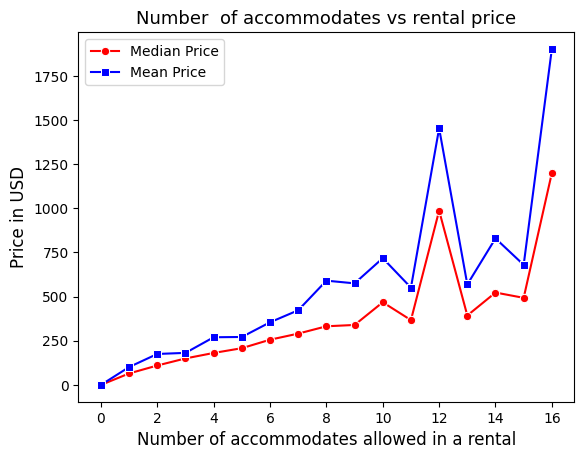

In [1555]:
ax = plt.subplot()
plot1 = sns.lineplot(x = 'accommodates', y = 'median', data = temp.toPandas(), color = 'red', marker = 'o', label = 'Median Price', ax = ax)
plot2 = sns.lineplot(x = 'accommodates', y = 'mean', data = temp.toPandas(), color = 'blue', marker = 's', label = 'Mean Price', ax =ax)
plt.xlabel("Number of accommodates allowed in a rental", fontsize = 12)
plt.ylabel("Price in USD", fontsize = 12)
plt.title("Number  of accommodates vs rental price", fontsize = 13)

In [1556]:
# Group by accommodates and compute the median and mean of price_outlier_removed
grouped_df = df.groupBy('accommodates').agg(median('price_outlier_removed').alias('median'), mean('price_outlier_removed').alias('mean'))

# Rename columns
temp = grouped_df.withColumnRenamed('accommodates', 'accommodates').withColumnRenamed('median', 'median').withColumnRenamed('mean', 'mean')

# Sort by accommodates
temp = temp.sort('accommodates', ascending=True)
temp.show()

+------------+------+------------------+
|accommodates|median|              mean|
+------------+------+------------------+
|           0|   0.0|               0.0|
|           1|  65.0|  80.9043065920398|
|           2| 110.0|142.30054968743264|
|           3| 150.0| 172.2881927109336|
|           4| 181.0|212.43845340582993|
|           5| 208.0|233.89882697947215|
|           6| 256.0|269.48552389705884|
|           7| 290.5|291.68497757847535|
|           8| 332.0| 314.8577235772358|
|           9| 339.5|312.88235294117646|
|          10| 416.5|349.69322709163345|
|          11| 367.0|        330.265625|
|          12| 416.5| 380.5182926829268|
|          13| 393.0|372.05555555555554|
|          14| 416.5| 363.7857142857143|
|          15| 416.5|358.22972972972974|
|          16| 416.5|398.45853658536583|
+------------+------+------------------+



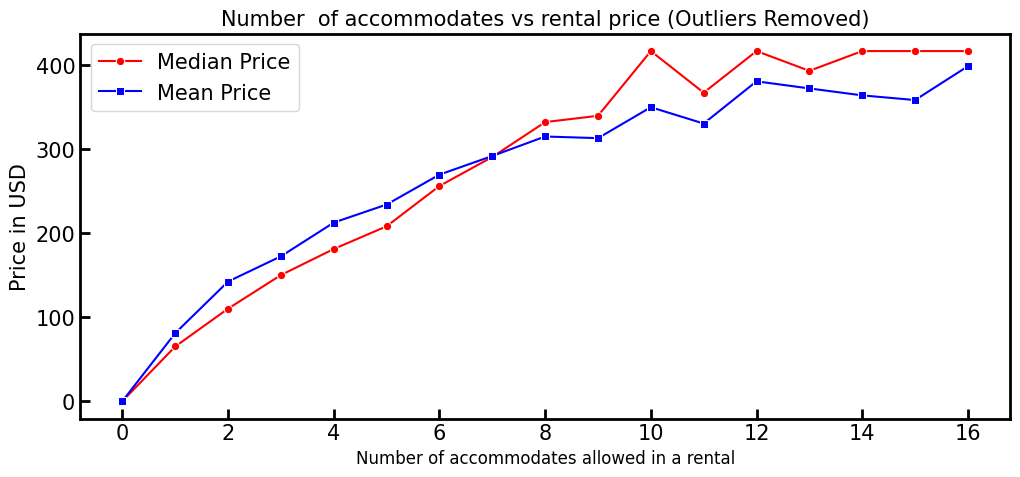

In [1557]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))

ax = plt.subplot(1, 1, 1)
plot1 = sns.lineplot(x = 'accommodates', y = 'median', data = temp.toPandas(), color = 'red', marker = 'o', label = 'Median Price', ax = ax)
plot2 = sns.lineplot(x = 'accommodates', y = 'mean', data = temp.toPandas(), color = 'blue', marker = 's', label = 'Mean Price', ax =ax)
plt.xlabel("Number of accommodates allowed in a rental", fontsize = 12)
plt.ylabel("Price in USD", fontsize = 15)
plt.title("Number  of accommodates vs rental price (Outliers Removed)", fontsize = 15)

plt.legend(fontsize = 15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

plt.savefig('numberofAccomoddates_vs_Price.jpg',  bbox_inches='tight', dpi = 500)

It can be clearly seen that the price increases as the number of accommodates are allowed in the rental. This column will be very useful for us. So, we will keep this column for modelling purpose.

In [1558]:
features_for_modelling.append('accommodates')

# `bathrooms_text` vs `Price`

In [1559]:
total_rows = df.count()
result = df.groupBy('bathrooms_text').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+----------------+-----+--------------------+
|  bathrooms_text|count|          percentage|
+----------------+-----+--------------------+
|          1 bath|21760|  52.392073772662705|
|   1 shared bath| 9589|  23.087665230058025|
|  1 private bath| 2893|   6.965545469867335|
|         2 baths| 2729|   6.570678737389546|
|       1.5 baths| 1165|  2.8049984349794137|
|  2 shared baths| 1109|    2.67016589218212|
|1.5 shared baths|  722|  1.7383767124936798|
|       2.5 baths|  400|  0.9630895914092408|
|         3 baths|  303|  0.7295403654924999|
|  0 shared baths|  157| 0.37801266462812705|
|         4 baths|  126| 0.30337322129391087|
|       3.5 baths|  106|  0.2552187417234488|
|  3 shared baths|   95| 0.22873377795969468|
|2.5 shared baths|   82| 0.19743336623889435|
|            null|   77| 0.18539474634627887|
|         0 baths|   57| 0.13724026677581683|
|       Half-bath|   40| 0.09630895914092409|
|       4.5 baths|   36| 0.08667806322683168|
|Shared half-bath|   17|0.04093130

It looks like majority of rentals had only 1 bath. Similarly, there are less thab 0.002 % of rentals offering 8 bathrooms. Perhaps there is a pattern in the price with respect to number of bathrooms that a rental has to offer. Lets look into it.

In [1560]:
# Group by bathrooms_text and compute the median and mean of price
grouped_df = df.groupBy('bathrooms_text').agg(median('price').alias('median'), mean('price').alias('mean'))

# Rename columns
temp = grouped_df.withColumnRenamed('bathrooms_text', 'bathrooms_text').withColumnRenamed('median', 'median').withColumnRenamed('mean', 'mean')
temp = temp.withColumn('bathrooms_text', when(col('bathrooms_text').isNull(), 'Unknown').otherwise(col('bathrooms_text')))
temp = temp.orderBy(asc('bathrooms_text'))

temp.show()

+----------------+------+------------------+
|  bathrooms_text|median|              mean|
+----------------+------+------------------+
|         0 baths| 100.0|205.28070175438597|
|  0 shared baths| 102.0|108.88535031847134|
|          1 bath| 158.0| 213.2731617647059|
|  1 private bath| 124.0|240.04666436225372|
|   1 shared bath|  70.0| 107.2251538220878|
|       1.5 baths| 195.0| 250.0360515021459|
|1.5 shared baths|  70.0|101.49168975069252|
|      15.5 baths|2029.0|            2029.0|
|         2 baths| 295.0|436.58446317332357|
|  2 shared baths|  62.0|  94.5473399458972|
|       2.5 baths| 402.0|           558.155|
|2.5 shared baths|  55.5| 64.17073170731707|
|         3 baths| 800.0|1243.6006600660066|
|  3 shared baths|  67.0| 73.38947368421053|
|       3.5 baths| 807.5|1077.4056603773586|
|3.5 shared baths|1087.5|            1087.5|
|         4 baths|2000.0|  2115.15873015873|
|  4 shared baths|  60.5|210.71428571428572|
|       4.5 baths|1028.0|1467.9166666666667|
|4.5 share

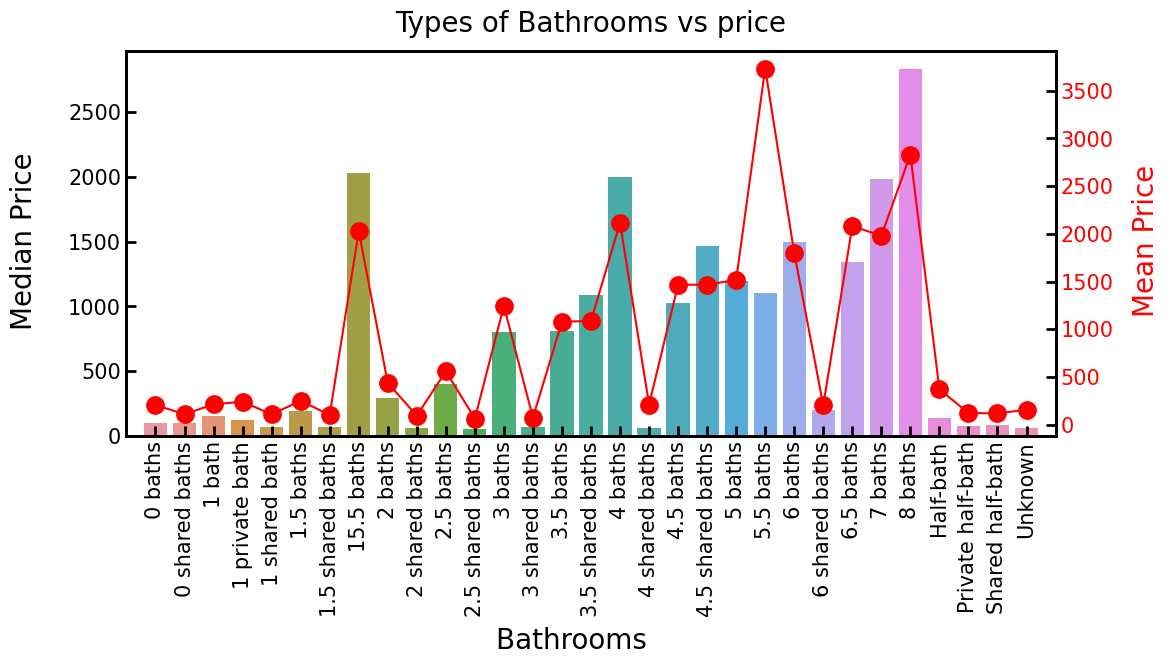

In [1561]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = 'bathrooms_text', y = 'median', data = temp.toPandas(),ax  =ax)
bar.set_xlabel("")
bar.set_ylabel("")
plt.xticks(rotation = 90)
ax.margins(x=0.02)

ax1 = ax.twinx()
ax1.plot(temp.toPandas()['bathrooms_text'].values,\
          temp.toPandas()['mean'].values, color = 'red', marker = 'o', markersize = 12.5)


ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Types of Bathrooms vs price',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)



# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black') 
ax1.spines['right'].set_color('black')
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_color('black')
ax1.spines['left'].set_lw(2) 
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=7)
ax1.tick_params(which = 'both', direction = 'in')
ax1.margins(x=0.02)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15, labelcolor = 'red')

fig.text(0.975, 0.5, 'Mean Price', ha='center', va='center', rotation = 'vertical', color = 'red', fontsize = 20)
fig.text(0.04, 0.5, 'Median Price', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, -0.3, 'Bathrooms ', ha='center', va='center', rotation = 'horizontal', color = 'black', fontsize = 20)

plt.savefig('typesOfBathrooms_vs_price.jpg',  bbox_inches='tight', dpi = 500)


It can be clearly seen that shared bathrooms tend to have very low price as compared to other types of bathrooms. Simialarly, rentals offering number of private bathrooms ranging from 4 to 8 tend to have very high price as compared to other types of bathrooms respectively. This column will be very important for us but we need to group these bathrooms togethere in some form.

Since more than half of rentals have only 1 bath, We will proceed to fill null values using that value.

In [1562]:
df = df.withColumn('bathrooms_text', when(col('bathrooms_text').isNull(), '1 bath').otherwise(col('bathrooms_text')))

In [1563]:
df.filter(df.bathrooms_text.isNull()).count()

0

Lets check if the original relationship has changed or not after filling null values.

In [1564]:
temp = df.groupBy('bathrooms_text') \
         .agg(median('price').alias('median'), mean('price').alias('mean')) \
         .withColumnRenamed('bathrooms_text', 'bathrooms_text') \
         .withColumnRenamed('median', 'median') \
         .withColumnRenamed('mean', 'mean') \
         .orderBy('bathrooms_text')
temp.show()

+----------------+------+------------------+
|  bathrooms_text|median|              mean|
+----------------+------+------------------+
|         0 baths| 100.0|205.28070175438597|
|  0 shared baths| 102.0|108.88535031847134|
|          1 bath| 158.0|213.07189632275495|
|  1 private bath| 124.0|240.04666436225372|
|   1 shared bath|  70.0| 107.2251538220878|
|       1.5 baths| 195.0| 250.0360515021459|
|1.5 shared baths|  70.0|101.49168975069252|
|      15.5 baths|2029.0|            2029.0|
|         2 baths| 295.0|436.58446317332357|
|  2 shared baths|  62.0|  94.5473399458972|
|       2.5 baths| 402.0|           558.155|
|2.5 shared baths|  55.5| 64.17073170731707|
|         3 baths| 800.0|1243.6006600660066|
|  3 shared baths|  67.0| 73.38947368421053|
|       3.5 baths| 807.5|1077.4056603773586|
|3.5 shared baths|1087.5|            1087.5|
|         4 baths|2000.0|  2115.15873015873|
|  4 shared baths|  60.5|210.71428571428572|
|       4.5 baths|1028.0|1467.9166666666667|
|4.5 share

Text(0.5, -0.3, 'Bathrooms ')

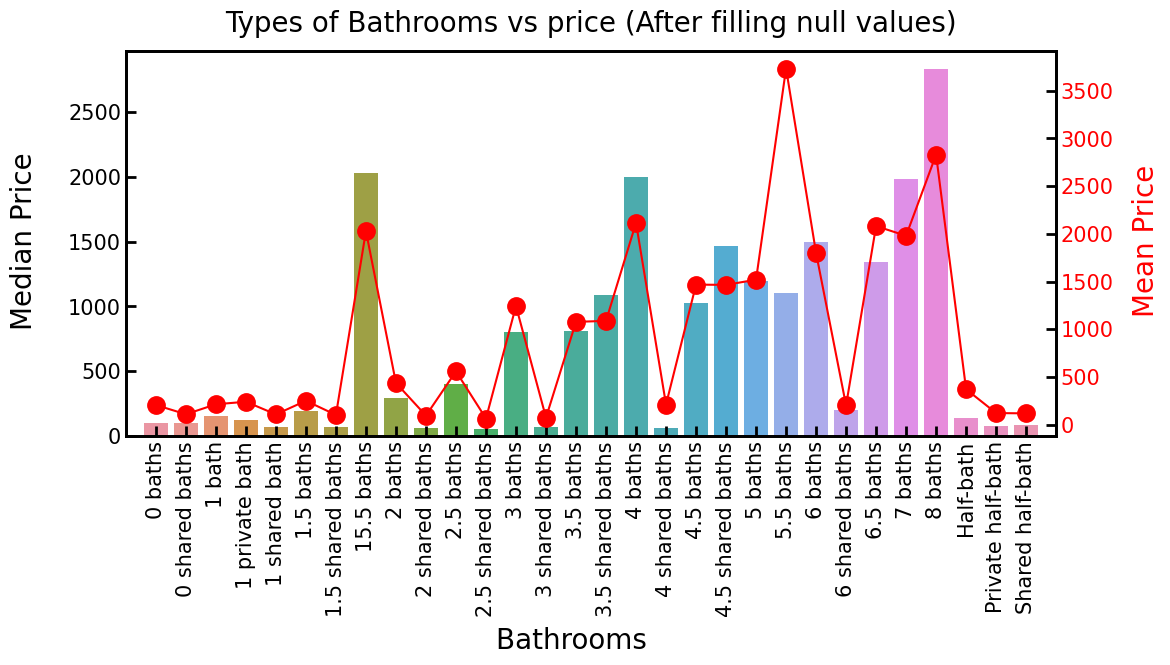

In [1565]:
fig, ax = plt.subplots(figsize=(12, 5))

bar = sns.barplot(x = temp.toPandas()['bathrooms_text'], y = temp.toPandas()['median'], ax  =ax)
bar.set_xlabel("")
bar.set_ylabel("")
plt.xticks(rotation = 90)
ax.margins(x=0.02)

ax1 = ax.twinx()
ax1.plot(temp.toPandas()['bathrooms_text'], temp.toPandas()['mean'], color = 'red', marker = 'o', markersize = 12.5)


ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Types of Bathrooms vs price (After filling null values)',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)



# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black') 
ax1.spines['right'].set_color('black')
ax1.spines['right'].set_linewidth(2)
ax1.spines['top'].set_linewidth(2)
ax1.spines['bottom'].set_linewidth(2)
ax1.spines['left'].set_color('black')
ax1.spines['left'].set_lw(2) 
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=7)
ax1.tick_params(which='minor', length=7)
ax1.tick_params(which = 'both', direction = 'in')
ax1.margins(x=0.02)
ax1.xaxis.set_tick_params(labelsize=15)
ax1.yaxis.set_tick_params(labelsize=15, labelcolor = 'red')

fig.text(0.975, 0.5, 'Mean Price', ha='center', va='center', rotation = 'vertical', color = 'red', fontsize = 20)
fig.text(0.04, 0.5, 'Median Price', ha='center', va='center', rotation='vertical', fontsize = 20)
fig.text(0.5, -0.3, 'Bathrooms ', ha='center', va='center', rotation = 'horizontal', color = 'black', fontsize = 20)


The relationship has not changed much. So, we can proceed next.

In [1566]:
# temp = df[['bathrooms_text', 'price', 'price_outlier_removed']]

<b> We need to group the values in this column. There seem to be two types of bathroom: shared and private. Shared bathrooms have lower price as compared to private columns. First, we will seperate values based on whether a particular bathroom is private or shared. Then, we will group the values into integers. Lets seperate whether a bathroom is private or shared. 

In [1567]:
from pyspark.sql.functions import col, lower, when
# df['bathroom_type'] = df['bathrooms_text'].apply(lambda x: 'shared' if 'shared' in x.lower() else 'private')
df = df.withColumn('bathroom_type', when(lower(col('bathrooms_text')).like('%shared%'), 'shared').otherwise('private'))

In [1568]:
df.select('bathroom_type').show()

+-------------+
|bathroom_type|
+-------------+
|      private|
|       shared|
|      private|
|      private|
|      private|
|      private|
|       shared|
|       shared|
|      private|
|       shared|
|      private|
|      private|
|      private|
|      private|
|       shared|
|       shared|
|       shared|
|      private|
|      private|
|      private|
+-------------+
only showing top 20 rows



In [1569]:
df.select('bathrooms_text').show()

+--------------+
|bathrooms_text|
+--------------+
|        1 bath|
| 1 shared bath|
|     1.5 baths|
|        1 bath|
|        1 bath|
|        1 bath|
| 1 shared bath|
| 1 shared bath|
|        1 bath|
| 1 shared bath|
|        1 bath|
|        1 bath|
|        1 bath|
|     1.5 baths|
| 1 shared bath|
| 1 shared bath|
| 1 shared bath|
|        1 bath|
|        1 bath|
|1 private bath|
+--------------+
only showing top 20 rows



In [1570]:
from pyspark.sql.functions import when

# Define the dictionary to map bathroom descriptions to a number of baths
bath_map = {'1 bath': 1,
            '1 shared bath': 1,
            '1 private bath': 1,
            '2 baths': 2,
            '1.5 baths': 1.5,
            '2 shared baths': 2,
            '1.5 shared baths': 1.5,
            '2.5 baths': 2.5,
            '3 baths': 3,
            '0 shared baths': 1,
            '4 baths': 4,
            '3.5 baths': 3.5,
            '3 shared baths': 3,
            '2.5 shared baths': 2.5,
            '0 baths': 1,
            'Half-bath': 0.5,
            '4.5 baths': 4.5,
            'Shared half-bath': 0.5,
            '5 baths': 5,
            '4 shared baths': 4,
            'private half-bath': 0.5,
            '6 baths': 6,
            '5.5 baths': 5.5,
            '6.5 baths': 6.5,
            '3.5 shared baths': 3.5,
            '4.5 shared baths': 4.5,
            '6 shared baths': 6,
            '15.5 baths': 15.5,
            '7 baths': 7,
            '8 baths': 8}

In [1571]:
from itertools import chain
from pyspark.sql.functions import create_map, col, lit


mapping_expr = create_map([lit(x) for x in chain(*bath_map.items())])

df = df.withColumn('baths', mapping_expr[col('bathrooms_text')])

In [1572]:
temp = df.select('bathroom_type', 'baths', 'price', 'price_outlier_removed')

In [1573]:
temp.show()

+-------------+-----+-----+---------------------+
|bathroom_type|baths|price|price_outlier_removed|
+-------------+-----+-----+---------------------+
|      private|  1.0|175.0|                175.0|
|       shared|  1.0| 75.0|                 75.0|
|      private|  1.5|275.0|                275.0|
|      private|  1.0| 60.0|                 60.0|
|      private|  1.0| 68.0|                 68.0|
|      private|  1.0| 68.0|                 68.0|
|       shared|  1.0| 62.0|                 62.0|
|       shared|  1.0| 65.0|                 65.0|
|      private|  1.0|220.0|                220.0|
|       shared|  1.0| 95.0|                 95.0|
|      private|  1.0|150.0|                150.0|
|      private|  1.0|395.0|                395.0|
|      private|  1.0|175.0|                175.0|
|      private|  1.5|124.0|                124.0|
|       shared|  1.0|124.0|                124.0|
|       shared|  1.0| 55.0|                 55.0|
|       shared|  1.0| 80.0|                 80.0|


In [1574]:
''' We don't need the original column `bathrooms_text`. So, we will drop this column '''
df = df.drop('bathrooms_text')

In [1575]:
df.select('bathroom_type').show()

+-------------+
|bathroom_type|
+-------------+
|      private|
|       shared|
|      private|
|      private|
|      private|
|      private|
|       shared|
|       shared|
|      private|
|       shared|
|      private|
|      private|
|      private|
|      private|
|       shared|
|       shared|
|       shared|
|      private|
|      private|
|      private|
+-------------+
only showing top 20 rows



In [1576]:
bathroom_groups = temp.groupBy(['bathroom_type', 'baths']).agg(median('price').alias('price'))
bathroom_groups = bathroom_groups.orderBy('baths')

In [1577]:
bathroom_groups.show()

+-------------+-----+------+
|bathroom_type|baths| price|
+-------------+-----+------+
|      private| null|  74.0|
|       shared|  0.5|  85.0|
|      private|  0.5| 139.5|
|       shared|  1.0|  70.0|
|      private|  1.0| 153.0|
|      private|  1.5| 195.0|
|       shared|  1.5|  70.0|
|       shared|  2.0|  62.0|
|      private|  2.0| 295.0|
|      private|  2.5| 402.0|
|       shared|  2.5|  55.5|
|       shared|  3.0|  67.0|
|      private|  3.0| 800.0|
|      private|  3.5| 807.5|
|       shared|  3.5|1087.5|
|       shared|  4.0|  60.5|
|      private|  4.0|2000.0|
|       shared|  4.5|1465.0|
|      private|  4.5|1028.0|
|      private|  5.0|1196.0|
+-------------+-----+------+
only showing top 20 rows



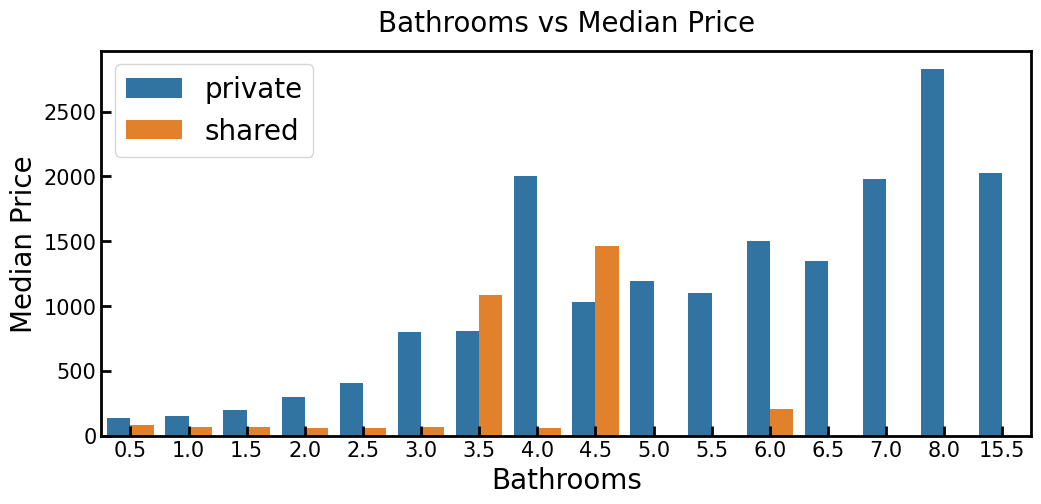

In [1578]:
fig, ax = plt.subplots(figsize=(12, 5))
# private = bathroom_groups[bathroom_groups.bathroom_type == 'private
sns.barplot(x = 'baths', y = 'price', hue = 'bathroom_type', data = bathroom_groups.toPandas(), ax = ax)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

plt.text(0.5, 1.05, 'Bathrooms vs Median Price',
        horizontalalignment='center',
        fontsize=20,
        transform = ax.transAxes)



# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

plt.legend(loc = 'best', fontsize = 20)
plt.xlabel("Bathrooms", fontsize = 20
          )
plt.ylabel("Median Price", fontsize = 20)

plt.savefig('sharedandprivate_baths_vs_MedianPrice.jpg',  bbox_inches='tight', dpi = 500)


Now it is clear that as the number of bathrooms offered by a rental increases, the price also increases respectively. So, this column will be very useful for modelling purpose. We will keep these columns for modelling.

In [1579]:
features_for_modelling.append('bathroom_type')
features_for_modelling.append('baths')

## `Number of Beds vs Price`

In [1580]:
total_rows = df.count()
result = df.groupBy('beds').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+----+-----+--------------------+
|beds|count|          percentage|
+----+-----+--------------------+
| 1.0|25557|  61.534201719114925|
| 2.0| 8894|   21.41429706498447|
| 3.0| 3486|   8.393325789131534|
| 4.0| 1528|  3.6790022391833004|
|null|  941|  2.2656682637902392|
| 5.0|  538|   1.295355500445429|
| 6.0|  307|  0.7391712614065924|
| 7.0|  101| 0.24318012183083332|
| 8.0|   94| 0.22632605398117162|
| 9.0|   34| 0.08186261526978547|
|10.0|   20|0.048154479570462046|
|12.0|   12|0.028892687742277226|
|11.0|   11|0.026484963763754123|
|14.0|    3|0.007223171935569...|
|16.0|    2|0.004815447957046204|
|42.0|    1|0.002407723978523102|
|18.0|    1|0.002407723978523102|
|21.0|    1|0.002407723978523102|
|17.0|    1|0.002407723978523102|
|13.0|    1|0.002407723978523102|
+----+-----+--------------------+



Let's check the number of null values respectively.

In [1581]:
df.filter(df.beds.isNull()).count()

941

Almost 90 % of all rentals offer 3 or less than 3 beds. Similarly, there are few rentals that offer more than 10 beds. Perhaps there is some relationships between number of beds offered and the price of a rental. We will also explore the relationship. 

In [1582]:
from pyspark.sql.functions import median, mean

# Filter out rows with missing values
temp = df.select(['beds', 'price']).dropna()

# Convert 'beds' column to integer type
temp = temp.withColumn('beds', temp['beds'].cast('integer'))

# Group by 'beds' and calculate median and mean of 'price'
temp = temp.groupBy('beds').agg(median('price').alias('median'), mean('price').alias('mean'))

In [1583]:
temp.show()

+----+------+------------------+
|beds|median|              mean|
+----+------+------------------+
|  12| 733.5|            909.25|
|   1| 100.0|166.79700277810386|
|  13| 850.0|             850.0|
|   6| 490.0| 962.6449511400651|
|  16|3375.0|            3375.0|
|   3| 210.0| 308.5935169248422|
|   5| 290.5|467.70260223048325|
|   9| 471.0| 596.5294117647059|
|  17|3500.0|            3500.0|
|   4| 269.0|455.20157068062827|
|   8|1170.5| 2113.446808510638|
|   7| 400.0| 602.8613861386139|
|  10| 753.5|            1357.5|
|  21|  66.0|              66.0|
|  11| 670.0| 989.2727272727273|
|  14| 879.0| 796.3333333333334|
|  42|2029.0|            2029.0|
|   2| 166.0| 237.9779626714639|
|  18|1100.0|            1100.0|
+----+------+------------------+



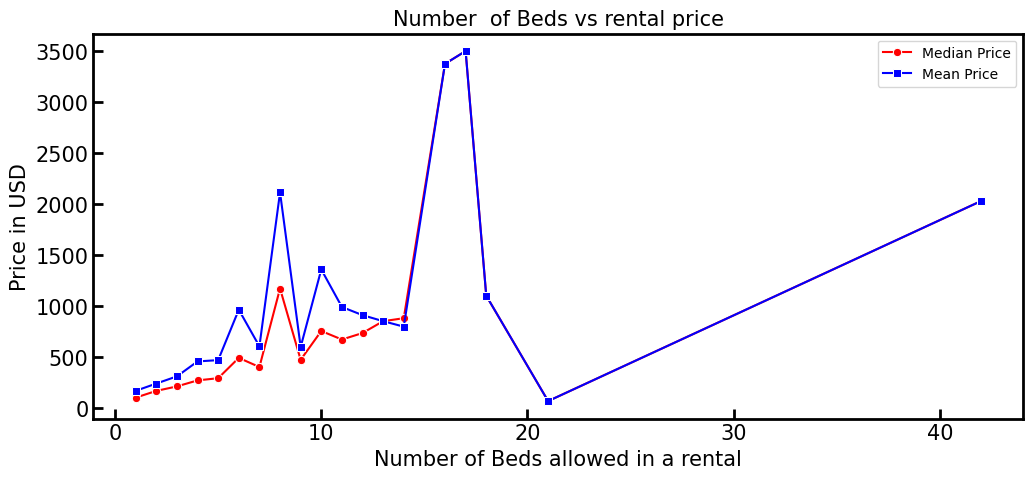

In [1584]:
fig, ax = plt.subplots(figsize=(12, 5))
plot1 = sns.lineplot(x = 'beds', y = 'median', data = temp.toPandas(), \
                     color = 'red', marker = 'o', label = 'Median Price', ax = ax)
plot2 = sns.lineplot(x = 'beds', y = 'mean', data = temp.toPandas(),\
                      color = 'blue', marker = 's', label = 'Mean Price', ax =ax)
plt.xlabel("Number of Beds allowed in a rental", fontsize = 15)
plt.ylabel("Price in USD", fontsize = 15)
plt.title("Number  of Beds vs rental price", fontsize = 15)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

plt.savefig('number_of_beds_vs_rental_proce.jpg',  bbox_inches='tight', dpi = 500)

It looks like after about 14 beds, there are only 1 rentals offering more than 14 beds, which is why the median and mean are equal.

Nevertheless, the price of rentals definately is higher for rentals offering more number of beds.

<b> Lets fill null values with 1 as almost 62 % of rentals offer single bed.

Text(0.5, 1.0, 'Number  of Beds vs rental price (Filling null with 1s)')

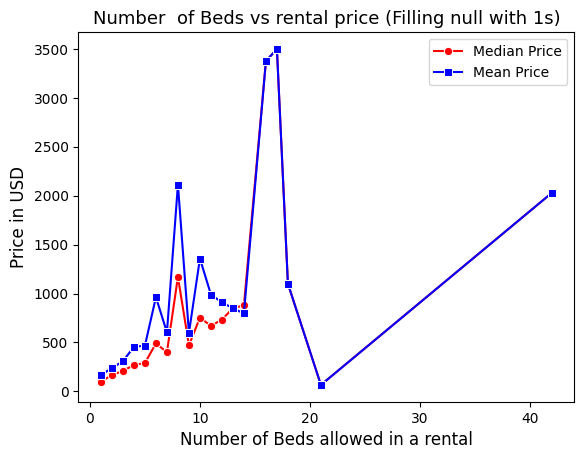

In [1585]:
temp = df.select(['beds', 'price'])
temp = temp.na.fill({'beds': 1})
temp = temp.withColumn('beds', col('beds').cast('integer'))

temp = temp.groupBy('beds').agg(median('price').alias('median'), mean('price').alias('mean'))
temp = temp.select(col('beds'), col('median'), col('mean'))

ax = plt.subplot()
plot1 = sns.lineplot(x = 'beds', y = 'median', data = temp.toPandas(), color = 'red',\
                      marker = 'o', label = 'Median Price', ax = ax)
plot2 = sns.lineplot(x = 'beds', y = 'mean', data = temp.toPandas(), color = 'blue', \
                     marker = 's', label = 'Mean Price', ax =ax)
plt.xlabel("Number of Beds allowed in a rental", fontsize = 12)
plt.ylabel("Price in USD", fontsize = 12)
plt.title("Number  of Beds vs rental price (Filling null with 1s)", fontsize = 13)

It looks like we can safely fill null values with 1 by retaining relationship with price. lets also look at correlation between two variables.

In [1586]:
df = df.withColumn("beds", when(df["beds"].isNull(), 1).otherwise(df["beds"].cast("int")))

In [1587]:
df.filter(df.beds.isNull()).count()

0

Text(0.5, 1.0, 'Pearson Corr. Coef.')

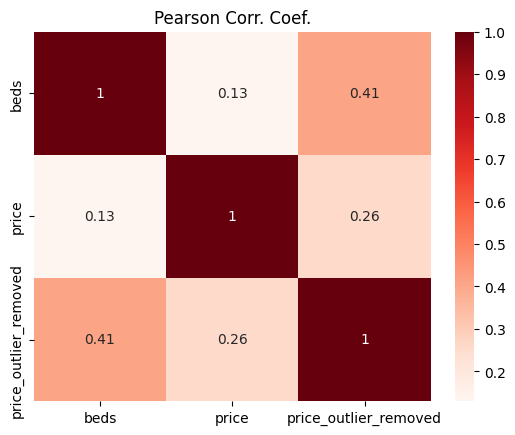

In [1588]:
sns.heatmap(df.toPandas()[['beds', 'price', 'price_outlier_removed']].corr(method = 'pearson'), annot = True, cmap = 'Reds')
plt.title("Pearson Corr. Coef.")

Text(0.5, 1.0, 'kendall Corr. Coef.')

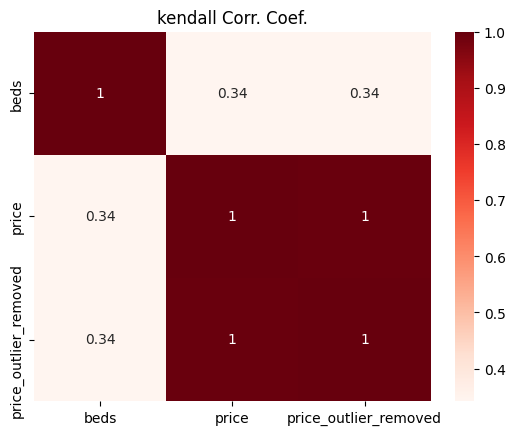

In [1589]:
sns.heatmap(df.toPandas()[['beds', 'price', 'price_outlier_removed']].corr(method = 'kendall'), annot = True, cmap = 'Reds')
plt.title("kendall Corr. Coef.")

Kendall correlation can capture non-linear relationship and the coefficiet value is fairly large at 0.34.
We will use this column for modelling.

In [1590]:
features_for_modelling.append('beds')

## `amenities` vs `Price`

In [1591]:
unique_amenities = df.select(col('amenities')).distinct().collect()

In [1592]:
unique_amenities

[Row(amenities='["Washer", "Heating", "Long term stays allowed", "Kitchen", "Refrigerator", "Window AC unit", "Dryer", "Fast wifi \\u2013 331 Mbps", "TV with standard cable", "Essentials", "Coffee maker"]'),
 Row(amenities='["Stove", "Long term stays allowed", "Kitchen", "Iron", "Window AC unit", "Dishwasher", "Essentials", "Bed linens", "Self check-in", "Laundromat nearby", "Free street parking", "Rice maker", "Freezer", "Refrigerator", "Dedicated workspace", "Coffee maker", "Heating", "Hot water", "Wifi", "Oven", "Luggage dropoff allowed", "Cooking basics", "TV with standard cable", "Hangers", "Baking sheet", "Dishes and silverware", "Microwave", "Lockbox", "Hair dryer"]'),
 Row(amenities='["Smoke alarm", "Carbon monoxide alarm", "Washer", "Shampoo", "Heating", "Wifi", "Long term stays allowed", "Kitchen", "Dryer", "Indoor fireplace", "TV with standard cable", "Essentials", "Air conditioning"]'),
 Row(amenities='["Carbon monoxide alarm", "Portable fans", "Shampoo", "Conditioner", "Ba

There are too many amenities. We need to group these.

In [1593]:
df.filter(col("amenities").isNull()).count()

0

In [1594]:
temp = df.select(['amenities', 'price', 'price_outlier_removed'])

In [1595]:
temp.show()

+--------------------+-----+---------------------+
|           amenities|price|price_outlier_removed|
+--------------------+-----+---------------------+
|["Carbon monoxide...|175.0|                175.0|
|["Hair dryer", "S...| 75.0|                 75.0|
|["HDTV with Disne...|275.0|                275.0|
|["Heating", "Wifi...| 60.0|                 60.0|
|["Carbon monoxide...| 68.0|                 68.0|
|["Shampoo", "Cond...| 68.0|                 68.0|
|["Smoke alarm", "...| 62.0|                 62.0|
|["Smoke alarm", "...| 65.0|                 65.0|
|["Carbon monoxide...|220.0|                220.0|
|["Smoke alarm", "...| 95.0|                 95.0|
|["Board games", "...|150.0|                150.0|
|["Washer", "Heati...|395.0|                395.0|
|["Smoke alarm", "...|175.0|                175.0|
|["Carbon monoxide...|124.0|                124.0|
|["Carbon monoxide...|124.0|                124.0|
|["Carbon monoxide...| 55.0|                 55.0|
|["Carbon monoxide...| 80.0|   

In [1596]:
from tqdm import tqdm

In [1597]:
subcategories = {
    "safety": ["Smoke alarm", "Carbon monoxide alarm", "Fire extinguisher", "First aid kit"],
    "kitchen": ["Stove", "Kitchen", "Refrigerator", "Oven", "Microwave", "Cooking basics", "Dishes and silverware", "Baking sheet", "Coffee maker", "Freezer", "Dishwasher", "Blender", "High chair"],
    "bathroom": ["Bathtub", "Shampoo", "Conditioner", "Shower gel", "Hair dryer", "Cleaning products", "Body soap"],
    "bedroom": ["Bed linens", "Extra pillows and blankets", "Room-darkening shades", "Lock on bedroom door", "Hangers", "Safe", "Pack 'n Play/Travel crib"],
    "entertainment": ["TV", "Cable TV", "HDTV with Disney+", "Netflix", "Roku", "Children's books and toys"],
    "climate_control": ["Heating", "Air conditioning", "Hot water"],
    "wifi": ["Wifi", "Ethernet connection"]
}

subcategories.keys()

dict_keys(['safety', 'kitchen', 'bathroom', 'bedroom', 'entertainment', 'climate_control', 'wifi'])

<b> The sections below were very difficult for us to implement in raw pyspark, which is why we have converted the temp PySpark dataframe to pandas dataframe and performed the comptutation. Finally, we converted the pandas dataframe back to pyspark dataframe and continued on.

In [1598]:
temp = temp.toPandas()

In [1599]:
temp

amenities   price  \
0      ["Carbon monoxide alarm", "Stove", "Bathtub", ...   175.0   
1      ["Hair dryer", "Smoke alarm", "Carbon monoxide...    75.0   
2      ["HDTV with Disney+, HBO Max, standard cable, ...   275.0   
3      ["Heating", "Wifi", "Long term stays allowed",...    60.0   
4      ["Carbon monoxide alarm", "Shampoo", "Stove", ...    68.0   
...                                                  ...     ...   
41528  ["Smoke alarm", "Wifi", "Exercise equipment", ...   105.0   
41529  ["Smoke alarm", "First aid kit", "Wifi", "TV",...    87.0   
41530  ["Hair dryer", "Smoke alarm", "Carbon monoxide...    70.0   
41531  ["Smoke alarm", "Carbon monoxide alarm", "Firs...   125.0   
41532  ["Carbon monoxide alarm", "Shampoo", "Conditio...  1114.0   

       price_outlier_removed  
0                      175.0  
1                       75.0  
2                      275.0  
3                       60.0  
4                       68.0  
...                      ...  
41528                  105.0  
41529                   87.0  
41530                   70.0  
41531                  125.0  
41532                  416.5  

[41533 rows x 3 columns]

In [1600]:
# Define the subcategories and corresponding amenities
subcategories = {
    "safety": ["Smoke alarm", "Carbon monoxide alarm", "Fire extinguisher", "First aid kit"],
    "kitchen": ["Stove", "Kitchen", "Refrigerator", "Oven", "Microwave", "Cooking basics", "Dishes and silverware", "Baking sheet", "Coffee maker", "Freezer", "Dishwasher", "Blender", "High chair"],
    "bathroom": ["Bathtub", "Shampoo", "Conditioner", "Shower gel", "Hair dryer", "Cleaning products", "Body soap"],
    "bedroom": ["Bed linens", "Extra pillows and blankets", "Room-darkening shades", "Lock on bedroom door", "Hangers", "Safe", "Pack 'n Play/Travel crib"],
    "entertainment": ["TV", "Cable TV", "HDTV with Disney+", "Netflix", "Roku", "Children's books and toys"],
    "climate_control": ["Heating", "Air conditioning", "Hot water"],
    "wifi": ["Wifi", "Ethernet connection"]
}


# Create a new dataframe to hold the subcategory counts
subcategories_df = pd.DataFrame(columns=list(subcategories.keys()))

# Loop through each row in the original dataframe
for i, row in tqdm(temp.iterrows()):
    # Extract the amenities string and remove quotes and brackets
    amenities_str = row["amenities"]
    amenities_str = amenities_str.replace('[','').replace(']','').replace('"','')
    
    # Split the string into a list of amenities
    amenities_list = amenities_str.split(',')
    
    # Count the number of amenities in each subcategory and add to the subcategories_df
    subcategory_counts = {}
    for subcategory, subcategory_amenities in subcategories.items():
        count = 0
        for amenity in amenities_list:
            if amenity.strip() in subcategory_amenities:
                count += 1
        subcategory_counts[subcategory] = count
    subcategories_df.loc[i] = subcategory_counts

# Add the subcategory counts to the original dataframe
temp = pd.concat([temp, subcategories_df], axis=1)


41533it [02:08, 322.86it/s]


In [1601]:
temp.head()

amenities  price  \
0  ["Carbon monoxide alarm", "Stove", "Bathtub", ...  175.0   
1  ["Hair dryer", "Smoke alarm", "Carbon monoxide...   75.0   
2  ["HDTV with Disney+, HBO Max, standard cable, ...  275.0   
3  ["Heating", "Wifi", "Long term stays allowed",...   60.0   
4  ["Carbon monoxide alarm", "Shampoo", "Stove", ...   68.0   

   price_outlier_removed safety kitchen bathroom bedroom entertainment  \
0                  175.0      3       8        2       3             1   
1                   75.0      3       0        2       0             0   
2                  275.0      2       2        1       0             3   
3                   60.0      0       1        0       0             0   
4                   68.0      3       9        2       3             1   

  climate_control wifi  
0               3    2  
1               3    1  
2               2    1  
3               2    1  
4               3    1

In [1602]:
# temp1.columns = ['safety', 'kitchen', 'bathroom', 'bedroom', 'entertainment', \
#                  'climate_control', 'wifi', 'median', 'mean']

In [1603]:
def create_plot(temp, col):
    ax = plt.subplot()
    global local
    local = temp.groupby(col).agg({'price': ['median', 'mean']}).reset_index()
    local.columns = [col, 'median', 'mean']
    
    plot1 = sns.lineplot(x = col, y = 'median', data = local, color = 'red', marker = 'o', label = 'Median Price', ax = ax)
    plot2 = sns.lineplot(x = col, y = 'mean', data = local, color = 'blue', marker = 's', label = 'Mean Price', ax =ax)
    plt.xlabel("Number of {} amenities in a rental".format(col), fontsize = 12)
    plt.ylabel("Price in USD", fontsize = 12)
    plt.title("Number  of {} amenities vs rental price".format(col), fontsize = 13)
    plt.show()

In [1604]:
amneties_subcategories = temp.columns[3:];amneties_subcategories

Index(['safety', 'kitchen', 'bathroom', 'bedroom', 'entertainment',
       'climate_control', 'wifi'],
      dtype='object')

In [1605]:
temp

amenities   price  \
0      ["Carbon monoxide alarm", "Stove", "Bathtub", ...   175.0   
1      ["Hair dryer", "Smoke alarm", "Carbon monoxide...    75.0   
2      ["HDTV with Disney+, HBO Max, standard cable, ...   275.0   
3      ["Heating", "Wifi", "Long term stays allowed",...    60.0   
4      ["Carbon monoxide alarm", "Shampoo", "Stove", ...    68.0   
...                                                  ...     ...   
41528  ["Smoke alarm", "Wifi", "Exercise equipment", ...   105.0   
41529  ["Smoke alarm", "First aid kit", "Wifi", "TV",...    87.0   
41530  ["Hair dryer", "Smoke alarm", "Carbon monoxide...    70.0   
41531  ["Smoke alarm", "Carbon monoxide alarm", "Firs...   125.0   
41532  ["Carbon monoxide alarm", "Shampoo", "Conditio...  1114.0   

       price_outlier_removed safety kitchen bathroom bedroom entertainment  \
0                      175.0      3       8        2       3             1   
1                       75.0      3       0        2       0             0   
2                      275.0      2       2        1       0             3   
3                       60.0      0       1        0       0             0   
4                       68.0      3       9        2       3             1   
...                      ...    ...     ...      ...     ...           ...   
41528                  105.0      1       1        0       0             0   
41529                   87.0      2       1        0       0             1   
41530                   70.0      3       4        1       1             0   
41531                  125.0      4       1        0       0             1   
41532                  416.5      4      10        7       5             1   

      climate_control wifi  
0                   3    2  
1                   3    1  
2                   2    1  
3                   2    1  
4                   3    1  
...               ...  ...  
41528               0    1  
41529               1    1  
41530               2    1  
41531               1    1  
41532               3    1  

[41533 rows x 10 columns]

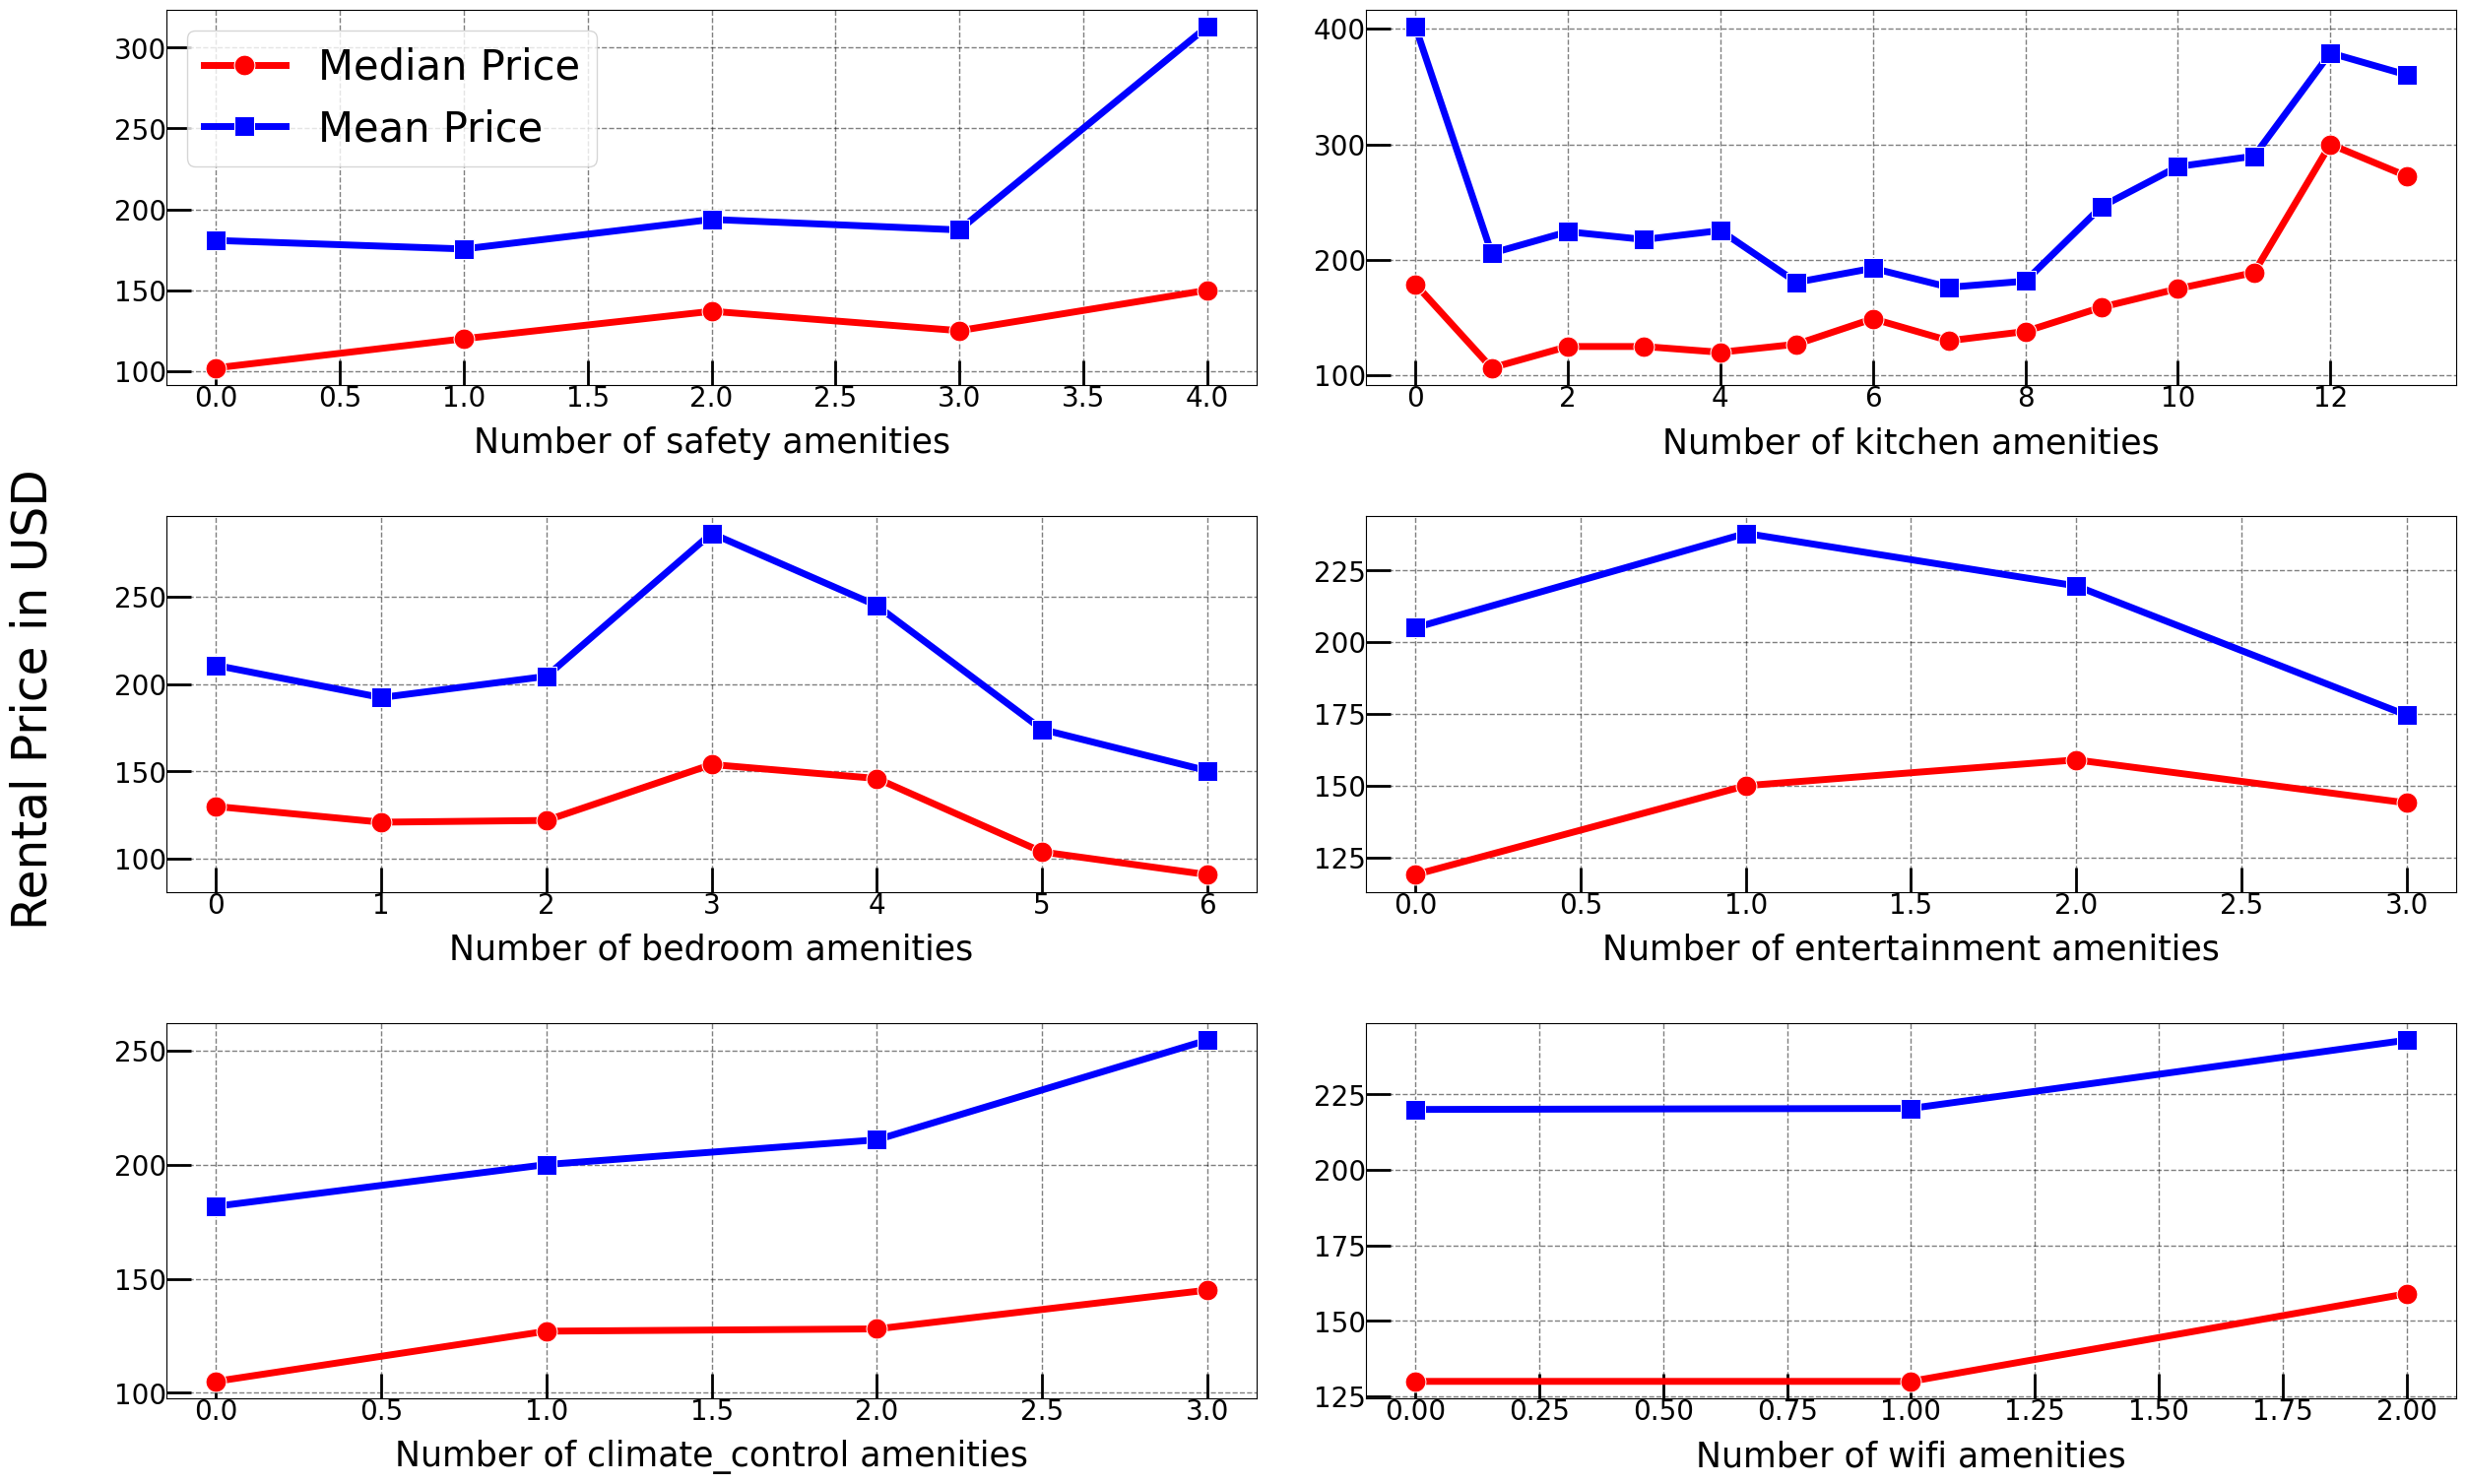

In [1606]:
fig, axes = plt.subplots(3, 2, figsize=(30, 25))
for idx, col in enumerate(['safety', 'kitchen', 'bedroom', 'entertainment',
       'climate_control', 'wifi']):
    
    ax1 = plt.subplot(4,2,idx+1) 
    local = temp.groupby(col).agg({'price': ['median', 'mean']}).reset_index()
    local.columns = [col, 'median', 'mean']
    
    plot1 = sns.lineplot(x = col, y = 'median', data = local, color = 'red', marker = 'o', label = 'Median Price', \
                         linewidth = 5, markersize = 15, ax = ax1)
    plot2 = sns.lineplot(x = col, y = 'mean', data = local, color = 'blue', \
                         linewidth = 5, markersize = 15, marker = 's', label = 'Mean Price', ax =ax1)
    ax1.set_xlabel("")
    ax1.set_ylabel("")
    # plt.xlabel("Number of {} amenities in a rental".format(col), fontsize = 12)
    # plt.ylabel("Price in USD", fontsize = 12)
    # plt.title("Number  of {} amenities vs rental price".format(col), fontsize = 13)
    
    ax1.tick_params(axis ='y', labelbottom=True, labelsize = 20, pad = 0) 
    ax1.tick_params(axis ='x', labelbottom=True, labelsize = 20, pad = 0)
    
    ax1.set_xlabel("Number of "+ col + " amenities", fontsize = 25, labelpad = 10)
    ax1.tick_params(which='both', width=2)
    ax1.tick_params(which='major', length=18)
    ax1.tick_params(which='minor', length=10)
    ax1.tick_params(which = 'both', direction = 'in')
    ax1.grid(True, which = 'major', alpha = 0.5, linestyle='--', linewidth = 1, color = 'black')
    ax1.grid(True, which = 'minor', alpha = 0.5, linestyle='--', linewidth = 0.4, color = 'black')
    plt.legend(fontsize = 30)
    
    if (idx+1) != 1:
        # lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
        # lines, labels = [sum(lol, ()) for lol in zip(*lines_labels)]
        # leg = fig.legend(lines, labels, loc="upper left", bbox_to_anchor=(0.375, 0.925), \
        #                  fontsize = 30, ncol = 2,markerscale=1.5, frameon=False)
        ax1.get_legend().remove()
    # break
    
fig.text(0.08, 0.6, 'Rental Price in USD', ha='center',rotation = 'vertical', va='center', fontsize = 35)
plt.subplots_adjust(wspace=0.1, hspace=0.35)
plt.savefig('Ameneties_vs_MedianPrice.jpg',  bbox_inches='tight', dpi = 500)


In [1607]:
# fig, ax = plt.subplots(figsize=(12, 5))
# plt.savefig('sharedandprivate_baths_vs_MedianPrice.jpg',  bbox_inches='tight', dpi = 500)


It looks like the price of a rental increases with respect to the increase in ameneties. So, the newly created columns will be useful for modelling purposes.

In [1608]:
temp = temp[['safety', 'kitchen', 'bedroom', 'entertainment','climate_control', 'wifi']]

In [1609]:
from pyspark.sql.functions import array, lit, monotonically_increasing_id

In [1610]:
# safety 
new_values = temp.safety.values.tolist()
df = df.withColumn("id", monotonically_increasing_id())
df = df.withColumn("safety", array([lit(x) for x in new_values])[df["id"]])
df = df.drop("id")

In [1611]:
# kitchen 
new_values = temp.kitchen.values.tolist()
df = df.withColumn("id", monotonically_increasing_id())
df = df.withColumn("kitchen", array([lit(x) for x in new_values])[df["id"]])
df = df.drop("id")

In [1612]:
# bedroom 
new_values = temp.bedroom.values.tolist()
df = df.withColumn("id", monotonically_increasing_id())
df = df.withColumn("bedroom", array([lit(x) for x in new_values])[df["id"]])
df = df.drop("id")

In [1613]:
# entertainment 
new_values = temp.entertainment.values.tolist()
df = df.withColumn("id", monotonically_increasing_id())
df = df.withColumn("entertainment", array([lit(x) for x in new_values])[df["id"]])
df = df.drop("id")

In [1614]:
# climate_control 
new_values = temp.climate_control.values.tolist()
df = df.withColumn("id", monotonically_increasing_id())
df = df.withColumn("climate_control", array([lit(x) for x in new_values])[df["id"]])
df = df.drop("id")

In [1615]:
# wifi 
new_values = temp.wifi.values.tolist()
df = df.withColumn("id", monotonically_increasing_id())
df = df.withColumn("wifi", array([lit(x) for x in new_values])[df["id"]])
df = df.drop("id")

In [1616]:
features_for_modelling.append('safety')
features_for_modelling.append('kitchen')
# features_for_modelling.append('bedroom')
features_for_modelling.append('entertainment')
features_for_modelling.append('climate_control')
features_for_modelling.append('wifi')

Lets remove the older ameneties columns as it is of no use to us anymore.

In [1617]:
columns_that_are_dropped.append('amenities')
df = df.drop('amenities')

In [1618]:
df.select(['safety', 'kitchen', 'bedroom', 'entertainment',
       'climate_control', 'wifi']).show()

+------+-------+-------+-------------+---------------+----+
|safety|kitchen|bedroom|entertainment|climate_control|wifi|
+------+-------+-------+-------------+---------------+----+
|     3|      8|      3|            1|              3|   2|
|     3|      0|      0|            0|              3|   1|
|     2|      2|      0|            3|              2|   1|
|     0|      1|      0|            0|              2|   1|
|     3|      9|      3|            1|              3|   1|
|     1|      2|      5|            1|              3|   1|
|     3|      4|      0|            1|              3|   1|
|     3|      1|      1|            0|              2|   1|
|     4|      7|      3|            0|              2|   1|
|     1|      4|      1|            0|              2|   0|
|     3|      9|      2|            0|              2|   1|
|     0|      3|      0|            0|              1|   0|
|     4|      1|      0|            1|              2|   1|
|     4|      2|      5|            0|  

## `minimum_nights` vs `Price`

In [1619]:
data_dictionary['minimum_nights']

'The minimum number of nights required to book the Airbnb listing.'

In [1620]:
df.filter(df.minimum_nights.isNull()).count()

0

In [1621]:
total_rows = df.count()
result = df.groupBy('minimum_nights').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+--------------+-----+-------------------+
|minimum_nights|count|         percentage|
+--------------+-----+-------------------+
|            30|17625| 42.436135121469675|
|             1| 7202| 17.340428093323382|
|             2| 5329|  12.83076108154961|
|             3| 3780|  9.101196638817326|
|             5| 1492| 3.5923241759564686|
|             4| 1427|  3.435822117352467|
|             7|  962|  2.316230467339224|
|            31|  740| 1.7817157441070954|
|            90|  537|  1.292947776466906|
|             6|  401| 0.9654973153877638|
|            14|  305| 0.7343558134495461|
|            10|  251| 0.6043387186092987|
|            60|  179| 0.4309825921556353|
|            28|  162|0.39005128452074256|
|            15|  155|0.37319721667108086|
|            20|   88|0.21187971011003298|
|            21|   84| 0.2022488141959406|
|            29|   75|0.18057929838923267|
|             8|   66|0.15890978258252475|
|           180|   62|0.14927888666843234|
+----------

It looks like almost almost 42.5 % of rentals require users to book for at least 30 days. Lets check how this varies with price.

In [1622]:
temp = df.groupBy('minimum_nights').agg(median('price'), mean('price'))
temp = temp.withColumnRenamed('median(price)', 'median').withColumnRenamed('avg(price)', 'mean')

In [1623]:
temp = temp.toPandas()
temp

minimum_nights  median        mean
0                29   369.0  329.853333
1                26    66.0   68.428571
2                65   155.0  155.000000
3               270   102.0   95.666667
4               222   175.0  175.000000
..              ...     ...         ...
121              91   126.5  141.250000
122              45   126.0  147.057143
123              53    40.0   40.000000
124             273    60.0   60.000000
125              24   115.0  145.666667

[126 rows x 3 columns]

Text(0.5, 1.0, 'Number  of minimum_nights vs rental price')

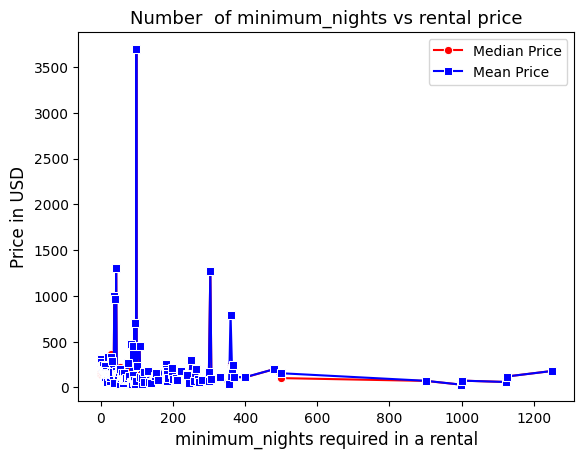

In [1624]:
ax = plt.subplot()
plot1 = sns.lineplot(x = 'minimum_nights', y = 'median', data = temp, color = 'red', marker = 'o', label = 'Median Price', ax = ax)
plot2 = sns.lineplot(x = 'minimum_nights', y = 'mean', data = temp, color = 'blue', marker = 's', label = 'Mean Price', ax =ax)
plt.xlabel("minimum_nights required in a rental", fontsize = 12)
plt.ylabel("Price in USD", fontsize = 12)
plt.title("Number  of minimum_nights vs rental price", fontsize = 13)

There does not seem to be any explainable relationship between price of a rental and minimum number of nights required to register. So, we wil drop this column altogether.

In [1625]:
columns_that_are_dropped.append('minimum_nights')
df = df.drop('minimum_nights')

## `maximum_nights` vs `price`

In [1626]:
data_dictionary['maximum_nights']

'The maximum number of nights allowed for a booking of the Airbnb listing.'

In [1627]:
df.filter(df.maximum_nights.isNull()).count()

0

In [1628]:
df.select('maximum_nights').show()

+--------------+
|maximum_nights|
+--------------+
|          1125|
|            14|
|          1125|
|           730|
|           730|
|            14|
|           700|
|           180|
|          1125|
|            45|
|          1125|
|            90|
|          1125|
|            21|
|            21|
|           730|
|          1125|
|           730|
|           365|
|            30|
+--------------+
only showing top 20 rows



The values in this column are in object form. We need to convert them into integer form.

In [1629]:
from pyspark.sql.functions import col

In [1630]:
df = df.withColumn("maximum_nights", col("maximum_nights").cast("integer"))

There aare some error/noise in this column. The maximum day a rental allows to stay is 2.14 * 10^9, which is simply not possible

Text(0.5, 1.0, 'Number  of maximum_nights vs rental price')

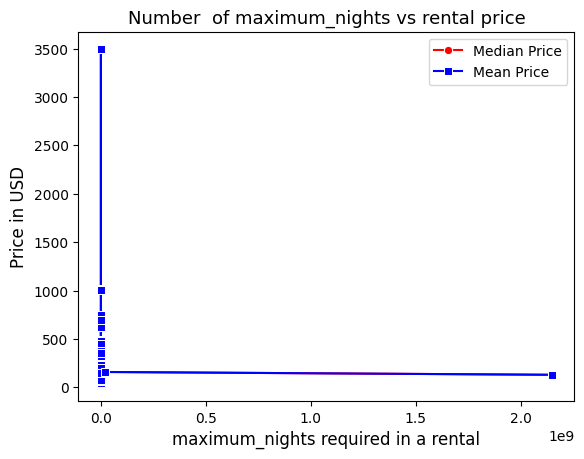

In [1631]:
temp = df.groupBy('maximum_nights').agg(median('price'), mean('price'))
temp = temp.withColumnRenamed('median(price)', 'median').withColumnRenamed('avg(price)', 'mean')
temp = temp.toPandas()

ax = plt.subplot()
plot1 = sns.lineplot(x = 'maximum_nights', y = 'median', data = temp, color = 'red', marker = 'o', label = 'Median Price', ax = ax)
plot2 = sns.lineplot(x = 'maximum_nights', y = 'mean', data = temp, color = 'blue', marker = 's', label = 'Mean Price', ax =ax)
plt.xlabel("maximum_nights required in a rental", fontsize = 12)
plt.ylabel("Price in USD", fontsize = 12)
plt.title("Number  of maximum_nights vs rental price", fontsize = 13)

There is no point in keeping this column as there is too many noise. So, we will drop this column.

In [1632]:
columns_that_are_dropped.append('maximum_nights')
df = df.drop('maximum_nights')

## `number_of_reviews` vs `price`

In [1633]:
df.filter(df.number_of_reviews.isNull()).count()

0

In [1634]:
df.select("number_of_reviews").distinct().show()

+-----------------+
|number_of_reviews|
+-----------------+
|               29|
|               26|
|               65|
|              191|
|              293|
|              270|
|              222|
|              278|
|              243|
|               19|
|               54|
|              296|
|                0|
|              287|
|              277|
|              348|
|              415|
|              502|
|              155|
|              112|
+-----------------+
only showing top 20 rows



Ok. There don't seem to be any noise in this column. Lets conver the values to integer and plot with respect to price

In [1635]:
from pyspark.sql.functions import col

df = df.withColumn("number_of_reviews", col("number_of_reviews").cast("int"))

Text(0, 0.5, 'Price')

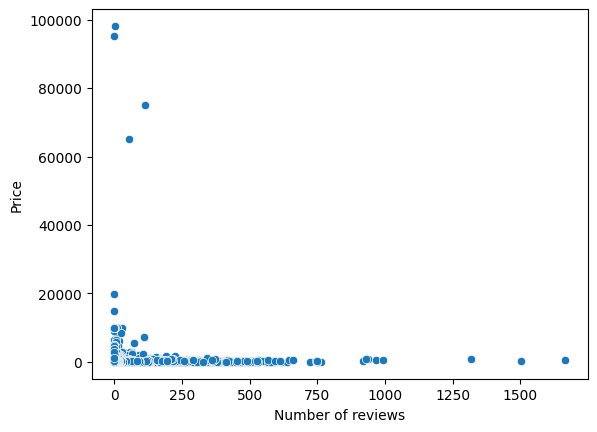

In [1636]:
sns.scatterplot(x = 'number_of_reviews', y = 'price', data = df.toPandas())
plt.xlabel("Number of reviews")
plt.ylabel("Price")

The original price column is highly skewed. So, lets plot the scatterplot with price_outlier_removed column to check the relationship.

Text(0, 0.5, 'Price (Without outliers')

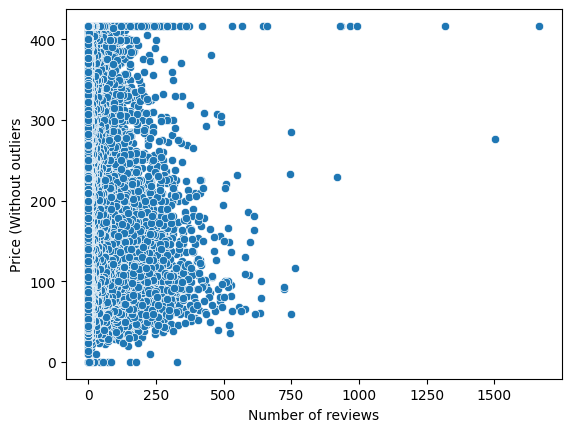

In [1637]:
sns.scatterplot(x = 'number_of_reviews', y = 'price_outlier_removed', data = df.toPandas())
plt.xlabel("Number of reviews")
plt.ylabel("Price (Without outliers")

Still, there does not seem to be any linear relationship between the variables. It is best to simply drop the column altogether.

Lets try calculating kendall correlation coefficient between number of reviews and price. Kendall coef. is known for capturing non linear relationships in the data. 

In [1638]:
df.select(['number_of_reviews', 'price_outlier_removed']).toPandas().corr(method = 'kendall')

number_of_reviews  price_outlier_removed
number_of_reviews               1.000000               0.005843
price_outlier_removed           0.005843               1.000000

In [1639]:
df.select(['number_of_reviews', 'price_outlier_removed']).toPandas().corr(method = 'pearson')

number_of_reviews  price_outlier_removed
number_of_reviews               1.000000              -0.018351
price_outlier_removed          -0.018351               1.000000

There does not seem to be  any relationship between variables. It is best we drop this column altogether.

In [1640]:
columns_that_are_dropped.append('number_of_reviews')
df = df.drop('number_of_reviews')

## `review_scores_rating` vs `price`

In [1641]:
from pyspark.sql.functions import col

In [1642]:
df.filter(col("review_scores_rating").isNull()).count() / df.count() * 100

22.615751330267496

Almost 22 % of values in this column are null. Lets check the relation with price.

In [1643]:
data_dictionary['review_scores_rating']

'The average rating score for the Airbnb listing.'

In [1644]:
total_rows = df.count()
result = df.groupBy('review_scores_rating').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+--------------------+-----+------------------+
|review_scores_rating|count|        percentage|
+--------------------+-----+------------------+
|                 5.0| 9459|22.774661112850023|
|                null| 9393|22.615751330267496|
|                 4.0| 1174| 2.826667950786122|
|                 4.5| 1157| 2.785736643151229|
|                4.67|  932| 2.243998747983531|
|                4.75|  806|1.9406255266896204|
|                 4.8|  694| 1.670960441095033|
|                4.83|  679|1.6348445814171866|
|                4.88|  611|1.4711193508776155|
|                4.86|  608| 1.463896178942046|
|                4.89|  498|1.1990465413045048|
|                4.92|  479|1.1532997857125658|
|                4.91|  475|1.1436688897984735|
|                 4.9|  474|1.1412611658199503|
|                4.93|  448|1.0786603423783496|
|                4.71|  444|1.0690294464642573|
|                 0.0|  441| 1.061806274528688|
|                4.94|  416|1.0016131750

Almost 22.8 % of the airbnb rentals are rated 5/5. 

In [1645]:
df.select('review_scores_rating').distinct().show()

+--------------------+
|review_scores_rating|
+--------------------+
|                4.19|
|                4.88|
|                 0.0|
|                4.92|
|                4.23|
|                4.02|
|                4.36|
|                4.93|
|                3.57|
|                 3.5|
|                3.56|
|                4.34|
|                3.33|
|                3.88|
|                3.93|
|                3.45|
|                4.41|
|                4.27|
|                 3.7|
|                3.96|
+--------------------+
only showing top 20 rows



The values in this column are string and there are null values as well. Lets check if there is some relationship with price or not.

In [1646]:
from pyspark.sql.functions import col

temp = df.select('review_scores_rating', 'price', 'price_outlier_removed') \
        .dropna(subset=['review_scores_rating']) \
        .withColumn('review_scores_rating', col('review_scores_rating').cast('float'))

In [1647]:
temp.show()

+--------------------+-----+---------------------+
|review_scores_rating|price|price_outlier_removed|
+--------------------+-----+---------------------+
|                4.68|175.0|                175.0|
|                4.91| 75.0|                 75.0|
|                 5.0|275.0|                275.0|
|                4.52| 60.0|                 60.0|
|                4.57| 68.0|                 68.0|
|                4.23| 68.0|                 68.0|
|                4.88| 62.0|                 62.0|
|                 5.0| 65.0|                 65.0|
|                4.89|220.0|                220.0|
|                4.91| 95.0|                 95.0|
|                4.76|150.0|                150.0|
|                4.86|395.0|                395.0|
|                4.52|175.0|                175.0|
|                4.71|124.0|                124.0|
|                4.73|124.0|                124.0|
|                4.89| 55.0|                 55.0|
|                4.38| 80.0|   

Text(0, 0.5, 'Price')

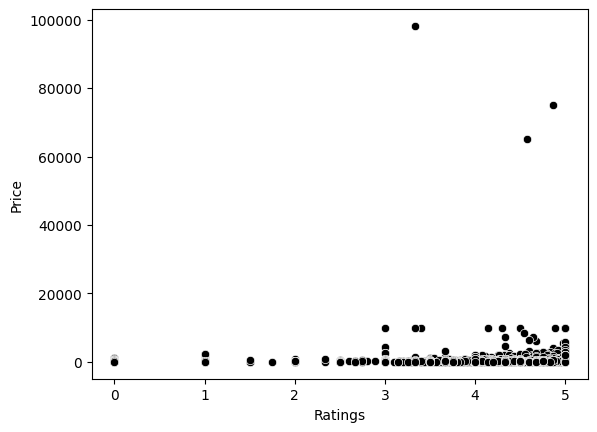

In [1648]:
sns.scatterplot(x = 'review_scores_rating', y = 'price', data = temp.toPandas(), color = 'black') 
plt.xlabel("Ratings")
plt.ylabel("Price")

Lets group these ratings from 0 to 5 in categorial form.

In [1649]:
from pyspark.sql.functions import when

bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
labels = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5']

temp = temp.withColumn(
    "rating_category",
    when((temp.review_scores_rating >= bins[0]) & (temp.review_scores_rating <= bins[1]), labels[0]) \
    .when((temp.review_scores_rating > bins[1]) & (temp.review_scores_rating <= bins[2]), labels[1]) \
    .when((temp.review_scores_rating > bins[2]) & (temp.review_scores_rating <= bins[3]), labels[2]) \
    .when((temp.review_scores_rating > bins[3]) & (temp.review_scores_rating <= bins[4]), labels[3]) \
    .when((temp.review_scores_rating > bins[4]) & (temp.review_scores_rating <= bins[5]), labels[4]) \
    .when((temp.review_scores_rating > bins[5]) & (temp.review_scores_rating <= bins[6]), labels[5]) \
    .when((temp.review_scores_rating > bins[6]) & (temp.review_scores_rating <= bins[7]), labels[6]) \
    .when((temp.review_scores_rating > bins[7]) & (temp.review_scores_rating <= bins[8]), labels[7]) \
    .when((temp.review_scores_rating > bins[8]) & (temp.review_scores_rating <= bins[9]), labels[8]) \
    .when(temp.review_scores_rating > bins[9], labels[9]) \
    .otherwise(None)
)

In [1650]:
temp

DataFrame[review_scores_rating: float, price: float, price_outlier_removed: double, rating_category: string]

In [1651]:
temp.select('rating_category').distinct().show()

+---------------+
|rating_category|
+---------------+
|          3-3.5|
|          2.5-3|
|          0.5-1|
|          4.5-5|
|          4-4.5|
|          1.5-2|
|          1-1.5|
|          3.5-4|
|          2-2.5|
|          0-0.5|
+---------------+



In [1652]:
temp1 = (temp
        .groupBy('rating_category')
        .agg(median('price').alias('price'))
        .orderBy('rating_category'))
temp1.show()

+---------------+-----+
|rating_category|price|
+---------------+-----+
|          0-0.5| 99.0|
|          0.5-1|100.0|
|          1-1.5|109.0|
|          1.5-2| 96.0|
|          2-2.5| 83.0|
|          2.5-3| 90.0|
|          3-3.5|100.0|
|          3.5-4|110.0|
|          4-4.5|120.0|
|          4.5-5|135.0|
+---------------+-----+



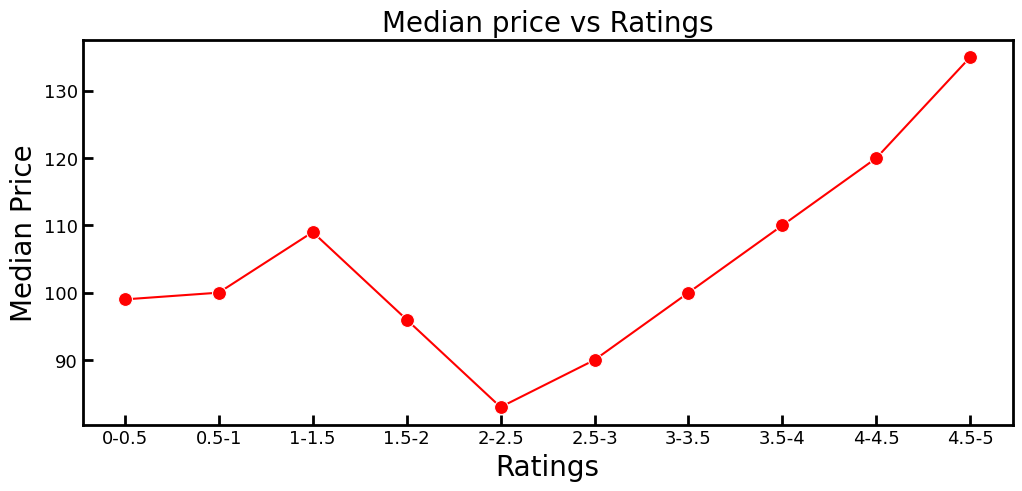

In [1653]:
fig, ax = plt.subplots(figsize=(12, 5))

sns.lineplot(x = 'rating_category', y = 'price', data = temp1.toPandas(), \
             color = 'red', marker = 'o', markersize = 10)
ax.set_title("Ratings vs Price", fontsize = 30)
plt.xlabel("Ratings", fontsize = 20)
plt.ylabel("Median Price", fontsize = 20)
plt.title("Median price vs Ratings", fontsize = 20)
ax.xaxis.set_tick_params(labelsize=13)
ax.yaxis.set_tick_params(labelsize=13)

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

plt.savefig('Ratings_vs_MedianPrice.jpg',  bbox_inches='tight', dpi = 500)


We can clearly see that the median price and review of a rental has strong linear relationship. 

<b> Lets fill the null values first and check the relationship.

In [1654]:
# temp = df[['review_scores_rating', 'price', 'price_outlier_removed']].dropna()
# temp = temp.reset_index(drop = True)
# temp.review_scores_rating = temp.review_scores_rating.astype(float)

# avg = temp.review_scores_rating.mean()

from pyspark.sql.functions import col, avg

temp = df.select('review_scores_rating', 'price', 'price_outlier_removed').na.drop()
temp = temp.withColumn('review_scores_rating', col('review_scores_rating').cast('float'))
avg = temp.agg(avg('review_scores_rating')).collect()[0][0]

In [1655]:
avg

4.634391415141425

In [1656]:
from pyspark.sql.functions import lit

In [1657]:
from pyspark.sql.functions import col, avg, when

temp = df.select('review_scores_rating', 'price', 'price_outlier_removed')

avg_score = temp.select(avg('review_scores_rating')).collect()[0][0]
temp = temp.withColumn('review_scores_rating', when(col('review_scores_rating').isNull(), lit(avg_score)).otherwise(col('review_scores_rating')))
temp = temp.withColumn('review_scores_rating', col('review_scores_rating').cast('float'))


In [1658]:
temp.show()

+--------------------+-----+---------------------+
|review_scores_rating|price|price_outlier_removed|
+--------------------+-----+---------------------+
|                4.68|175.0|                175.0|
|                4.91| 75.0|                 75.0|
|                 5.0|275.0|                275.0|
|                4.52| 60.0|                 60.0|
|                4.57| 68.0|                 68.0|
|                4.23| 68.0|                 68.0|
|                4.88| 62.0|                 62.0|
|                 5.0| 65.0|                 65.0|
|                4.89|220.0|                220.0|
|                4.91| 95.0|                 95.0|
|                4.76|150.0|                150.0|
|                4.86|395.0|                395.0|
|                4.52|175.0|                175.0|
|                4.71|124.0|                124.0|
|                4.73|124.0|                124.0|
|                4.89| 55.0|                 55.0|
|                4.38| 80.0|   

In [1659]:
temp = temp.withColumn(
    "rating_category",
    when((temp.review_scores_rating >= bins[0]) & (temp.review_scores_rating <= bins[1]), labels[0]) \
    .when((temp.review_scores_rating > bins[1]) & (temp.review_scores_rating <= bins[2]), labels[1]) \
    .when((temp.review_scores_rating > bins[2]) & (temp.review_scores_rating <= bins[3]), labels[2]) \
    .when((temp.review_scores_rating > bins[3]) & (temp.review_scores_rating <= bins[4]), labels[3]) \
    .when((temp.review_scores_rating > bins[4]) & (temp.review_scores_rating <= bins[5]), labels[4]) \
    .when((temp.review_scores_rating > bins[5]) & (temp.review_scores_rating <= bins[6]), labels[5]) \
    .when((temp.review_scores_rating > bins[6]) & (temp.review_scores_rating <= bins[7]), labels[6]) \
    .when((temp.review_scores_rating > bins[7]) & (temp.review_scores_rating <= bins[8]), labels[7]) \
    .when((temp.review_scores_rating > bins[8]) & (temp.review_scores_rating <= bins[9]), labels[8]) \
    .when(temp.review_scores_rating > bins[9], labels[9]) \
    .otherwise(None)
)

temp1 = (temp
        .groupBy('rating_category')
        .agg(median('price').alias('price'))
        .orderBy('rating_category'))

In [1660]:
temp1.show()

+---------------+-----+
|rating_category|price|
+---------------+-----+
|          0-0.5| 99.0|
|          0.5-1|100.0|
|          1-1.5|109.0|
|          1.5-2| 96.0|
|          2-2.5| 83.0|
|          2.5-3| 90.0|
|          3-3.5|100.0|
|          3.5-4|110.0|
|          4-4.5|120.0|
|          4.5-5|136.0|
+---------------+-----+



Text(0.5, 1.0, 'Median price vs Ratings (After filling null values')

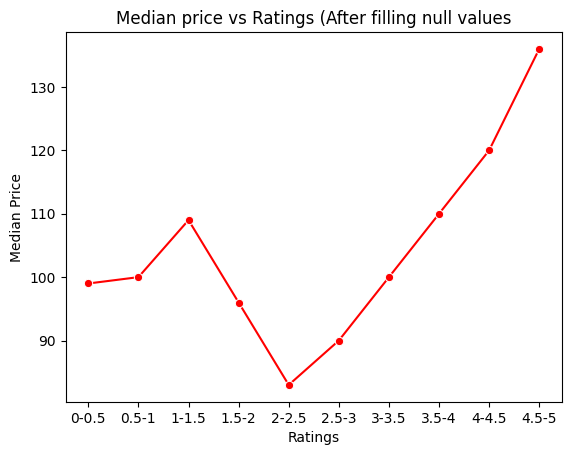

In [1661]:

sns.lineplot(x = 'rating_category', y = 'price', data = temp1.toPandas(), \
             color = 'red', marker = 'o', )
plt.title("Ratings vs Price")
plt.xlabel("Ratings")
plt.ylabel("Median Price")
plt.title("Median price vs Ratings (After filling null values")

We can clearly see tha the relationship is retained after filling 22 % of null values in this column. We will proceed to convert the values in this column into categorical bins.

In [1662]:
# df.review_scores_rating.fillna(avg, inplace = True)
# df.review_scores_rating = df.review_scores_rating.astype(float)

In [1663]:
# Fill null values with the average score
df = df.withColumn('review_scores_rating', when(col('review_scores_rating').isNull(), lit(avg_score)).otherwise(col('review_scores_rating')))
df = df.withColumn('review_scores_rating', col('review_scores_rating').cast('float'))

In [1664]:
df.select(sum(col('review_scores_rating').isNull().cast('int'))).collect()[0][0]

0

In [1665]:
df.select('review_scores_rating').show()

+--------------------+
|review_scores_rating|
+--------------------+
|                4.68|
|                4.91|
|                 5.0|
|                4.52|
|                4.57|
|                4.23|
|                4.88|
|                 5.0|
|                4.89|
|                4.91|
|                4.76|
|                4.86|
|                4.52|
|                4.71|
|                4.73|
|                4.89|
|                4.38|
|           4.6343913|
|                 4.5|
|                4.91|
+--------------------+
only showing top 20 rows



In [1666]:
df = df.withColumn(
    "review_scores_rating",
    when((df.review_scores_rating >= bins[0]) & (df.review_scores_rating <= bins[1]), labels[0]) \
    .when((df.review_scores_rating > bins[1]) & (df.review_scores_rating <= bins[2]), labels[1]) \
    .when((df.review_scores_rating > bins[2]) & (df.review_scores_rating <= bins[3]), labels[2]) \
    .when((df.review_scores_rating > bins[3]) & (df.review_scores_rating <= bins[4]), labels[3]) \
    .when((df.review_scores_rating > bins[4]) & (df.review_scores_rating <= bins[5]), labels[4]) \
    .when((df.review_scores_rating > bins[5]) & (df.review_scores_rating <= bins[6]), labels[5]) \
    .when((df.review_scores_rating > bins[6]) & (df.review_scores_rating <= bins[7]), labels[6]) \
    .when((df.review_scores_rating > bins[7]) & (df.review_scores_rating <= bins[8]), labels[7]) \
    .when((df.review_scores_rating > bins[8]) & (df.review_scores_rating <= bins[9]), labels[8]) \
    .when(df.review_scores_rating > bins[9], labels[9]) \
    .otherwise(None)
)

In [1667]:
features_for_modelling.append('Ratings')

In [1668]:
df = df.withColumnRenamed('review_scores_rating', 'Ratings')

In [1669]:
df.select(sum(col('Ratings').isNull().cast('int'))).collect()[0][0]

0

In [1670]:
# df.drop('review_scores_rating', axis = 1, inplace = True)
columns_that_are_dropped.append('review_scores_rating')

## `review_scores_accuracy` vs `price`

In [1671]:
data_dictionary['review_scores_accuracy']

'The average accuracy score for the Airbnb listing.'

In [1672]:
df.filter(col("review_scores_accuracy").isNull()).count() / df.count() * 100

23.69441167264585

In [1673]:
total_rows = df.count()
result = df.groupBy('review_scores_accuracy').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+----------------------+-----+------------------+
|review_scores_accuracy|count|        percentage|
+----------------------+-----+------------------+
|                   5.0|11046|26.595719066766186|
|                  null| 9841| 23.69441167264585|
|                   4.5|  869|2.0923121373365756|
|                   4.0|  862| 2.075458069486914|
|                  4.67|  823| 1.981556834324513|
|                  4.88|  722|1.7383767124936798|
|                  4.75|  720|1.7335612645366334|
|                   4.8|  685| 1.649290925288325|
|                  4.83|  661|1.5915055498037707|
|                  4.86|  654|1.5746514819541086|
|                  4.92|  639|1.5385356222762623|
|                  4.93|  614|1.4783425228131848|
|                  4.94|  600|1.4446343871138614|
|                  4.89|  586|1.4109262514145378|
|                   4.9|  580|1.3964799075433993|
|                  4.91|  574|1.3820335636722607|
|                  4.95|  539| 1.297763224423952|


In [1674]:
df.select('review_scores_accuracy').distinct().show()

+----------------------+
|review_scores_accuracy|
+----------------------+
|                  4.19|
|                  4.88|
|                   0.0|
|                  4.92|
|                  4.23|
|                  4.02|
|                  4.36|
|                  4.93|
|                  3.57|
|                   3.5|
|                  3.56|
|                  3.33|
|                  4.34|
|                  3.88|
|                  3.93|
|                  3.45|
|                  3.64|
|                  3.42|
|                  4.41|
|                  4.27|
+----------------------+
only showing top 20 rows



Almost 24 % of values in this column are null. Additionally, we already have a Review column so we  will proceed to drop this column.

In [1675]:
df = df.drop('review_scores_accuracy')
columns_that_are_dropped.append('review_scores_accuracy')

## `Bedrooms` vs `Price`

In [1676]:
data_dictionary['bedrooms']

'The number of bedrooms available in the Airbnb listing.'

In [1677]:
df.filter(col("bedrooms").isNull()).count() / df.count() * 100

9.202321045915296

In [1678]:
total_rows = df.count()
result = df.groupBy('bedrooms').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+--------+-----+--------------------+
|bedrooms|count|          percentage|
+--------+-----+--------------------+
|     1.0|28034|   67.49813401391664|
|     2.0| 6300|  15.168661064695543|
|    null| 3822|   9.202321045915296|
|     3.0| 2470|   5.947078226952062|
|     4.0|  683|  1.6444754773312789|
|     5.0|  150| 0.36115859677846535|
|     6.0|   50|  0.1203861989261551|
|     7.0|    9| 0.02166951580670792|
|     8.0|    7|0.016854067849661713|
|     9.0|    6|0.014446343871138613|
|    11.0|    1|0.002407723978523102|
|    14.0|    1|0.002407723978523102|
+--------+-----+--------------------+



It looks like almost 67.5 % of all rentals only offer 1 bedrooms. So, we can fill the null values using this value. Additionally, lets check the relationship with price first without null values.

In [1679]:
temp = df.select('bedrooms', 'price', 'price_outlier_removed') \
        .dropna(subset=['bedrooms']) \
        .withColumn('bedrooms', col('bedrooms').cast('float'))

In [1680]:
temp.show()

+--------+-----+---------------------+
|bedrooms|price|price_outlier_removed|
+--------+-----+---------------------+
|     1.0| 75.0|                 75.0|
|     2.0|275.0|                275.0|
|     1.0| 60.0|                 60.0|
|     1.0| 68.0|                 68.0|
|     1.0| 62.0|                 62.0|
|     1.0| 65.0|                 65.0|
|     1.0|220.0|                220.0|
|     1.0| 95.0|                 95.0|
|     1.0|150.0|                150.0|
|     1.0|124.0|                124.0|
|     1.0|124.0|                124.0|
|     1.0| 55.0|                 55.0|
|     1.0| 80.0|                 80.0|
|     1.0|150.0|                150.0|
|     1.0|119.0|                119.0|
|     1.0|146.0|                146.0|
|     1.0| 96.0|                 96.0|
|     1.0|200.0|                200.0|
|     1.0| 83.0|                 83.0|
|     2.0|251.0|                251.0|
+--------+-----+---------------------+
only showing top 20 rows



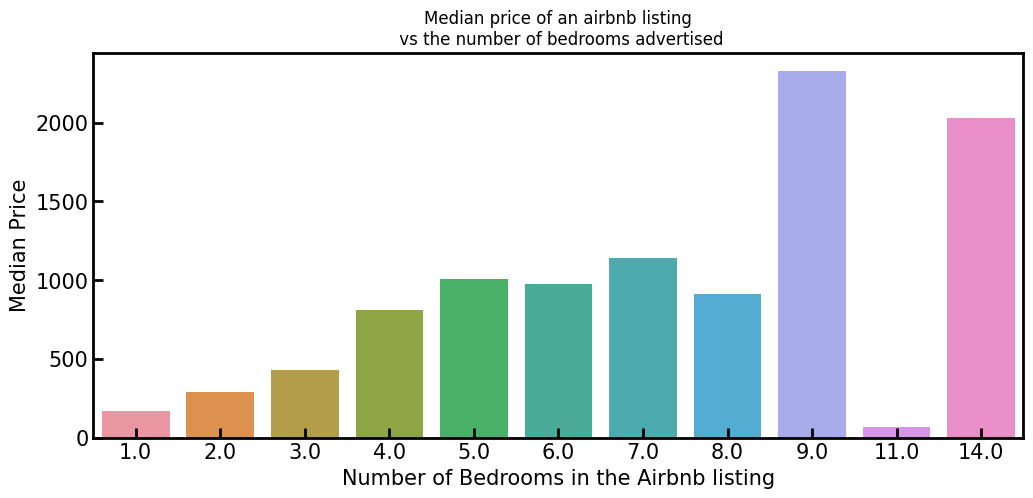

In [1681]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.barplot(x = 'bedrooms', y = 'price', data = temp.toPandas(), errorbar=None)
plt.xlabel("Number of Bedrooms in the Airbnb listing", fontsize = 15)
plt.ylabel("Median Price", fontsize = 15)
plt.title("Median price of an airbnb listing\n vs the number of bedrooms advertised")

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

plt.savefig('NumberofBedrooms_vs_MedianPrice.jpg',  bbox_inches='tight', dpi = 500)


It can be clearly seen that the rentals seem to be higher for rentals with more number of bedrooms offered. Furthermore, we had previously extracted number of bedrooms from amenities column. Lets check how that column compares with this colum in temrs of relationship with price so that we can drop one of the two columns.

In [1682]:
temp = df.select('bedroom', 'price', 'price_outlier_removed').na.drop()
# temp = temp.withColumn('bedroom', col('bedroom').cast('int'))
temp1 = (temp
        .groupBy('bedroom')
        .agg(median('price').alias('price'))
        .orderBy('bedroom'))
temp1.show()

+-------+-----+
|bedroom|price|
+-------+-----+
|      0|130.0|
|      1|121.0|
|      2|122.0|
|      3|154.0|
|      4|146.0|
|      5|104.0|
|      6| 91.0|
+-------+-----+



Text(0.5, 1.0, 'Extracted from ameneties column')

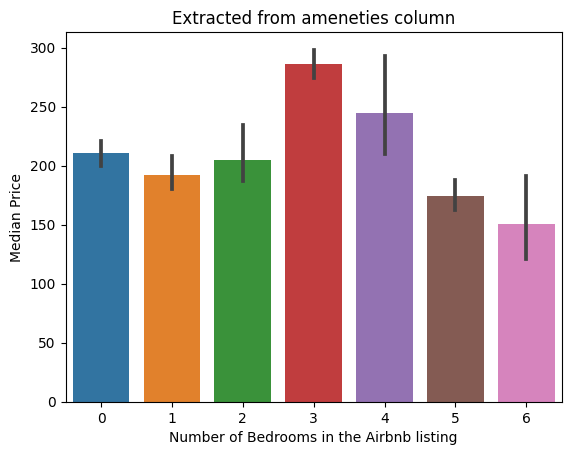

In [1683]:
sns.barplot(x = 'bedroom', y = 'price', data = temp.toPandas())
plt.xlabel("Number of Bedrooms in the Airbnb listing")
plt.ylabel("Median Price")
plt.title("Extracted from ameneties column")

It can be clearly seen that the beedroom column extracted from ameneties column showcases poor relationship with price column as compared to the original bedroom column provided in the dataset. So, we will proceed to drop the extracted bedroom column.

In [1684]:
from pyspark.sql.functions import col, sum

In [1685]:
df.select(sum(col('bedrooms').isNull().cast('int'))).collect()[0][0]

3822

In [1686]:
df = df.drop('bedroom')
columns_that_are_dropped.append('bedroom')

<b> Lets check if the relationship varies too much after we fill null values with 1 bedrooms.

In [1687]:
# temp = df[['bedrooms', 'price', 'price_outlier_removed']]
temp = df.select('bedrooms', 'price', 'price_outlier_removed')

# temp.bedrooms = temp.bedrooms.fillna(1)
temp = temp.withColumn('bedrooms', when(col('bedrooms').isNull(), lit(1)).otherwise(col('bedrooms')))


# temp.bedrooms = temp.bedrooms.astype(int)
temp = temp.withColumn('bedrooms', col('bedrooms').cast('int'))


temp1 = (temp
        .groupBy('bedrooms')
        .agg(median('price').alias('price'))
        .orderBy('bedrooms'))
temp1.show()

+--------+------+
|bedrooms| price|
+--------+------+
|       1| 110.0|
|       2| 200.0|
|       3| 270.0|
|       4| 379.0|
|       5| 597.0|
|       6| 745.0|
|       7|1143.0|
|       8| 879.0|
|       9|2277.0|
|      11|  66.0|
|      14|2029.0|
+--------+------+



Text(0.5, 1.0, 'Extracted from ameneties column')

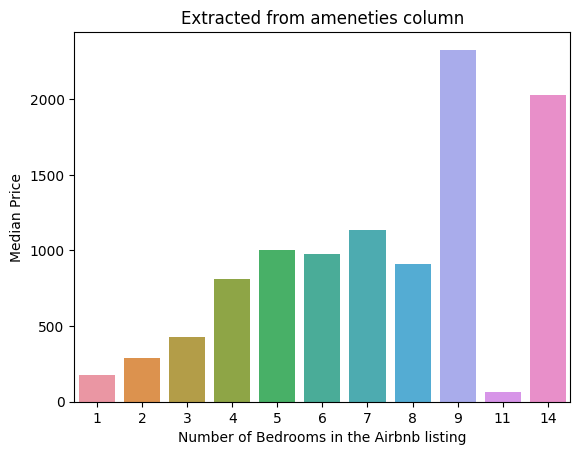

In [1688]:
sns.barplot(x = 'bedrooms', y = 'price', data = temp.toPandas(), errorbar = None)
plt.xlabel("Number of Bedrooms in the Airbnb listing")
plt.ylabel("Median Price")
plt.title("Extracted from ameneties column")

The relationship with price is perfectly retained after filling null values with 1. We will be using this column for modellig purpose.

In [1689]:
df = df.withColumn('bedrooms', when(col('bedrooms').isNull(), lit(1)).otherwise(col('bedrooms')))


In [1690]:
df.select(sum(col('bedrooms').isNull().cast('int'))).collect()[0][0]

0

In [1691]:
df = df.withColumn('bedrooms', col('bedrooms').cast('int'))

In [1692]:
features_for_modelling.append('bedrooms')

## `review_scores_cleanliness` vs `Price`

In [1693]:
data_dictionary['review_scores_cleanliness']

'The average cleanliness score for the Airbnb listing.'

In [1694]:
df.select('review_scores_cleanliness').show()

+-------------------------+
|review_scores_cleanliness|
+-------------------------+
|                     4.63|
|                     4.82|
|                      5.0|
|                     4.09|
|                     4.86|
|                     3.75|
|                     4.96|
|                      5.0|
|                      4.9|
|                     4.91|
|                     4.74|
|                      4.4|
|                     4.16|
|                     4.61|
|                     4.62|
|                     4.73|
|                     4.02|
|                     null|
|                      4.4|
|                     4.89|
+-------------------------+
only showing top 20 rows



In [1695]:
total_rows = df.count()
result = df.groupBy('review_scores_cleanliness').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+-------------------------+-----+------------------+
|review_scores_cleanliness|count|        percentage|
+-------------------------+-----+------------------+
|                     null| 9831|23.670334432860617|
|                      5.0| 8631|20.781065658632894|
|                      4.0| 1419| 3.416560325524282|
|                      4.5| 1165|2.8049984349794137|
|                     4.67|  923|2.2223292321768233|
|                     4.75|  771|1.8563551874413116|
|                      4.8|  611|1.4711193508776155|
|                     4.83|  595|1.4325957672212457|
|                     4.88|  557| 1.341102256037368|
|                     4.86|  480|1.1557075096910892|
|                     4.33|  465|1.1195916500132426|
|                      3.0|  459| 1.105145306142104|
|                     4.89|  450| 1.083475790335396|
|                     4.92|  447|1.0762526183998267|
|                      4.9|  446|1.0738448944213035|
|                     4.94|  429|1.03291358678

Thie column contains the average cleanliness score for an airbnb listing. The more clean a rental, the higher should be its price. Lets check the relationship first before filling the null values.

In [1696]:
temp = df.select('review_scores_cleanliness', 'price', 'price_outlier_removed') \
        .dropna(subset=['review_scores_cleanliness']) \
        .withColumn('review_scores_cleanliness', col('review_scores_cleanliness').cast('float'))

Text(0, 0.5, 'Price')

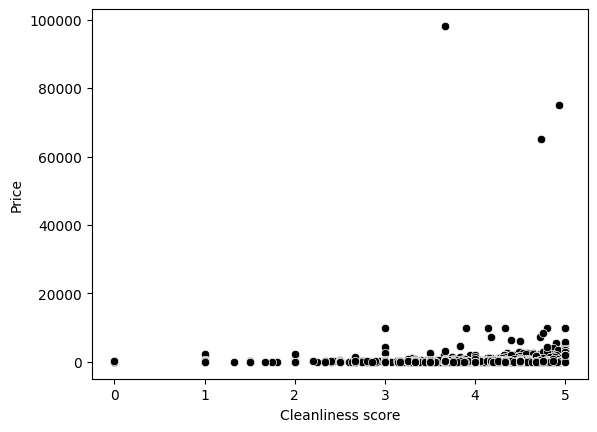

In [1697]:


sns.scatterplot(x = 'review_scores_cleanliness', y = 'price', data = temp.toPandas(), color = 'black') 
plt.xlabel("Cleanliness score")
plt.ylabel("Price")

Lets categorize the values from 0 to 5 with an interval of 0.5 for this column. Then, we can see how price changes with respect to the cleanliness of a rental.

In [1698]:
bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
labels = ['0-0.5', '0.5-1', '1-1.5', '1.5-2', '2-2.5', '2.5-3', '3-3.5', '3.5-4', '4-4.5', '4.5-5']
temp = temp.withColumn(
    "review_scores_cleanliness",
    when((temp.review_scores_cleanliness >= bins[0]) & (temp.review_scores_cleanliness <= bins[1]), labels[0]) \
    .when((temp.review_scores_cleanliness > bins[1]) & (temp.review_scores_cleanliness <= bins[2]), labels[1]) \
    .when((temp.review_scores_cleanliness > bins[2]) & (temp.review_scores_cleanliness <= bins[3]), labels[2]) \
    .when((temp.review_scores_cleanliness > bins[3]) & (temp.review_scores_cleanliness <= bins[4]), labels[3]) \
    .when((temp.review_scores_cleanliness > bins[4]) & (temp.review_scores_cleanliness <= bins[5]), labels[4]) \
    .when((temp.review_scores_cleanliness > bins[5]) & (temp.review_scores_cleanliness <= bins[6]), labels[5]) \
    .when((temp.review_scores_cleanliness > bins[6]) & (temp.review_scores_cleanliness <= bins[7]), labels[6]) \
    .when((temp.review_scores_cleanliness > bins[7]) & (temp.review_scores_cleanliness <= bins[8]), labels[7]) \
    .when((temp.review_scores_cleanliness > bins[8]) & (temp.review_scores_cleanliness <= bins[9]), labels[8]) \
    .when(temp.review_scores_cleanliness > bins[9], labels[9]) \
    .otherwise(None)
)

In [1699]:
temp1 = (temp
        .groupBy('review_scores_cleanliness')
        .agg(median('price').alias('price'))
        .orderBy('review_scores_cleanliness'))
temp1.show()

+-------------------------+-----+
|review_scores_cleanliness|price|
+-------------------------+-----+
|                    0-0.5| 80.0|
|                    0.5-1| 98.0|
|                    1-1.5| 91.0|
|                    1.5-2| 63.0|
|                    2-2.5| 80.0|
|                    2.5-3| 91.0|
|                    3-3.5| 99.0|
|                    3.5-4|101.0|
|                    4-4.5|120.0|
|                    4.5-5|140.0|
+-------------------------+-----+



Text(0, 0.5, 'Median Price')

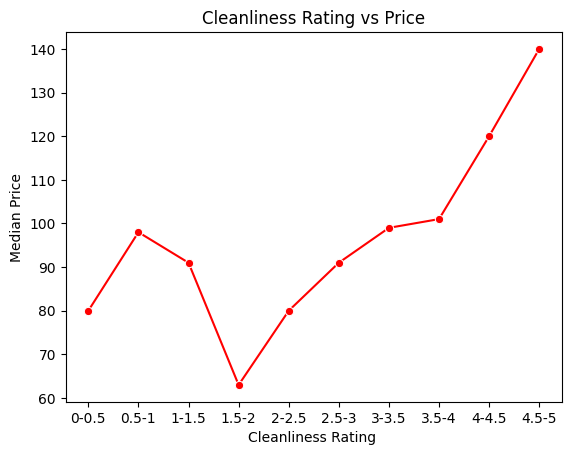

In [1700]:
sns.lineplot(x = 'review_scores_cleanliness', y = 'price', data = temp1.toPandas(), color = 'red', marker = 'o', )
plt.title("Cleanliness Rating vs Price")
plt.xlabel("Cleanliness Rating ")
plt.ylabel("Median Price")

It is clear that as the review score of a rental's cleanliness increases, the price also increases. Lets fill null values with mean cleanliness and see how the new data's relationship with price varies.

In [1701]:
# temp = df.select('review_scores_cleanliness', 'price', 'price_outlier_removed').na.drop()
# temp = temp.withColumn('review_scores_cleanliness', col('review_scores_cleanliness').cast('float'))
# avg = temp.agg(avg('review_scores_cleanliness')).collect()[0][0]
# avg

In [1702]:
from pyspark.sql.functions import col, avg

In [1703]:
temp = df.select('review_scores_cleanliness', 'price', 'price_outlier_removed').na.drop()
temp = temp.withColumn('review_scores_cleanliness', col('review_scores_cleanliness').cast('float'))

avg = temp.agg(avg('review_scores_cleanliness')).collect()[0][0]

In [1704]:
avg

4.633394108579088

In [1705]:
temp = df.select('review_scores_cleanliness', 'price')
temp = temp.withColumn('review_scores_cleanliness', when(col('review_scores_cleanliness').isNull(), lit(avg)).otherwise(col('review_scores_cleanliness')))
temp = temp.withColumn('review_scores_cleanliness', col('review_scores_cleanliness').cast('float'))
temp.show()


+-------------------------+-----+
|review_scores_cleanliness|price|
+-------------------------+-----+
|                     4.63|175.0|
|                     4.82| 75.0|
|                      5.0|275.0|
|                     4.09| 60.0|
|                     4.86| 68.0|
|                     3.75| 68.0|
|                     4.96| 62.0|
|                      5.0| 65.0|
|                      4.9|220.0|
|                     4.91| 95.0|
|                     4.74|150.0|
|                      4.4|395.0|
|                     4.16|175.0|
|                     4.61|124.0|
|                     4.62|124.0|
|                     4.73| 55.0|
|                     4.02| 80.0|
|                4.6333942|150.0|
|                      4.4|119.0|
|                     4.89|146.0|
+-------------------------+-----+
only showing top 20 rows



In [1706]:
temp = temp.withColumn(
    "review_scores_cleanliness",
    when((temp.review_scores_cleanliness >= bins[0]) & (temp.review_scores_cleanliness <= bins[1]), labels[0]) \
    .when((temp.review_scores_cleanliness > bins[1]) & (temp.review_scores_cleanliness <= bins[2]), labels[1]) \
    .when((temp.review_scores_cleanliness > bins[2]) & (temp.review_scores_cleanliness <= bins[3]), labels[2]) \
    .when((temp.review_scores_cleanliness > bins[3]) & (temp.review_scores_cleanliness <= bins[4]), labels[3]) \
    .when((temp.review_scores_cleanliness > bins[4]) & (temp.review_scores_cleanliness <= bins[5]), labels[4]) \
    .when((temp.review_scores_cleanliness > bins[5]) & (temp.review_scores_cleanliness <= bins[6]), labels[5]) \
    .when((temp.review_scores_cleanliness > bins[6]) & (temp.review_scores_cleanliness <= bins[7]), labels[6]) \
    .when((temp.review_scores_cleanliness > bins[7]) & (temp.review_scores_cleanliness <= bins[8]), labels[7]) \
    .when((temp.review_scores_cleanliness > bins[8]) & (temp.review_scores_cleanliness <= bins[9]), labels[8]) \
    .when(temp.review_scores_cleanliness > bins[9], labels[9]) \
    .otherwise(None)
)

temp1 = (temp
        .groupBy('review_scores_cleanliness')
        .agg(median('price').alias('price'))
        .orderBy('review_scores_cleanliness'))
temp1.show()

+-------------------------+-----+
|review_scores_cleanliness|price|
+-------------------------+-----+
|                    0-0.5| 80.0|
|                    0.5-1| 98.0|
|                    1-1.5| 91.0|
|                    1.5-2| 63.0|
|                    2-2.5| 80.0|
|                    2.5-3| 91.0|
|                    3-3.5| 99.0|
|                    3.5-4|101.0|
|                    4-4.5|120.0|
|                    4.5-5|140.0|
+-------------------------+-----+



Text(0, 0.5, 'Median Price')

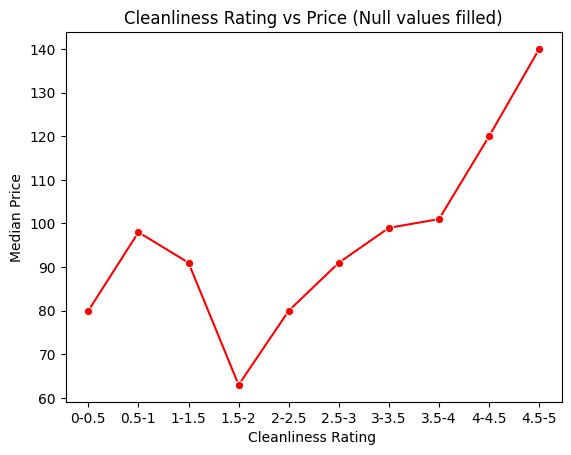

In [1707]:
sns.lineplot(x = 'review_scores_cleanliness', y = 'price', data = temp1.toPandas(), \
             color = 'red', marker = 'o', )
plt.title("Cleanliness Rating vs Price (Null values filled)")
plt.xlabel("Cleanliness Rating ")
plt.ylabel("Median Price")

The relatuonship with the price is retained. So, we will proceed to fill null values in this column this way and proceed to use this column for modelling.

In [1708]:
avg

4.633394108579088

In [1709]:
df = df.withColumn('review_scores_cleanliness', when(col('review_scores_cleanliness').isNull(), lit(avg)).otherwise(col('review_scores_cleanliness')))
df = df.withColumn('review_scores_cleanliness', col('review_scores_cleanliness').cast('float'))


In [1710]:
df.select('review_scores_cleanliness').show()

+-------------------------+
|review_scores_cleanliness|
+-------------------------+
|                     4.63|
|                     4.82|
|                      5.0|
|                     4.09|
|                     4.86|
|                     3.75|
|                     4.96|
|                      5.0|
|                      4.9|
|                     4.91|
|                     4.74|
|                      4.4|
|                     4.16|
|                     4.61|
|                     4.62|
|                     4.73|
|                     4.02|
|                4.6333942|
|                      4.4|
|                     4.89|
+-------------------------+
only showing top 20 rows



In [1711]:
df = df.withColumn(
    "review_scores_cleanliness",
    when((df.review_scores_cleanliness >= bins[0]) & (df.review_scores_cleanliness <= bins[1]), labels[0]) \
    .when((df.review_scores_cleanliness > bins[1]) & (df.review_scores_cleanliness <= bins[2]), labels[1]) \
    .when((df.review_scores_cleanliness > bins[2]) & (df.review_scores_cleanliness <= bins[3]), labels[2]) \
    .when((df.review_scores_cleanliness > bins[3]) & (df.review_scores_cleanliness <= bins[4]), labels[3]) \
    .when((df.review_scores_cleanliness > bins[4]) & (df.review_scores_cleanliness <= bins[5]), labels[4]) \
    .when((df.review_scores_cleanliness > bins[5]) & (df.review_scores_cleanliness <= bins[6]), labels[5]) \
    .when((df.review_scores_cleanliness > bins[6]) & (df.review_scores_cleanliness <= bins[7]), labels[6]) \
    .when((df.review_scores_cleanliness > bins[7]) & (df.review_scores_cleanliness <= bins[8]), labels[7]) \
    .when((df.review_scores_cleanliness > bins[8]) & (df.review_scores_cleanliness <= bins[9]), labels[8]) \
    .when(df.review_scores_cleanliness > bins[9], labels[9]) \
    .otherwise(None)
)

In [1712]:
df.select('review_scores_cleanliness').show()

+-------------------------+
|review_scores_cleanliness|
+-------------------------+
|                    4.5-5|
|                    4.5-5|
|                    4.5-5|
|                    4-4.5|
|                    4.5-5|
|                    3.5-4|
|                    4.5-5|
|                    4.5-5|
|                    4.5-5|
|                    4.5-5|
|                    4.5-5|
|                    4-4.5|
|                    4-4.5|
|                    4.5-5|
|                    4.5-5|
|                    4.5-5|
|                    4-4.5|
|                    4.5-5|
|                    4-4.5|
|                    4.5-5|
+-------------------------+
only showing top 20 rows



In [1713]:
df.select('review_scores_cleanliness').distinct().show()

+-------------------------+
|review_scores_cleanliness|
+-------------------------+
|                    3-3.5|
|                    2.5-3|
|                    0.5-1|
|                    4.5-5|
|                    4-4.5|
|                    1.5-2|
|                    1-1.5|
|                    3.5-4|
|                    2-2.5|
|                    0-0.5|
+-------------------------+



In [1716]:
from pyspark.sql.functions import col, avg

In [1718]:
df.select(sum(col('review_scores_cleanliness').isNull().cast('int'))).collect()[0][0]

0

In [1719]:
features_for_modelling.append('review_scores_cleanliness')

## `review_scores_checkin` vs `Price`

The "review_scores_checkin" column may provide some useful information for predicting the price of a rental property, as guests' satisfaction with the check-in experience could influence their overall impression of the property and their willingness to pay a higher pric

In [1721]:
df.select('review_scores_checkin').show()

+---------------------+
|review_scores_checkin|
+---------------------+
|                 4.77|
|                 4.97|
|                  5.0|
|                 4.91|
|                 4.84|
|                 4.65|
|                 4.96|
|                  5.0|
|                 4.96|
|                  5.0|
|                 4.88|
|                  4.8|
|                 4.97|
|                 4.79|
|                 4.86|
|                 4.91|
|                  4.8|
|                 null|
|                  4.7|
|                  4.9|
+---------------------+
only showing top 20 rows



In [1722]:
df.filter(col("review_scores_checkin").isNull()).count() / df.count() * 100

23.70404256855994

Text(0, 0.5, 'Price')

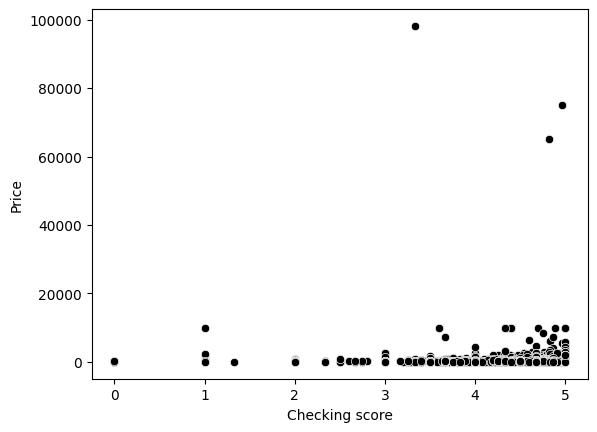

In [1723]:
temp = df.select('review_scores_checkin', 'price', 'price_outlier_removed') \
        .dropna(subset=['review_scores_checkin']) \
        .withColumn('review_scores_checkin', col('review_scores_checkin').cast('float'))

sns.scatterplot(x = 'review_scores_checkin', y = 'price', data = temp.toPandas(), color = 'black') 
plt.xlabel("Checking score")
plt.ylabel("Price")

Lets categorize the values from 0 to 5 with an interval of 0.5 for this column. Then, we can see how price changes with respect to the cleanliness of a rental.

In [1724]:
temp = temp.withColumn(
    "review_scores_checkin",
    when((temp.review_scores_checkin >= bins[0]) & (temp.review_scores_checkin <= bins[1]), labels[0]) \
    .when((temp.review_scores_checkin > bins[1]) & (temp.review_scores_checkin <= bins[2]), labels[1]) \
    .when((temp.review_scores_checkin > bins[2]) & (temp.review_scores_checkin <= bins[3]), labels[2]) \
    .when((temp.review_scores_checkin > bins[3]) & (temp.review_scores_checkin <= bins[4]), labels[3]) \
    .when((temp.review_scores_checkin > bins[4]) & (temp.review_scores_checkin <= bins[5]), labels[4]) \
    .when((temp.review_scores_checkin > bins[5]) & (temp.review_scores_checkin <= bins[6]), labels[5]) \
    .when((temp.review_scores_checkin > bins[6]) & (temp.review_scores_checkin <= bins[7]), labels[6]) \
    .when((temp.review_scores_checkin > bins[7]) & (temp.review_scores_checkin <= bins[8]), labels[7]) \
    .when((temp.review_scores_checkin > bins[8]) & (temp.review_scores_checkin <= bins[9]), labels[8]) \
    .when(temp.review_scores_checkin > bins[9], labels[9]) \
    .otherwise(None)
)

In [1725]:
temp1 = (temp
        .groupBy('review_scores_checkin')
        .agg(median('price').alias('price'))
        .orderBy('review_scores_checkin'))
temp1.show()

+---------------------+-----+
|review_scores_checkin|price|
+---------------------+-----+
|                0-0.5| 80.0|
|                0.5-1|115.0|
|                1-1.5| 95.0|
|                1.5-2| 95.0|
|                2-2.5| 99.5|
|                2.5-3| 99.5|
|                3-3.5|110.0|
|                3.5-4|120.0|
|                4-4.5|121.5|
|                4.5-5|130.0|
+---------------------+-----+



Text(0, 0.5, 'Median Price')

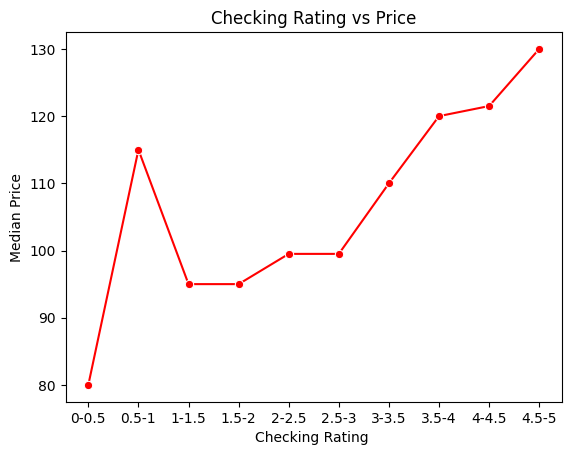

In [1726]:
sns.lineplot(x = 'review_scores_checkin', y = 'price', data = temp1.toPandas(), color = 'red', marker = 'o', )
plt.title("Checking Rating vs Price")
plt.xlabel("Checking Rating ")
plt.ylabel("Median Price")

It is clear that as the review score of a rental's check-in increases, the price also increases. Lets fill null values with mean check-in score and see how the new data's relationship with price varies.


In [1727]:
from pyspark.sql.functions import col, avg

temp = df.select('review_scores_checkin', 'price', 'price_outlier_removed').na.drop()
temp = temp.withColumn('review_scores_checkin', col('review_scores_checkin').cast('float'))
avg = temp.agg(avg('review_scores_checkin')).collect()[0][0];avg

4.8162623025369715

In [1728]:
temp = temp.withColumn('review_scores_checkin', when(col('review_scores_checkin').isNull(), lit(avg)).otherwise(col('review_scores_checkin')))
temp = temp.withColumn('review_scores_checkin', col('review_scores_checkin').cast('float'))

In [1729]:
temp = temp.withColumn(
    "review_scores_checkin",
    when((temp.review_scores_checkin >= bins[0]) & (temp.review_scores_checkin <= bins[1]), labels[0]) \
    .when((temp.review_scores_checkin > bins[1]) & (temp.review_scores_checkin <= bins[2]), labels[1]) \
    .when((temp.review_scores_checkin > bins[2]) & (temp.review_scores_checkin <= bins[3]), labels[2]) \
    .when((temp.review_scores_checkin > bins[3]) & (temp.review_scores_checkin <= bins[4]), labels[3]) \
    .when((temp.review_scores_checkin > bins[4]) & (temp.review_scores_checkin <= bins[5]), labels[4]) \
    .when((temp.review_scores_checkin > bins[5]) & (temp.review_scores_checkin <= bins[6]), labels[5]) \
    .when((temp.review_scores_checkin > bins[6]) & (temp.review_scores_checkin <= bins[7]), labels[6]) \
    .when((temp.review_scores_checkin > bins[7]) & (temp.review_scores_checkin <= bins[8]), labels[7]) \
    .when((temp.review_scores_checkin > bins[8]) & (temp.review_scores_checkin <= bins[9]), labels[8]) \
    .when(temp.review_scores_checkin > bins[9], labels[9]) \
    .otherwise(None)
)

temp1 = (temp
        .groupBy('review_scores_checkin')
        .agg(median('price').alias('price'))
        .orderBy('review_scores_checkin'))

Text(0, 0.5, 'Median Price')

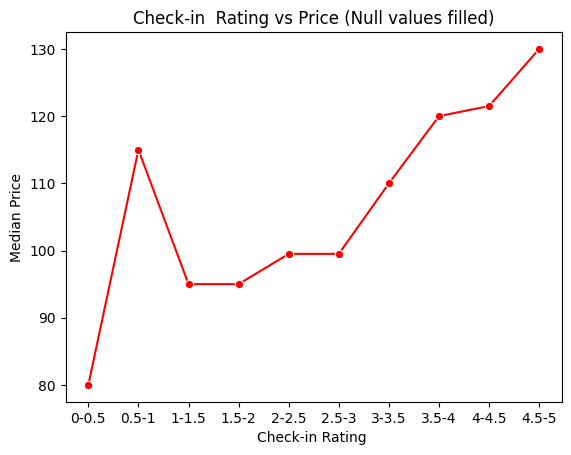

In [1730]:
sns.lineplot(x = 'review_scores_checkin', y = 'price', data = temp1.toPandas(), \
             color = 'red', marker = 'o', )
plt.title("Check-in  Rating vs Price (Null values filled)")
plt.xlabel("Check-in Rating ")
plt.ylabel("Median Price")

The relationship with the price is retained. So, we will proceed to fill null values in this column this way and proceed to use this column for modelling.


In [1731]:
# Fill null values with the average score
df = df.withColumn('review_scores_checkin', when(col('review_scores_checkin').isNull(), lit(avg)).otherwise(col('review_scores_checkin')))
df = df.withColumn('review_scores_checkin', col('review_scores_checkin').cast('float'))

features_for_modelling.append('review_scores_checkin')

In [1732]:
df.select(sum(col('review_scores_checkin').isNull().cast('int'))).collect()[0][0]

0

In [1733]:
df = df.withColumn(
    "review_scores_checkin",
    when((df.review_scores_checkin >= bins[0]) & (df.review_scores_checkin <= bins[1]), labels[0]) \
    .when((df.review_scores_checkin > bins[1]) & (df.review_scores_checkin <= bins[2]), labels[1]) \
    .when((df.review_scores_checkin > bins[2]) & (df.review_scores_checkin <= bins[3]), labels[2]) \
    .when((df.review_scores_checkin > bins[3]) & (df.review_scores_checkin <= bins[4]), labels[3]) \
    .when((df.review_scores_checkin > bins[4]) & (df.review_scores_checkin <= bins[5]), labels[4]) \
    .when((df.review_scores_checkin > bins[5]) & (df.review_scores_checkin <= bins[6]), labels[5]) \
    .when((df.review_scores_checkin > bins[6]) & (df.review_scores_checkin <= bins[7]), labels[6]) \
    .when((df.review_scores_checkin > bins[7]) & (df.review_scores_checkin <= bins[8]), labels[7]) \
    .when((df.review_scores_checkin > bins[8]) & (df.review_scores_checkin <= bins[9]), labels[8]) \
    .when(df.review_scores_checkin > bins[9], labels[9]) \
    .otherwise(None)
)

## `review_scores_communication` vs `Price`

In [1734]:
data_dictionary['review_scores_communication']

'The average communication score for the Airbnb listing.'

In [1735]:
df.select('review_scores_communication').show()

+---------------------------+
|review_scores_communication|
+---------------------------+
|                        4.8|
|                       4.95|
|                        5.0|
|                       4.91|
|                        4.8|
|                       4.45|
|                       4.95|
|                        5.0|
|                       4.92|
|                        5.0|
|                       4.87|
|                        4.6|
|                        5.0|
|                       4.83|
|                       4.78|
|                       4.84|
|                       4.85|
|                       null|
|                       4.52|
|                       4.91|
+---------------------------+
only showing top 20 rows



In [1736]:
df.filter(col("review_scores_communication").isNull()).count() / df.count() * 100

23.682373052753235

Almost 23 % of the values in this column are null. Lets check the relationship with price first before deciding to whether to drop this column or fill null values.

Text(0, 0.5, 'Price')

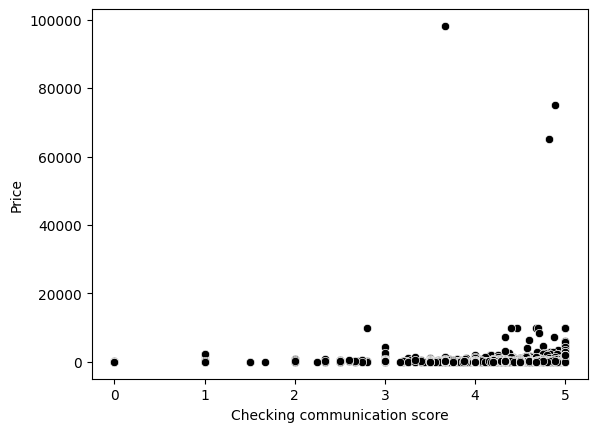

In [1737]:
temp = df.select('review_scores_communication', 'price', 'price_outlier_removed') \
        .dropna(subset=['review_scores_communication']) \
        .withColumn('review_scores_communication', col('review_scores_communication').cast('float'))


sns.scatterplot(x = 'review_scores_communication', y = 'price', data = temp.toPandas(), \
                color = 'black') 
plt.xlabel("Checking communication score")
plt.ylabel("Price")

Lets categorize the values from 0 to 5 with an interval of 0.5 for this column. Then, we can see how price changes with respect to the cleanliness of a rental.

In [1738]:
temp = temp.withColumn(
    "review_scores_communication",
    when((temp.review_scores_communication >= bins[0]) & (temp.review_scores_communication <= bins[1]), labels[0]) \
    .when((temp.review_scores_communication > bins[1]) & (temp.review_scores_communication <= bins[2]), labels[1]) \
    .when((temp.review_scores_communication > bins[2]) & (temp.review_scores_communication <= bins[3]), labels[2]) \
    .when((temp.review_scores_communication > bins[3]) & (temp.review_scores_communication <= bins[4]), labels[3]) \
    .when((temp.review_scores_communication > bins[4]) & (temp.review_scores_communication <= bins[5]), labels[4]) \
    .when((temp.review_scores_communication > bins[5]) & (temp.review_scores_communication <= bins[6]), labels[5]) \
    .when((temp.review_scores_communication > bins[6]) & (temp.review_scores_communication <= bins[7]), labels[6]) \
    .when((temp.review_scores_communication > bins[7]) & (temp.review_scores_communication <= bins[8]), labels[7]) \
    .when((temp.review_scores_communication > bins[8]) & (temp.review_scores_communication <= bins[9]), labels[8]) \
    .when(temp.review_scores_communication > bins[9], labels[9]) \
    .otherwise(None)
)

In [1739]:
temp1 = (temp
        .groupBy('review_scores_communication')
        .agg(median('price').alias('price'))
        .orderBy('review_scores_communication'))
temp1.show()

+---------------------------+-----+
|review_scores_communication|price|
+---------------------------+-----+
|                      0-0.5| 76.5|
|                      0.5-1|100.0|
|                      1-1.5| 36.5|
|                      1.5-2|110.0|
|                      2-2.5| 93.5|
|                      2.5-3|100.5|
|                      3-3.5| 99.0|
|                      3.5-4|115.0|
|                      4-4.5|120.0|
|                      4.5-5|131.0|
+---------------------------+-----+



Text(0, 0.5, 'Median Price')

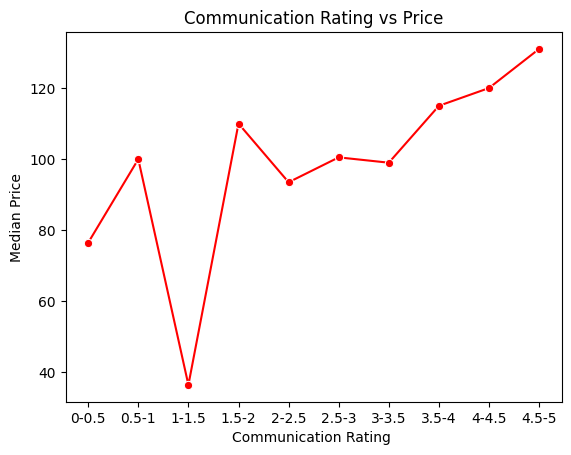

In [1740]:
sns.lineplot(x = 'review_scores_communication', y = 'price', data = temp1.toPandas(), color = 'red', marker = 'o', )
plt.title("Communication Rating vs Price")
plt.xlabel("Communication Rating ")
plt.ylabel("Median Price")

It is clear that as the review score of a rental's communication with hosts increases, the price also increases. Lets fill null values with mean check-in score and see how the new data's relationship with price varies.



In [1741]:
from pyspark.sql.functions import col, avg

temp = df.select('review_scores_communication', 'price', 'price_outlier_removed').na.drop()
temp = temp.withColumn('review_scores_communication', col('review_scores_communication').cast('float'))
avg = temp.agg(avg('review_scores_communication')).collect()[0][0];avg

4.812526416672507

In [1742]:
temp = temp.withColumn('review_scores_communication', when(col('review_scores_communication').isNull(), lit(avg)).otherwise(col('review_scores_communication')))
temp = temp.withColumn('review_scores_communication', col('review_scores_communication').cast('float'))

In [1743]:
temp = temp.withColumn(
    "review_scores_communication",
    when((temp.review_scores_communication >= bins[0]) & (temp.review_scores_communication <= bins[1]), labels[0]) \
    .when((temp.review_scores_communication > bins[1]) & (temp.review_scores_communication <= bins[2]), labels[1]) \
    .when((temp.review_scores_communication > bins[2]) & (temp.review_scores_communication <= bins[3]), labels[2]) \
    .when((temp.review_scores_communication > bins[3]) & (temp.review_scores_communication <= bins[4]), labels[3]) \
    .when((temp.review_scores_communication > bins[4]) & (temp.review_scores_communication <= bins[5]), labels[4]) \
    .when((temp.review_scores_communication > bins[5]) & (temp.review_scores_communication <= bins[6]), labels[5]) \
    .when((temp.review_scores_communication > bins[6]) & (temp.review_scores_communication <= bins[7]), labels[6]) \
    .when((temp.review_scores_communication > bins[7]) & (temp.review_scores_communication <= bins[8]), labels[7]) \
    .when((temp.review_scores_communication > bins[8]) & (temp.review_scores_communication <= bins[9]), labels[8]) \
    .when(temp.review_scores_communication > bins[9], labels[9]) \
    .otherwise(None)
)

temp1 = (temp
        .groupBy('review_scores_communication')
        .agg(median('price').alias('price'))
        .orderBy('review_scores_communication'))
temp1.show()

+---------------------------+-----+
|review_scores_communication|price|
+---------------------------+-----+
|                      0-0.5| 76.5|
|                      0.5-1|100.0|
|                      1-1.5| 36.5|
|                      1.5-2|110.0|
|                      2-2.5| 93.5|
|                      2.5-3|100.5|
|                      3-3.5| 99.0|
|                      3.5-4|115.0|
|                      4-4.5|120.0|
|                      4.5-5|131.0|
+---------------------------+-----+



Text(0, 0.5, 'Median Price')

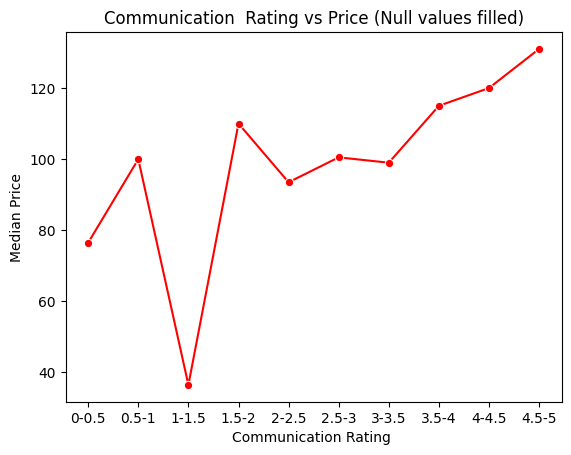

In [1744]:
sns.lineplot(x = 'review_scores_communication', y = 'price', data = temp1.toPandas(), \
             color = 'red', marker = 'o', )
plt.title("Communication  Rating vs Price (Null values filled)")
plt.xlabel("Communication Rating ")
plt.ylabel("Median Price")

The relatuonship with the price is retained. So, we will proceed to fill null values in this column this way and proceed to use this column for modelling.



In [1745]:
# Fill null values with the average score
df = df.withColumn('review_scores_communication', when(col('review_scores_communication').isNull(), lit(avg)).otherwise(col('review_scores_communication')))
df = df.withColumn('review_scores_communication', col('review_scores_communication').cast('float'))

features_for_modelling.append('review_scores_communication')

In [1746]:
df.select(sum(col('review_scores_communication').isNull().cast('int'))).collect()[0][0]

0

In [1747]:
df = df.withColumn(
    "review_scores_communication",
    when((df.review_scores_communication >= bins[0]) & (df.review_scores_communication <= bins[1]), labels[0]) \
    .when((df.review_scores_communication > bins[1]) & (df.review_scores_communication <= bins[2]), labels[1]) \
    .when((df.review_scores_communication > bins[2]) & (df.review_scores_communication <= bins[3]), labels[2]) \
    .when((df.review_scores_communication > bins[3]) & (df.review_scores_communication <= bins[4]), labels[3]) \
    .when((df.review_scores_communication > bins[4]) & (df.review_scores_communication <= bins[5]), labels[4]) \
    .when((df.review_scores_communication > bins[5]) & (df.review_scores_communication <= bins[6]), labels[5]) \
    .when((df.review_scores_communication > bins[6]) & (df.review_scores_communication <= bins[7]), labels[6]) \
    .when((df.review_scores_communication > bins[7]) & (df.review_scores_communication <= bins[8]), labels[7]) \
    .when((df.review_scores_communication > bins[8]) & (df.review_scores_communication <= bins[9]), labels[8]) \
    .when(df.review_scores_communication > bins[9], labels[9]) \
    .otherwise(None)
)

In [1748]:
df.select('review_scores_checkin').distinct().show()

+---------------------+
|review_scores_checkin|
+---------------------+
|                3-3.5|
|                2.5-3|
|                0.5-1|
|                4.5-5|
|                4-4.5|
|                1.5-2|
|                1-1.5|
|                3.5-4|
|                2-2.5|
|                0-0.5|
+---------------------+



## `review_scores_location` vs `Price`

In [1749]:
df.select('review_scores_location').show()

+----------------------+
|review_scores_location|
+----------------------+
|                  4.81|
|                  4.94|
|                  4.67|
|                  4.47|
|                  4.67|
|                  4.88|
|                  4.84|
|                   5.0|
|                  4.94|
|                   5.0|
|                  4.65|
|                   5.0|
|                  4.95|
|                  4.87|
|                  4.88|
|                  4.84|
|                  4.69|
|                  null|
|                  4.03|
|                   4.9|
+----------------------+
only showing top 20 rows



In [1750]:
df.filter(col("review_scores_location").isNull()).count() / df.count() * 100

23.71126574049551

Almost 23 % of the values in this column are null. Lets check the relationship with price first before deciding to whether to drop this column or fill null values.

In [1751]:
temp = df.select('review_scores_location', 'price', 'price_outlier_removed') \
        .dropna(subset=['review_scores_location']) \
        .withColumn('review_scores_location', col('review_scores_location').cast('float'))
temp.show()

+----------------------+-----+---------------------+
|review_scores_location|price|price_outlier_removed|
+----------------------+-----+---------------------+
|                  4.81|175.0|                175.0|
|                  4.94| 75.0|                 75.0|
|                  4.67|275.0|                275.0|
|                  4.47| 60.0|                 60.0|
|                  4.67| 68.0|                 68.0|
|                  4.88| 68.0|                 68.0|
|                  4.84| 62.0|                 62.0|
|                   5.0| 65.0|                 65.0|
|                  4.94|220.0|                220.0|
|                   5.0| 95.0|                 95.0|
|                  4.65|150.0|                150.0|
|                   5.0|395.0|                395.0|
|                  4.95|175.0|                175.0|
|                  4.87|124.0|                124.0|
|                  4.88|124.0|                124.0|
|                  4.84| 55.0|                

Text(0, 0.5, 'Price')

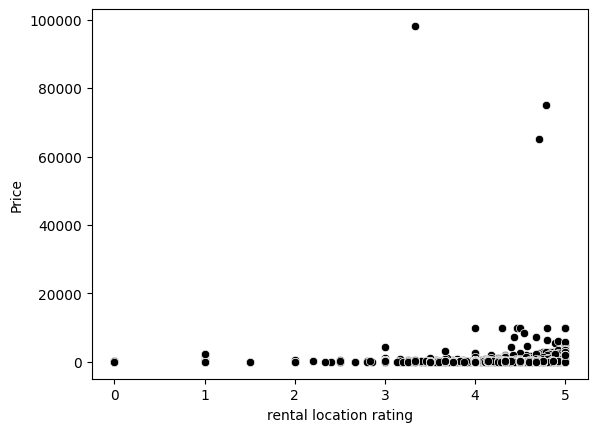

In [1752]:
sns.scatterplot(x = 'review_scores_location', y = 'price', data = temp.toPandas(), color = 'black') 
plt.xlabel("rental location rating")
plt.ylabel("Price")

Lets categorize the values from 0 to 5 with an interval of 0.5 for this column. Then, we can see how price changes with respect to the cleanliness of a rental.



In [1753]:
temp = temp.withColumn(
    "review_scores_location",
    when((temp.review_scores_location >= bins[0]) & (temp.review_scores_location <= bins[1]), labels[0]) \
    .when((temp.review_scores_location > bins[1]) & (temp.review_scores_location <= bins[2]), labels[1]) \
    .when((temp.review_scores_location > bins[2]) & (temp.review_scores_location <= bins[3]), labels[2]) \
    .when((temp.review_scores_location > bins[3]) & (temp.review_scores_location <= bins[4]), labels[3]) \
    .when((temp.review_scores_location > bins[4]) & (temp.review_scores_location <= bins[5]), labels[4]) \
    .when((temp.review_scores_location > bins[5]) & (temp.review_scores_location <= bins[6]), labels[5]) \
    .when((temp.review_scores_location > bins[6]) & (temp.review_scores_location <= bins[7]), labels[6]) \
    .when((temp.review_scores_location > bins[7]) & (temp.review_scores_location <= bins[8]), labels[7]) \
    .when((temp.review_scores_location > bins[8]) & (temp.review_scores_location <= bins[9]), labels[8]) \
    .when(temp.review_scores_location > bins[9], labels[9]) \
    .otherwise(None)
)

In [1754]:
temp1 = (temp
        .groupBy('review_scores_location')
        .agg(median('price').alias('price'))
        .orderBy('review_scores_location'))
temp1.show()

+----------------------+-----+
|review_scores_location|price|
+----------------------+-----+
|                 0-0.5| 80.0|
|                 0.5-1|107.0|
|                 1-1.5| 42.5|
|                 1.5-2| 62.0|
|                 2-2.5| 80.0|
|                 2.5-3| 85.0|
|                 3-3.5|102.5|
|                 3.5-4|100.0|
|                 4-4.5|100.0|
|                 4.5-5|139.0|
+----------------------+-----+



Text(0, 0.5, 'Median Price')

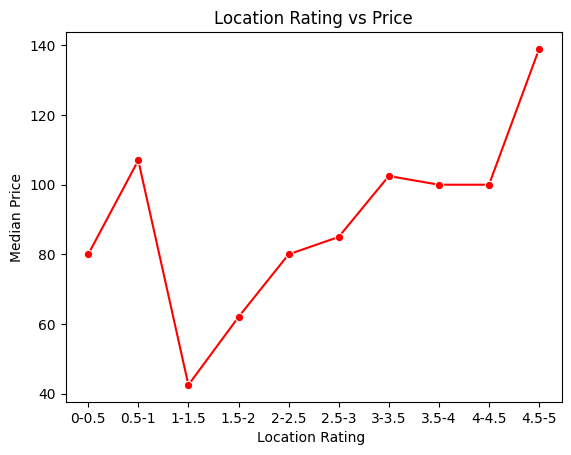

In [1755]:
sns.lineplot(x = 'review_scores_location', y = 'price', data = temp1.toPandas(), \
             color = 'red', marker = 'o', )
plt.title("Location Rating vs Price")
plt.xlabel("Location Rating ")
plt.ylabel("Median Price")

It is clear that as the review score of a rental's location increases, the price also increases. Lets fill null values with mean check-in score and see how the new data's relationship with price varies.



In [1756]:
from pyspark.sql.functions import col, avg

temp = df.select('review_scores_location', 'price', 'price_outlier_removed').na.drop()
temp = temp.withColumn('review_scores_location', col('review_scores_location').cast('float'))
avg = temp.agg(avg('review_scores_location')).collect()[0][0];avg

4.737530694287038

In [1757]:
temp = temp.withColumn(
    "review_scores_location",
    when((temp.review_scores_location >= bins[0]) & (temp.review_scores_location <= bins[1]), labels[0]) \
    .when((temp.review_scores_location > bins[1]) & (temp.review_scores_location <= bins[2]), labels[1]) \
    .when((temp.review_scores_location > bins[2]) & (temp.review_scores_location <= bins[3]), labels[2]) \
    .when((temp.review_scores_location > bins[3]) & (temp.review_scores_location <= bins[4]), labels[3]) \
    .when((temp.review_scores_location > bins[4]) & (temp.review_scores_location <= bins[5]), labels[4]) \
    .when((temp.review_scores_location > bins[5]) & (temp.review_scores_location <= bins[6]), labels[5]) \
    .when((temp.review_scores_location > bins[6]) & (temp.review_scores_location <= bins[7]), labels[6]) \
    .when((temp.review_scores_location > bins[7]) & (temp.review_scores_location <= bins[8]), labels[7]) \
    .when((temp.review_scores_location > bins[8]) & (temp.review_scores_location <= bins[9]), labels[8]) \
    .when(temp.review_scores_location > bins[9], labels[9]) \
    .otherwise(None)
)

temp1 = (temp
        .groupBy('review_scores_location')
        .agg(median('price').alias('price'))
        .orderBy('review_scores_location'))
temp1.show()

+----------------------+-----+
|review_scores_location|price|
+----------------------+-----+
|                 0-0.5| 80.0|
|                 0.5-1|107.0|
|                 1-1.5| 42.5|
|                 1.5-2| 62.0|
|                 2-2.5| 80.0|
|                 2.5-3| 85.0|
|                 3-3.5|102.5|
|                 3.5-4|100.0|
|                 4-4.5|100.0|
|                 4.5-5|139.0|
+----------------------+-----+



Text(0, 0.5, 'Median Price')

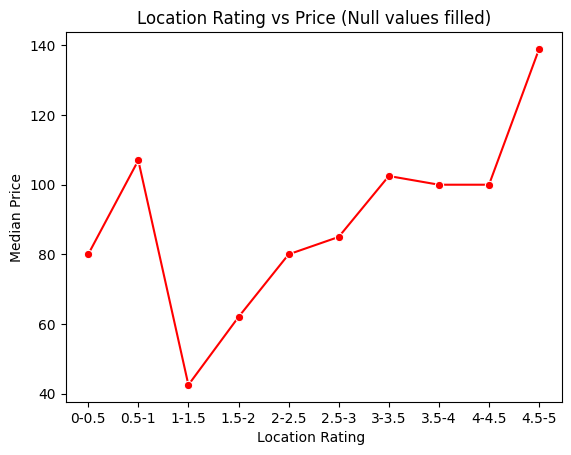

In [1758]:
sns.lineplot(x = 'review_scores_location', y = 'price', data = temp1.toPandas(),\
              color = 'red', marker = 'o', )
plt.title("Location Rating vs Price (Null values filled)")
plt.xlabel("Location Rating ")
plt.ylabel("Median Price")

The relatuonship with the price is retained. So, we will proceed to fill null values in this column this way and proceed to use this column for modelling.

In [1759]:
df = df.withColumn('review_scores_location', when(col('review_scores_location').isNull(), lit(avg)).otherwise(col('review_scores_location')))
df = df.withColumn('review_scores_location', col('review_scores_location').cast('float'))

features_for_modelling.append('review_scores_location')

In [1760]:
df.select(sum(col('review_scores_location').isNull().cast('int'))).collect()[0][0]

0

In [1761]:
df = df.withColumn(
    "review_scores_location",
    when((df.review_scores_location >= bins[0]) & (df.review_scores_location <= bins[1]), labels[0]) \
    .when((df.review_scores_location > bins[1]) & (df.review_scores_location <= bins[2]), labels[1]) \
    .when((df.review_scores_location > bins[2]) & (df.review_scores_location <= bins[3]), labels[2]) \
    .when((df.review_scores_location > bins[3]) & (df.review_scores_location <= bins[4]), labels[3]) \
    .when((df.review_scores_location > bins[4]) & (df.review_scores_location <= bins[5]), labels[4]) \
    .when((df.review_scores_location > bins[5]) & (df.review_scores_location <= bins[6]), labels[5]) \
    .when((df.review_scores_location > bins[6]) & (df.review_scores_location <= bins[7]), labels[6]) \
    .when((df.review_scores_location > bins[7]) & (df.review_scores_location <= bins[8]), labels[7]) \
    .when((df.review_scores_location > bins[8]) & (df.review_scores_location <= bins[9]), labels[8]) \
    .when(df.review_scores_location > bins[9], labels[9]) \
    .otherwise(None)
)

df.select('review_scores_location').distinct().show()

+----------------------+
|review_scores_location|
+----------------------+
|                 3-3.5|
|                 2.5-3|
|                 0.5-1|
|                 4.5-5|
|                 4-4.5|
|                 1.5-2|
|                 1-1.5|
|                 3.5-4|
|                 2-2.5|
|                 0-0.5|
+----------------------+



## `review_scores_value` vs `Price`

The review_scores_value column could also be a useful feature for predicting rental price. This column represents how much guests feel they got for their money in terms of the property's quality and amenities. Properties with higher ratings in this category may be able to command higher prices, especially if they are in a desirable location or have other attractive features.

In [1762]:
df.select('review_scores_value').show()

+-------------------+
|review_scores_value|
+-------------------+
|                4.4|
|               4.92|
|                5.0|
|               4.52|
|               4.56|
|               4.39|
|               4.85|
|                5.0|
|               4.81|
|                5.0|
|               4.75|
|                4.8|
|               4.58|
|               4.74|
|               4.74|
|                4.9|
|               4.52|
|               null|
|               4.36|
|               4.86|
+-------------------+
only showing top 20 rows



In [1763]:
df.filter(col("review_scores_value").isNull()).count() / df.count() * 100

23.71126574049551

Text(0, 0.5, 'Price')

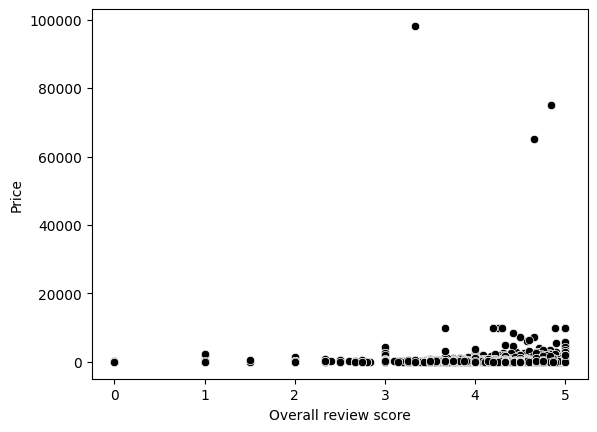

In [1764]:
temp = df.select('review_scores_value', 'price', 'price_outlier_removed') \
        .dropna(subset=['review_scores_value']) \
        .withColumn('review_scores_value', col('review_scores_value').cast('float'))


sns.scatterplot(x = 'review_scores_value', y = 'price', data = temp.toPandas(), \
                color = 'black') 
plt.xlabel("Overall review score")
plt.ylabel("Price")

Lets categorize the values from 0 to 5 with an interval of 0.5 for this column. Then, we can see how price changes with respect to the cleanliness of a rental.



In [1765]:
temp = temp.withColumn(
    "review_scores_value",
    when((temp.review_scores_value >= bins[0]) & (temp.review_scores_value <= bins[1]), labels[0]) \
    .when((temp.review_scores_value > bins[1]) & (temp.review_scores_value <= bins[2]), labels[1]) \
    .when((temp.review_scores_value > bins[2]) & (temp.review_scores_value <= bins[3]), labels[2]) \
    .when((temp.review_scores_value > bins[3]) & (temp.review_scores_value <= bins[4]), labels[3]) \
    .when((temp.review_scores_value > bins[4]) & (temp.review_scores_value <= bins[5]), labels[4]) \
    .when((temp.review_scores_value > bins[5]) & (temp.review_scores_value <= bins[6]), labels[5]) \
    .when((temp.review_scores_value > bins[6]) & (temp.review_scores_value <= bins[7]), labels[6]) \
    .when((temp.review_scores_value > bins[7]) & (temp.review_scores_value <= bins[8]), labels[7]) \
    .when((temp.review_scores_value > bins[8]) & (temp.review_scores_value <= bins[9]), labels[8]) \
    .when(temp.review_scores_value > bins[9], labels[9]) \
    .otherwise(None)
)

In [1766]:
temp1 = (temp
        .groupBy('review_scores_value')
        .agg(median('price').alias('price'))
        .orderBy('review_scores_value'))
temp1.show()

+-------------------+-----+
|review_scores_value|price|
+-------------------+-----+
|              0-0.5| 75.0|
|              0.5-1|113.0|
|              1-1.5| 95.0|
|              1.5-2| 80.0|
|              2-2.5|108.5|
|              2.5-3|115.0|
|              3-3.5|121.5|
|              3.5-4|125.0|
|              4-4.5|132.0|
|              4.5-5|130.0|
+-------------------+-----+



Text(0, 0.5, 'Median Price')

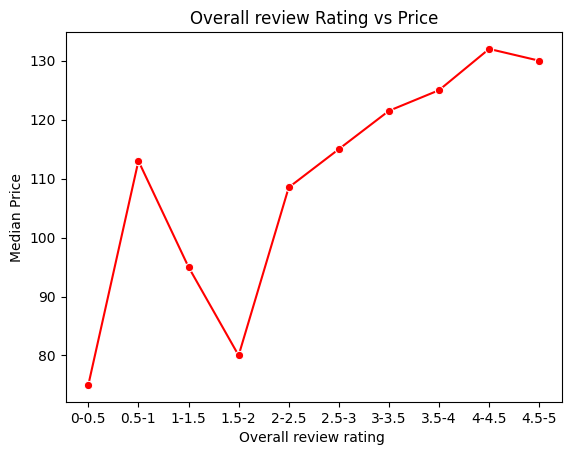

In [1767]:
sns.lineplot(x = 'review_scores_value', y = 'price', data = temp1.toPandas(), \
             color = 'red', marker = 'o', )
plt.title("Overall review Rating vs Price")
plt.xlabel("Overall review rating ")
plt.ylabel("Median Price")

It is clear that as the overall review score of a rental increases, the price also increases. Lets fill null values with mean check-in score and see how the new data's relationship with price varies.



In [1768]:
from pyspark.sql.functions import col, avg

temp = df.select('review_scores_value', 'price', 'price_outlier_removed').na.drop()
temp = temp.withColumn('review_scores_value', col('review_scores_value').cast('float'))
avg = temp.agg(avg('review_scores_value')).collect()[0][0];avg

4.6467350542310175

In [1769]:
temp = temp.withColumn('review_scores_value', when(col('review_scores_value').isNull(), lit(avg)).otherwise(col('review_scores_value')))
temp = temp.withColumn('review_scores_value', col('review_scores_value').cast('float'))

In [1770]:
temp = temp.withColumn(
    "review_scores_value",
    when((temp.review_scores_value >= bins[0]) & (temp.review_scores_value <= bins[1]), labels[0]) \
    .when((temp.review_scores_value > bins[1]) & (temp.review_scores_value <= bins[2]), labels[1]) \
    .when((temp.review_scores_value > bins[2]) & (temp.review_scores_value <= bins[3]), labels[2]) \
    .when((temp.review_scores_value > bins[3]) & (temp.review_scores_value <= bins[4]), labels[3]) \
    .when((temp.review_scores_value > bins[4]) & (temp.review_scores_value <= bins[5]), labels[4]) \
    .when((temp.review_scores_value > bins[5]) & (temp.review_scores_value <= bins[6]), labels[5]) \
    .when((temp.review_scores_value > bins[6]) & (temp.review_scores_value <= bins[7]), labels[6]) \
    .when((temp.review_scores_value > bins[7]) & (temp.review_scores_value <= bins[8]), labels[7]) \
    .when((temp.review_scores_value > bins[8]) & (temp.review_scores_value <= bins[9]), labels[8]) \
    .when(temp.review_scores_value > bins[9], labels[9]) \
    .otherwise(None)
)

temp1 = (temp
        .groupBy('review_scores_value')
        .agg(median('price').alias('price'))
        .orderBy('review_scores_value'))
temp1.show()

+-------------------+-----+
|review_scores_value|price|
+-------------------+-----+
|              0-0.5| 75.0|
|              0.5-1|113.0|
|              1-1.5| 95.0|
|              1.5-2| 80.0|
|              2-2.5|108.5|
|              2.5-3|115.0|
|              3-3.5|121.5|
|              3.5-4|125.0|
|              4-4.5|132.0|
|              4.5-5|130.0|
+-------------------+-----+



Text(0, 0.5, 'Median Price')

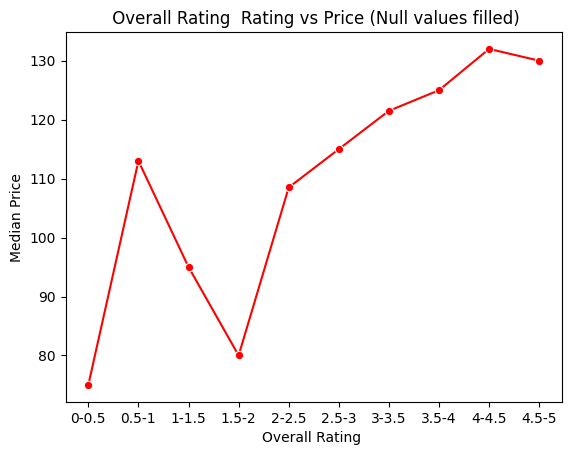

In [1771]:
sns.lineplot(x = 'review_scores_value', y = 'price', data = temp1.toPandas(),\
              color = 'red', marker = 'o', )
plt.title(" Overall Rating  Rating vs Price (Null values filled)")
plt.xlabel("Overall Rating ")
plt.ylabel("Median Price")

The relatuonship with the price is retained. So, we will proceed to fill null values in this column this way and proceed to use this column for modelling.



In [1772]:
# Fill null values with the average score
df = df.withColumn('review_scores_value', when(col('review_scores_value').isNull(), lit(avg)).otherwise(col('review_scores_value')))
df = df.withColumn('review_scores_value', col('review_scores_value').cast('float'))

features_for_modelling.append('review_scores_value')

In [1773]:
df.select(sum(col('review_scores_value').isNull().cast('int'))).collect()[0][0]

0

In [1774]:
df = df.withColumn(
    "review_scores_value",
    when((df.review_scores_value >= bins[0]) & (df.review_scores_value <= bins[1]), labels[0]) \
    .when((df.review_scores_value > bins[1]) & (df.review_scores_value <= bins[2]), labels[1]) \
    .when((df.review_scores_value > bins[2]) & (df.review_scores_value <= bins[3]), labels[2]) \
    .when((df.review_scores_value > bins[3]) & (df.review_scores_value <= bins[4]), labels[3]) \
    .when((df.review_scores_value > bins[4]) & (df.review_scores_value <= bins[5]), labels[4]) \
    .when((df.review_scores_value > bins[5]) & (df.review_scores_value <= bins[6]), labels[5]) \
    .when((df.review_scores_value > bins[6]) & (df.review_scores_value <= bins[7]), labels[6]) \
    .when((df.review_scores_value > bins[7]) & (df.review_scores_value <= bins[8]), labels[7]) \
    .when((df.review_scores_value > bins[8]) & (df.review_scores_value <= bins[9]), labels[8]) \
    .when(df.review_scores_value > bins[9], labels[9]) \
    .otherwise(None)
)

In [1775]:
df.select('review_scores_value').distinct().show()

+-------------------+
|review_scores_value|
+-------------------+
|              3-3.5|
|              2.5-3|
|              0.5-1|
|              4.5-5|
|              4-4.5|
|              1.5-2|
|              1-1.5|
|              3.5-4|
|              2-2.5|
|              0-0.5|
+-------------------+



## `instant_bookable` vs `Price`

In [1776]:
total_rows = df.count()
result = df.groupBy('instant_bookable').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+----------------+-----+------------------+
|instant_bookable|count|        percentage|
+----------------+-----+------------------+
|               f|33123| 79.75104134062072|
|               t| 8410|20.248958659379287|
+----------------+-----+------------------+



It looks like almost 80 % of all airbnb rentals in NYC were not instantly bookable. Perhaps this results in some variation in price. Lets check the variation.

<b> Replacing t with 1 and f with 0.

In [1777]:
from pyspark.sql.functions import when

df = df.withColumn('instant_bookable', when(df['instant_bookable'] == 't', True).otherwise(False))

In [1778]:
total_rows = df.count()
result = df.groupBy('instant_bookable').count().orderBy(desc('count'))
result.withColumn('percentage', result['count'] / total_rows * 100).show()

+----------------+-----+------------------+
|instant_bookable|count|        percentage|
+----------------+-----+------------------+
|           false|33123| 79.75104134062072|
|            true| 8410|20.248958659379287|
+----------------+-----+------------------+



In [1779]:
df.filter(df.instant_bookable.isNull()).count()  

0

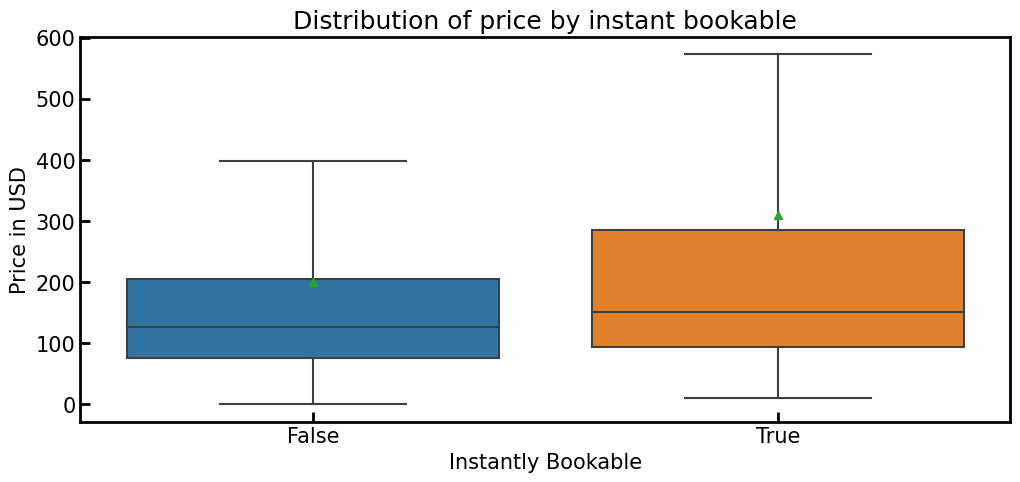

In [1780]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(x='instant_bookable', y='price', data = df.toPandas(), showfliers = False, showmeans = True,
)
plt.title('Distribution of price by instant bookable', fontsize = 18)
plt.xlabel("Instantly Bookable", fontsize = 15)
plt.ylabel("Price in USD", fontsize = 15)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

plt.savefig("InstantlyBooable_vs_price.jpg", dpi = 500)


We can clearly see that the rentals that have instantly booking feature tend to have higher price than the rentals that were not instantly bookable. This column will be super useful for modelling purpose.

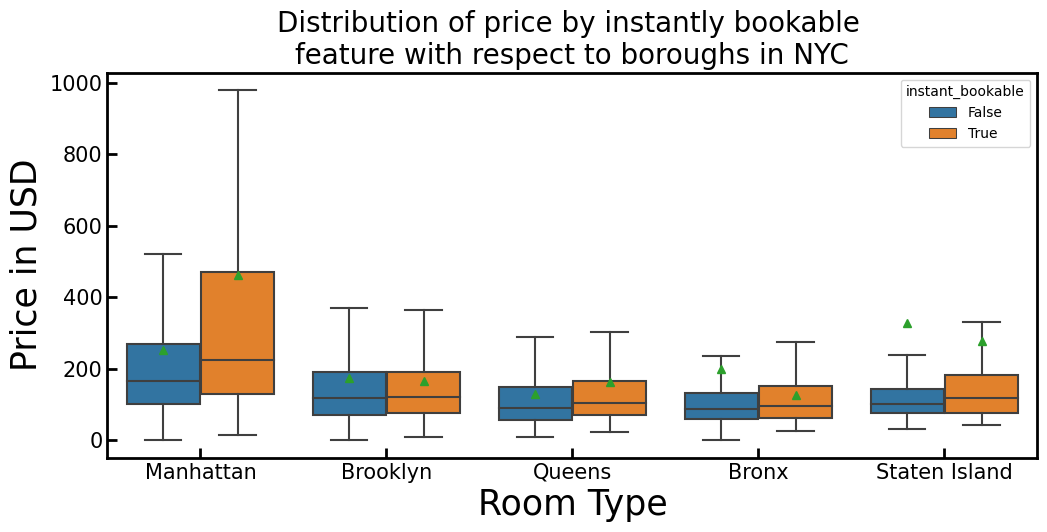

In [1781]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))

ax = plt.subplot(1, 1, 1)
sns.boxplot(x='neighbourhood_group_cleansed', y='price', hue = 'instant_bookable',data = df.toPandas(), \
            showfliers = False, showmeans = True)
plt.title('Distribution of price by instantly bookable \nfeature with respect to boroughs in NYC', fontsize = 20)
plt.xlabel("Room Type", fontsize = 25)
plt.ylabel("Price in USD", fontsize = 25)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')
plt.savefig("InstantlyBooable_basedonBoroughs_vs_price.jpg", dpi = 500)


We can clearly see that the majority of instantly bookable rentals were present in manhattan. It could also be the reasons why on average, the prices in manhattan was simply the highest. We will use this column for modelling purpose.

In [1782]:
features_for_modelling.append('instant_bookable')

# Modelling

## All of the data loading, processing and cleaning was done using PySpark dataframe. Now, for modelling purpose, we will be using scikit-learn library. Pandas dataframe best integrates with scikit-learn, which is why the cleaned PySpark dataframe will be converted to pandas dataframe in the next step for the sake of modelling purpose.

In [1783]:
'''
CONVERTNG PYSPARK DATAFRAME TO PANDAS DATAFRAME FOR EASIER ALGORITHMS IMPLEMENTATION

'''

df = df.toPandas() 

In [1789]:
df_copy = df.copy()

In [1800]:
df = df[a[0].split(",")]

In [1801]:
df['baths'] = df['baths'].fillna(1.0)

In [1804]:
df = df[features_for_modelling]

In [1805]:
df.isnull().sum()

host_response_time              0
host_is_superhost               0
host_identity_verified          0
neighbourhood_group_cleansed    0
room_type                       0
accommodates                    0
beds                            0
price                           0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
instant_bookable                0
bedrooms                        0
price_outlier_removed           0
bathroom_type                   0
baths                           0
safety                          0
kitchen                         0
entertainment                   0
climate_control                 0
wifi                            0
Ratings                         0
dtype: int64

<b> Lets remove columns that are of no use to us anymore.

In [1806]:
df.drop('price_outlier_removed', axis = 1, inplace = True)

In [1807]:
df.columns.shape

(23,)

In [1808]:
df.columns

Index(['host_response_time', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_group_cleansed', 'room_type', 'accommodates', 'beds',
       'price', 'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'bedrooms', 'bathroom_type',
       'baths', 'safety', 'kitchen', 'entertainment', 'climate_control',
       'wifi', 'Ratings'],
      dtype='object')

In [1809]:
df.shape

(41533, 23)

In [1810]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [1811]:
df.host_is_superhost = df.host_is_superhost.apply(lambda x : 1 if x == True else 0)
df.host_identity_verified = df.host_identity_verified.apply(lambda x : 1 if x == True else 0)

In [1812]:
categorical_features = df.select_dtypes(object).columns
numerical_features = df.select_dtypes([int, float]).columns

In [1813]:
numerical_features

Index(['host_is_superhost', 'host_identity_verified', 'accommodates', 'beds',
       'bedrooms', 'baths', 'safety', 'kitchen', 'entertainment',
       'climate_control', 'wifi'],
      dtype='object')

In [1814]:
categorical_features

Index(['host_response_time', 'neighbourhood_group_cleansed', 'room_type',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'bathroom_type', 'Ratings'],
      dtype='object')

Text(0.5, 1.0, 'Pearson Correlation Coef.')

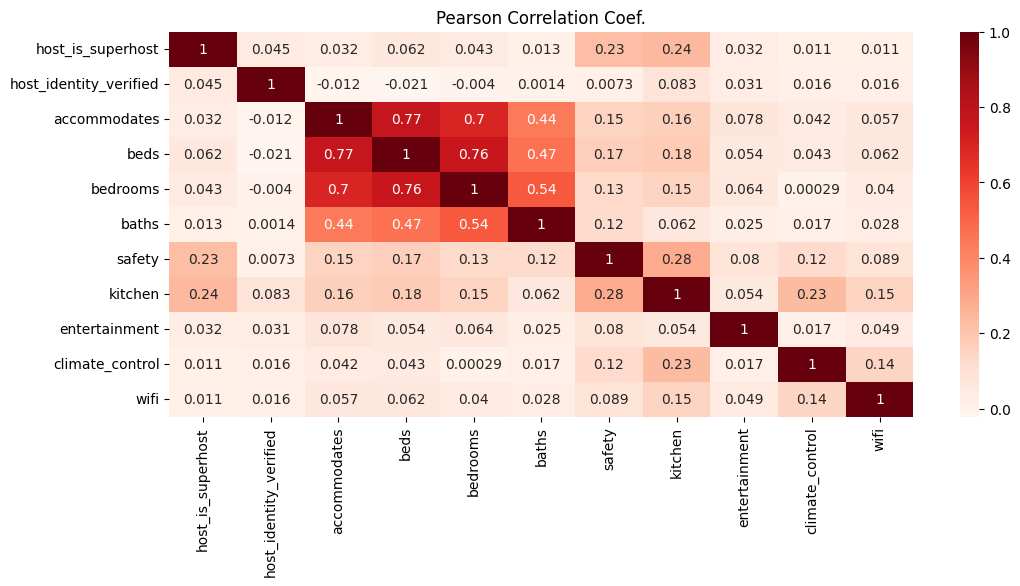

In [1815]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df[numerical_features].corr(method = 'pearson'), cmap = 'Reds', annot = True, ax = ax)
plt.title("Pearson Correlation Coef.")

Text(0.5, 1.0, 'Kendall Correlation Coef.')

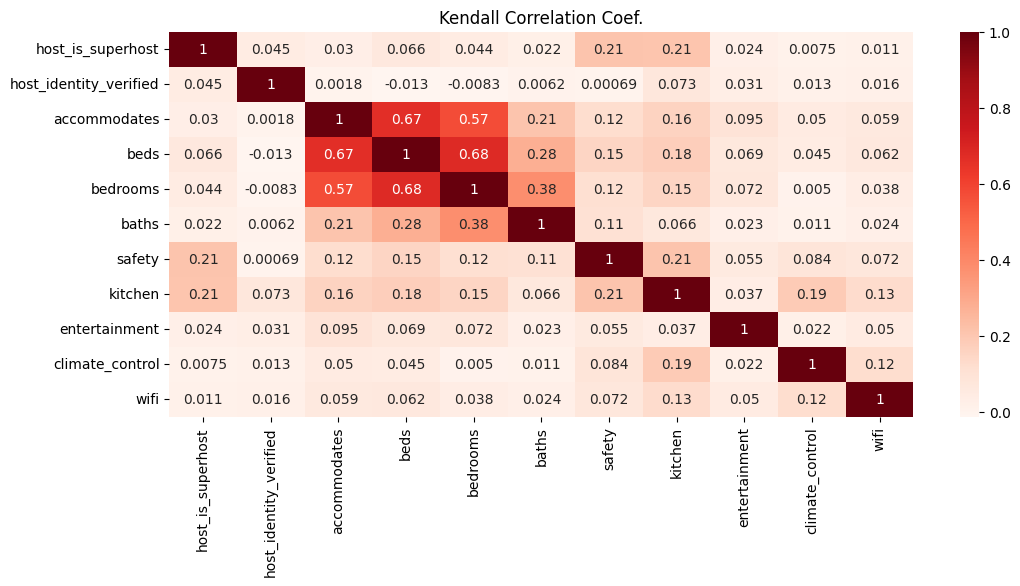

In [1816]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(df[numerical_features].corr(method = 'kendall'), cmap = 'Reds', annot = True, ax = ax)
plt.title("Kendall Correlation Coef.")

In [1817]:
onehot_encoder = OneHotEncoder()

In [1818]:
df

host_response_time  host_is_superhost  host_identity_verified  \
0            within a day                  0                       1   
1                 Unknown                  0                       1   
2                 Unknown                  0                       1   
3            within a day                  1                       1   
4          within an hour                  0                       1   
...                   ...                ...                     ...   
41528      within an hour                  0                       1   
41529  within a few hours                  0                       1   
41530      within an hour                  0                       1   
41531             Unknown                  0                       1   
41532  within a few hours                  0                       1   

      neighbourhood_group_cleansed        room_type  accommodates  beds  \
0                        Manhattan  Entire home/apt             1     1   
1                        Manhattan     Private room             1     1   
2                         Brooklyn  Entire home/apt             4     2   
3                         Brooklyn     Private room             2     1   
4                         Brooklyn  Entire home/apt             3     1   
...                            ...              ...           ...   ...   
41528                        Bronx  Entire home/apt             4     2   
41529                       Queens     Private room             2     1   
41530                    Manhattan     Private room             2     1   
41531                        Bronx  Entire home/apt             4     2   
41532                    Manhattan  Entire home/apt             6     3   

        price review_scores_cleanliness review_scores_checkin  ...  \
0       175.0                     4.5-5                 4.5-5  ...   
1        75.0                     4.5-5                 4.5-5  ...   
2       275.0                     4.5-5                 4.5-5  ...   
3        60.0                     4-4.5                 4.5-5  ...   
4        68.0                     4.5-5                 4.5-5  ...   
...       ...                       ...                   ...  ...   
41528   105.0                     4.5-5                 4.5-5  ...   
41529    87.0                     4.5-5                 4.5-5  ...   
41530    70.0                     4.5-5                 4.5-5  ...   
41531   125.0                     4.5-5                 4.5-5  ...   
41532  1114.0                     4.5-5                 4.5-5  ...   

      instant_bookable bedrooms bathroom_type  baths  safety kitchen  \
0                False        1       private    1.0       3       8   
1                False        1        shared    1.0       3       0   
2                False        2       private    1.5       2       2   
3                False        1       private    1.0       0       1   
4                False        1       private    1.0       3       9   
...                ...      ...           ...    ...     ...     ...   
41528            False        2       private    1.0       1       1   
41529             True        1       private    1.0       2       1   
41530             True        1        shared    1.5       3       4   
41531             True        2       private    1.0       4       1   
41532             True        2       private    2.0       4      10   

       entertainment  climate_control  wifi  Ratings  
0                  1                3     2    4.5-5  
1                  0                3     1    4.5-5  
2                  3                2     1    4.5-5  
3                  0                2     1    4.5-5  
4                  1                3     1    4.5-5  
...              ...              ...   ...      ...  
41528              0                0     1    4.5-5  
41529              1                1     1    4.5-5  
41530              0                2   

In [1819]:
encoded = onehot_encoder.fit_transform(df[categorical_features]).toarray()

In [1820]:
encoded

array([[0., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [1821]:
categories = [j for i in (i for i in onehot_encoder.categories_) for j in i]

In [1149]:
df = df.drop(categorical_features, axis = 1)

In [1150]:
df[categories] = encoded

In [1151]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [906]:
# df['price'] = price

In [907]:
price_categories = {
'Budget': '0-50',
'Standard': '51-200',
'Premium': '201-350',
'Luxury': '351-500',
'Ultra-Luxury': '501+'
}

bins = [-10, 50, 200, 350, 500,float('inf')]
labels = ['0-50', '51-200','201-350', '351-500','501+']

df['price'] = pd.cut(df['price'], bins=bins, labels=labels)
targets = df['price'].copy()
targets = dict(targets.value_counts())
df['price'] = [labels.index(i) for i in df.price]

In [908]:
df.price.value_counts()

1    25823
2     6928
0     4193
4     2452
3     2132
Name: price, dtype: int64

In [909]:
targets

{'51-200': 25823, '201-350': 6928, '0-50': 4193, '501+': 2452, '351-500': 2132}

In [910]:
targets.get('201-350', 0)

6928

In [911]:
categories = []
n_samples = []

for category, price_range in price_categories.items():
    count = targets.get(price_range, 0)
    print(f"{category}: {count}")
    categories.append(category)
    n_samples.append(count)

Budget: 4193
Standard: 25823
Premium: 6928
Luxury: 2132
Ultra-Luxury: 2452


In [912]:
count

2452

In [913]:
n_samples

[4193, 25823, 6928, 2132, 2452]

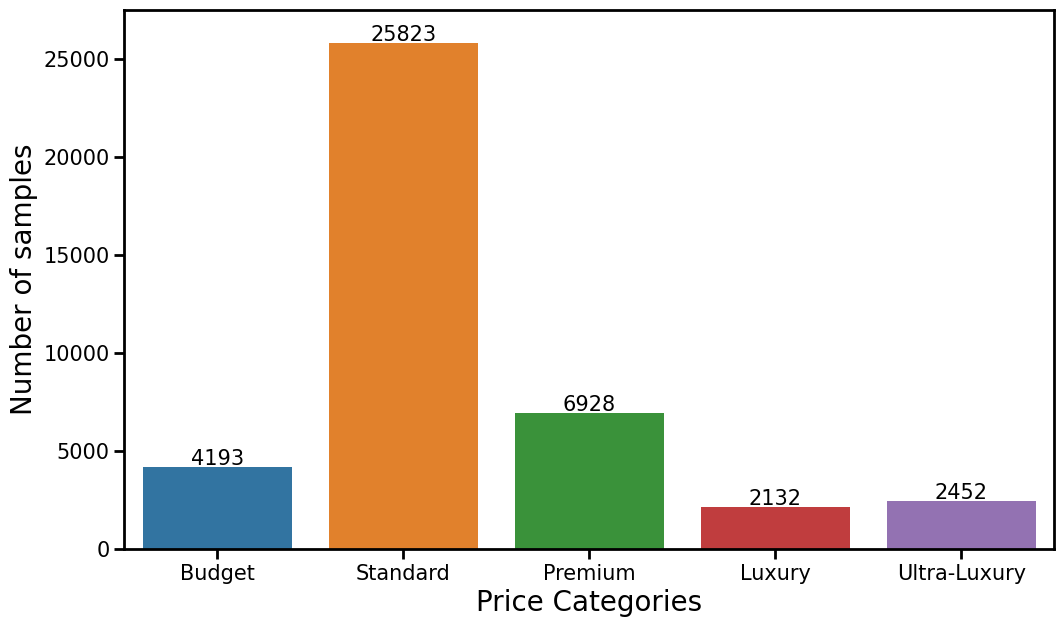

In [914]:
fig, ax = plt.subplots(figsize=(12, 7))
sns.barplot(x = categories, y = n_samples, ax = ax)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

ax.set_ylim([0, 27500])
# Add labels on each bar
for i, v in enumerate(n_samples):
    ax.text(i, v + 100, str(v), color='black', fontweight='normal', ha='center', fontsize=15)


# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'out')

# plt.legend(loc = 'best', fontsize = 20)
plt.xlabel("Price Categories", fontsize = 20
          )
plt.ylabel("Number of samples", fontsize = 20)
plt.savefig("Number_of_samples",dpi = 500)
plt.show()


In [915]:
encoder = LabelEncoder()

In [916]:
df['review_scores_cleanliness'] = encoder.fit_transform(df['review_scores_cleanliness'])
df['review_scores_checkin'] = encoder.fit_transform(df['review_scores_checkin'])
df['review_scores_communication'] = encoder.fit_transform(df['review_scores_communication'])
df['review_scores_location'] = encoder.fit_transform(df['review_scores_location'])
df['review_scores_value'] = encoder.fit_transform(df['review_scores_value'])
df['Ratings'] = encoder.fit_transform(df['Ratings'])
df['instant_bookable'] = encoder.fit_transform(df['instant_bookable'])

In [919]:
df.shape

(41528, 35)

# Feature Selection 

In [920]:
original_price = df.price.copy()

In [921]:
df.drop('price', axis = 1, inplace = True)

In [922]:
df['price'] = original_price

In [923]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.columns[:-1]] = scaler.fit_transform(df[df.columns[:-1]])

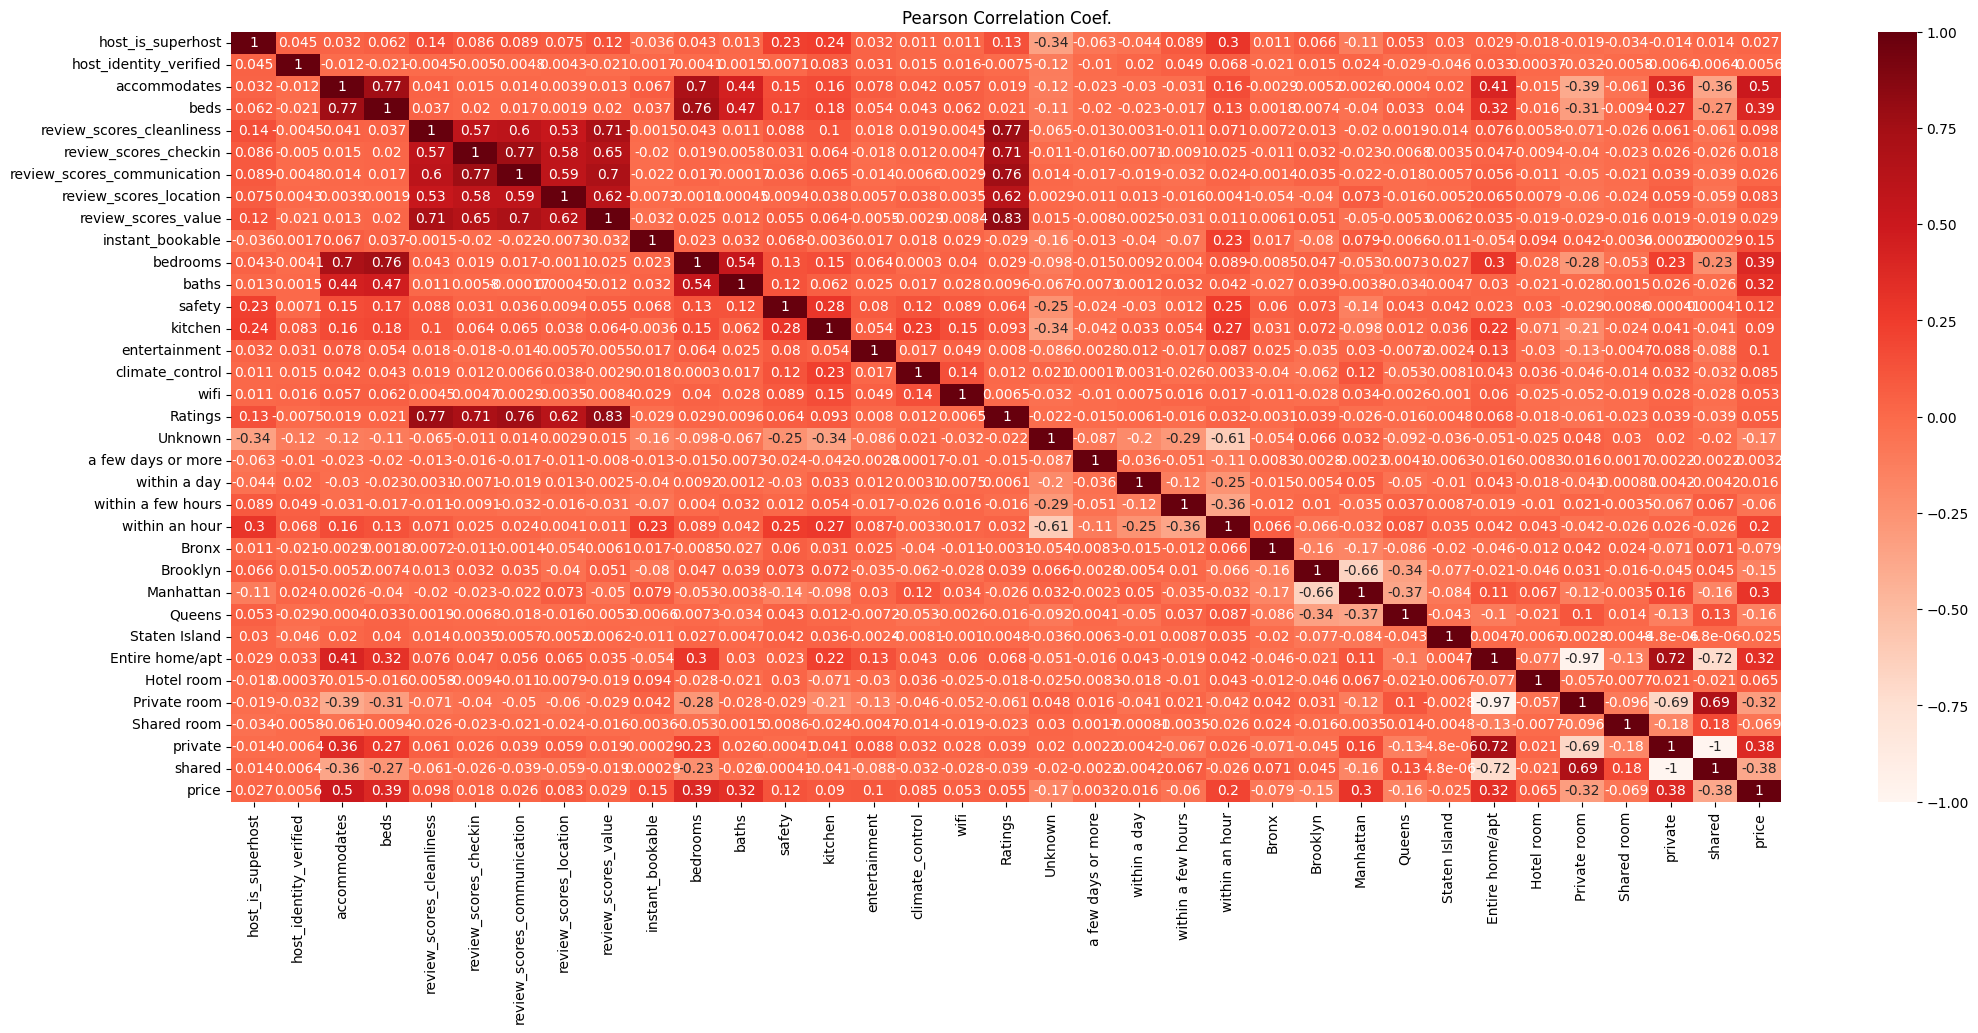

In [924]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(df.corr(method = 'pearson'), cmap = 'Reds', annot = True, ax = ax)
plt.title("Pearson Correlation Coef.")
plt.show()

In [925]:
X = df.drop('price', axis = 1)
y = df.price

## Univariate Feature Selection

In [926]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.datasets import load_iris

# Select the top 2 features using f_classif as scoring function
k_best = SelectKBest(score_func=f_classif, k=X.shape[1])
X_new = k_best.fit_transform(X, y)

# Get the scores of all features
all_scores = k_best.scores_

# Get the importances of the selected features
selected_features = k_best.get_support(indices=True)
selected_scores = all_scores[selected_features]

importances= {}
# Print the selected features and their importances
for feature, score in zip(selected_features, selected_scores):
    # print(f"Feature {feature}: importance score = {score}")
    importances[X.columns[feature]] = score

In [678]:
importances = pd.DataFrame(importances, index=range(0, len(importances))).drop_duplicates().T.reset_index()
importances.columns = ['Features', 'Univariate_Imp']

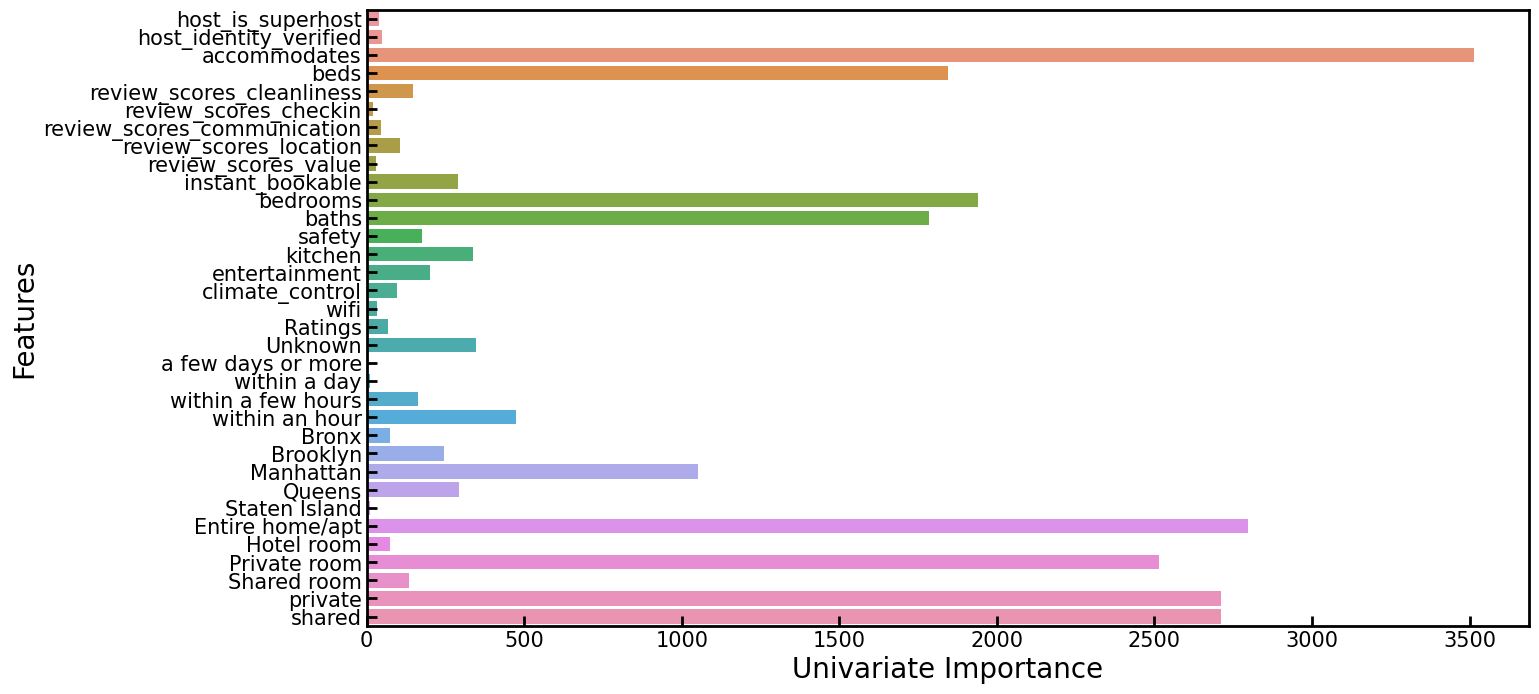

In [679]:
fig, axes = plt.subplots(1, 1, figsize=(15, 8))

ax = plt.subplot(1, 1, 1)
sns.barplot(x = importances.Univariate_Imp, y = importances.Features, ax = ax)
ax.set_ylabel("Features", fontsize = 20)
ax.set_xlabel("Univariate Importance", fontsize = 20)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

## Recursive Feature Elimination


In [680]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Create the linear regression model
model = LinearRegression()

# Create the RFE object and specify the number of features to select
rfe = RFE(model, n_features_to_select=X.shape[1])

# Fit the RFE object to the data
rfe.fit(X, y)

imp = {}
# Print the selected features and their rankings
for feature, rank in zip(range(X.shape[1]), rfe.ranking_):
    imp[X.columns[feature]] = rank


In [681]:
imp = pd.DataFrame(imp, index=range(0, len(imp))).drop_duplicates().T.reset_index()
imp.columns = ['Features', 'RFE_Rank']

In [682]:
importances = importances.merge(imp, on = 'Features')

## Tree-based Feature Selection


In [683]:
from sklearn.ensemble import RandomForestRegressor

# Fit an Extra Trees Classifier model to the data
model = RandomForestRegressor(n_jobs=-1)
model.fit(X, y)

# Get the importances of each feature
importances_vals = model.feature_importances_

imp = {}

# Print the feature importances
for feature, importance in zip(X.columns, importances_vals):
    # print(f"{feature}: importance score = {importance}")
    imp[feature] = importance


In [684]:
imp = pd.DataFrame(imp, index=range(0, len(imp))).drop_duplicates().T.reset_index()
imp.columns = ['Features', 'Tree_Based_Selection']

In [685]:
importances = importances.merge(imp, on = 'Features')

## Selecting Top Features

In [686]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

importances[['Univariate_Imp', 'RFE_Rank', 'Tree_Based_Selection']] = scaler.fit_transform(importances[['Univariate_Imp', 'RFE_Rank', 'Tree_Based_Selection']])

In [687]:
importances['AVG_IMP'] = importances[['Features', 'Univariate_Imp', 'RFE_Rank', 'Tree_Based_Selection']].mean(axis = 1)

In [688]:
importances.sort_values('AVG_IMP', ascending=False, inplace=True)

In [689]:
# Calculate the mean of the column
sum = importances['AVG_IMP'].sum()

# Subtract the mean from each value in the column
importances['AVG_IMP_Scaled'] = importances['AVG_IMP'] / sum

In [690]:
importances['AVG_IMP_Scaled'].sum()

1.0

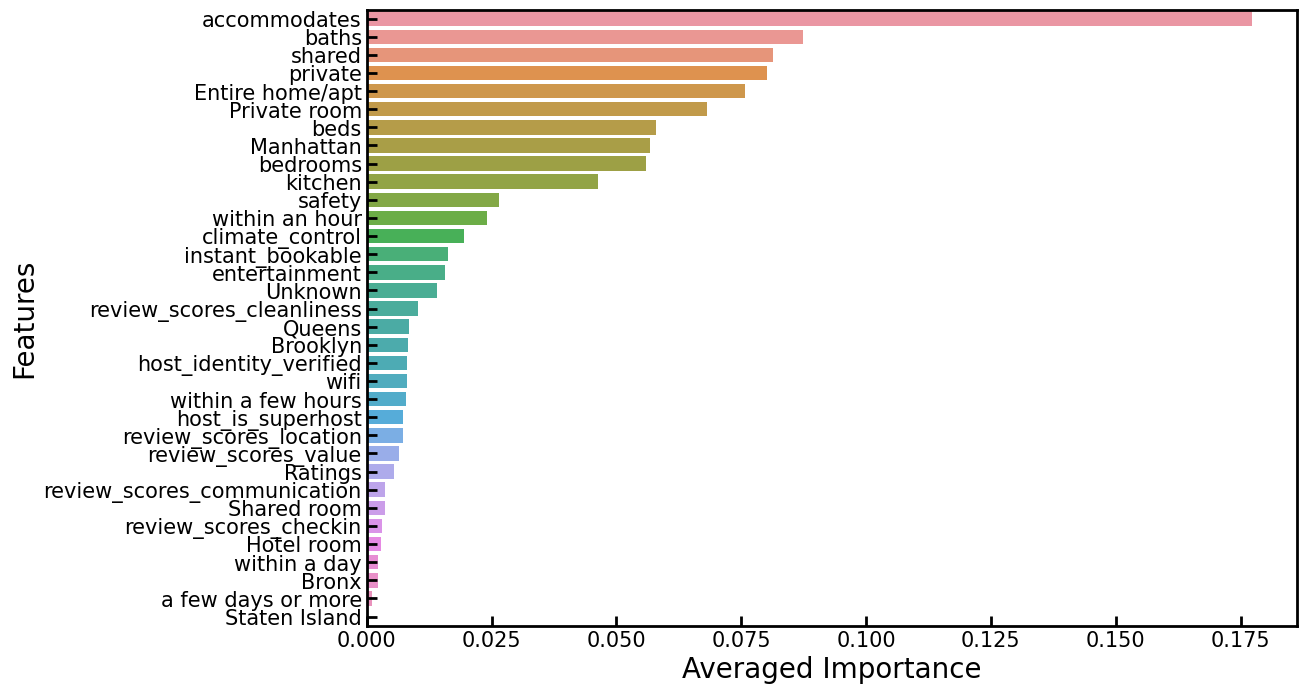

In [691]:
fig, axes = plt.subplots(1, 1, figsize=(12, 8))

ax = plt.subplot(1, 1, 1)
sns.barplot(x = importances.AVG_IMP_Scaled, y = importances.Features)
ax.set_ylabel("Features", fontsize = 20)
ax.set_xlabel("Averaged Importance", fontsize = 20)

ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=7)
ax.tick_params(which='minor', length=7)
ax.tick_params(which = 'both', direction = 'in')

<b> Lets only take those features that have at least 0.04 importances


In [692]:
threshold_importance = 0.01

In [693]:
importances[importances.AVG_IMP_Scaled >= threshold_importance].AVG_IMP_Scaled.sum() * 100

91.36652692023745

In [694]:
features_selected = list(importances[importances.AVG_IMP_Scaled >= threshold_importance].Features) # 0.025 old one
features_selected.append('price')

In [695]:
features_selected, len(features_selected)

(['accommodates',
  'baths',
  'shared',
  'private',
  'Entire home/apt',
  'Private room',
  'beds',
  'Manhattan',
  'bedrooms',
  'kitchen',
  'safety',
  'within an hour',
  'climate_control',
  'instant_bookable',
  'entertainment',
  'Unknown',
  'review_scores_cleanliness',
  'price'],
 18)

# Testing Models

In [696]:
df['price'] = original_price

In [697]:
df1 = df[features_selected]

In [698]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41528 entries, 0 to 41532
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   accommodates               41528 non-null  float64
 1   baths                      41528 non-null  float64
 2   shared                     41528 non-null  float64
 3   private                    41528 non-null  float64
 4   Entire home/apt            41528 non-null  float64
 5   Private room               41528 non-null  float64
 6   beds                       41528 non-null  float64
 7   Manhattan                  41528 non-null  float64
 8   bedrooms                   41528 non-null  float64
 9   kitchen                    41528 non-null  float64
 10  safety                     41528 non-null  float64
 11  within an hour             41528 non-null  float64
 12  climate_control            41528 non-null  float64
 13  instant_bookable           41528 non-null  flo

In [699]:
X = df1.drop("price", axis = 1)
y = df1.price

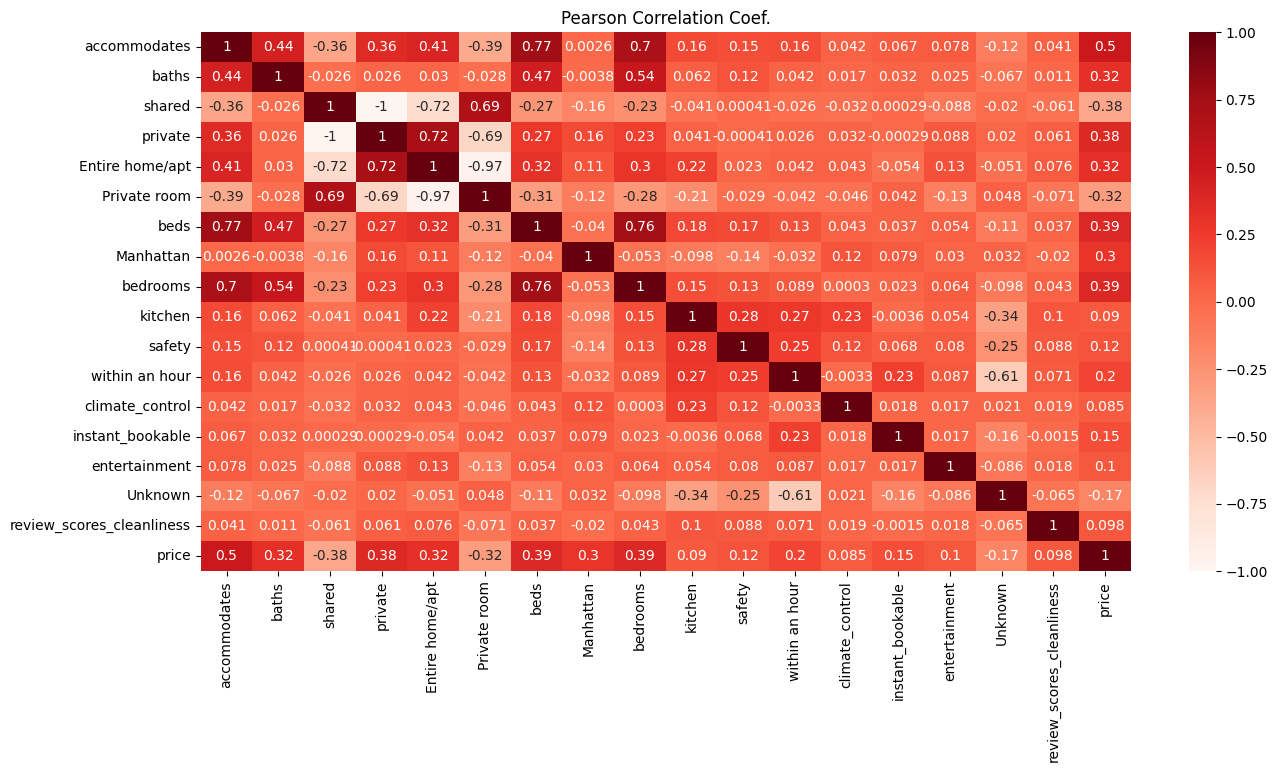

In [700]:
fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(df1.corr(method = 'pearson'), cmap = 'Reds', annot = True, ax = ax)
plt.title("Pearson Correlation Coef.")
# set various colors
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black') 
ax.spines['right'].set_color('black')
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_color('black')
ax.spines['left'].set_lw(2) 
# ax.tick_params(which='both', width=2)
# ax.tick_params(which='major', length=7)
# ax.tick_params(which='minor', length=7)
# ax.tick_params(which = 'both', direction = 'in')
plt.show()

# Classification

In [717]:
df.price.describe()

count    41528.000000
mean         1.345670
std          0.940789
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: price, dtype: float64

In [718]:
df1 = df[features_selected[:-1]]
df1['price'] = original_price

In [719]:
df1.shape

(41528, 18)

In [720]:
df1.price.describe()

count    41528.000000
mean         1.345670
std          0.940789
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: price, dtype: float64

In [721]:
X = df1[df1.columns[:-1]]
y = df1['price']

In [722]:
X.shape

(41528, 17)

In [723]:
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, roc_curve, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [724]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [725]:
X_train.shape, y_train.shape

((33222, 17), (33222,))

In [726]:
X_test.shape, y_test.shape

((8306, 17), (8306,))

## Hyperparamter Tuning Custom Function

In [319]:
# from sklearn.model_selection import RandomizedSearchCV

def evaluate_model(model, param_distributions, X_train, X_test, y_train, y_test):

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Create a RandomizedSearchCV object
    search = RandomizedSearchCV(model, param_distributions=param_distributions, cv=5, n_iter=10, n_jobs=-1, random_state=42)

    # Fit the RandomizedSearchCV object to the training data
    search.fit(X_train, y_train)

    # Get the best model and hyperparameters from the search object
    best_model = search.best_estimator_
    best_params = search.best_params_

    # Train the best model on the combined training and validation sets
    best_model.fit(X_train, y_train)

    # Make predictions on the training and testing sets
    train_preds = best_model.predict(X_train)
    val_preds = best_model.predict(X_val)
    test_preds = best_model.predict(X_test)

    # Compute the model's performance metrics
    train_accuracy = accuracy_score(y_train, train_preds)
    val_accuracy = accuracy_score(y_val, val_preds)
    test_accuracy = accuracy_score(y_test, test_preds)

    train_recall = recall_score(y_train, train_preds, average='weighted')
    val_recall = recall_score(y_val, val_preds, average='weighted')
    test_recall = recall_score(y_test, test_preds, average='weighted')

    train_precision = precision_score(y_train, train_preds, average='weighted')
    val_precision = precision_score(y_val, val_preds, average='weighted')
    test_precision = precision_score(y_test, test_preds, average='weighted')

    # Concatenate the model's performance metrics to a dataframe
    results = pd.DataFrame({
        'train_accuracy': [train_accuracy],
        'val_accuracy': [val_accuracy],
        'test_accuracy': [test_accuracy],
        'train_recall': [train_recall],
        'val_recall': [val_recall],
        'test_recall': [test_recall],
        'train_precision': [train_precision],
        'val_precision': [val_precision],
        'test_precision': [test_precision]
    }, index=[str(best_params)])
    
    return best_model, results


## Random Forest

In [320]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 10, 50, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': ['balanced', 'balanced_subsample', None],
    'n_jobs':[-1]
}

RandomForestModel = RandomForestClassifier()

In [321]:
RandomForest_Model, RandomForest_Results = evaluate_model(RandomForestModel, params, X_train, X_test, y_train, y_test)

In [322]:
RandomForest_Results['Model'] = 'Random Forest'
RandomForest_Results

train_accuracy  \
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...        0.765662   

                                                    val_accuracy  \
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...      0.713469   

                                                    test_accuracy  \
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...       0.711293   

                                                    train_recall  val_recall  \
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...      0.765662    0.713469   

                                                    test_recall  \
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...     0.711293   

                                                    train_precision  \
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...         0.767761   

                                                    val_precision  \
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...       0.691632   

                                                    test_precision  \
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...        0.694944   

                                                            Model  
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...  Random Forest

In [327]:
print("RandomForest CLASSIFIER")
preds = RandomForest_Model.predict(X_test)
print("TESTING ACCURACY: ", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

RandomForest CLASSIFIER
TESTING ACCURACY:  0.7112930411750542
              precision    recall  f1-score   support

           0       0.75      0.33      0.46       830
           1       0.73      0.94      0.83      5165
           2       0.51      0.30      0.37      1377
           3       0.69      0.15      0.25       430
           4       0.72      0.56      0.63       504

    accuracy                           0.71      8306
   macro avg       0.68      0.46      0.51      8306
weighted avg       0.69      0.71      0.67      8306



## XGBoost Classifier

In [328]:
from xgboost import XGBClassifier

params = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 1, 5, 10],
    'min_child_weight': [1, 3, 5, 7],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0, 0.1, 0.5, 1],
    'n_jobs': [-1]
}

xgboost_model = XGBClassifier()

In [329]:
XGBoost_Model, XGBoost_Results = evaluate_model(xgboost_model, params, X_train, X_test, y_train, y_test)

In [331]:
XGBoost_Results['Model'] = "XGBoost"
XGBoost_Results

train_accuracy  \
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...         0.71671   

                                                    val_accuracy  \
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...      0.703837   

                                                    test_accuracy  \
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...       0.696484   

                                                    train_recall  val_recall  \
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...       0.71671    0.703837   

                                                    test_recall  \
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...     0.696484   

                                                    train_precision  \
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...         0.697888   

                                                    val_precision  \
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...       0.676296   

                                                    test_precision    Model  
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...        0.666899  XGBoost

In [333]:
print("XGB CLASSIFIER")
preds = XGBoost_Model.predict(X_test)
print("TESTING ACCURACY: ", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

XGB CLASSIFIER
TESTING ACCURACY:  0.6964844690585119
              precision    recall  f1-score   support

           0       0.65      0.34      0.45       830
           1       0.74      0.92      0.82      5165
           2       0.47      0.30      0.37      1377
           3       0.51      0.13      0.21       430
           4       0.64      0.55      0.59       504

    accuracy                           0.70      8306
   macro avg       0.60      0.45      0.49      8306
weighted avg       0.67      0.70      0.66      8306



## LightGBM Classifier

In [334]:
import lightgbm as lgb

params = {
    'num_leaves': [5, 10, 20, 30, 50, 75, 100, 150],
    'max_depth': [3, 5, 7, 9, 11, 13, -1],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [50, 100, 200, 300, 500],
    'subsample': [0.5, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1, 2, 5, 10],
    'reg_lambda': [0, 0.1, 0.5, 1, 2, 5, 10],
    'min_child_samples': [1, 5, 10, 20, 30, 50],
    'min_child_weight': [1e-3, 1e-2, 1e-1, 0.5, 1, 2, 5, 10],
    'scale_pos_weight': [1, 2, 3, 4, 5],
    'boosting_type': ['gbdt', 'dart', 'goss'],
    'num_class': [5],
    'objective': ['multiclass'],
    'metric': ['multi_logloss'],
    'n_jobs':[-1]
}

LightGBM = lgb.LGBMClassifier()

In [335]:
LightGBM_Model, LightGBM_Results = evaluate_model(LightGBM, params, X_train, X_test, y_train, y_test)

In [336]:
LightGBM_Results['Model'] = 'LightGBM'
LightGBM_Results

train_accuracy  \
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...        0.709711   

                                                    val_accuracy  \
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...       0.70459   

                                                    test_accuracy  \
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...       0.699133   

                                                    train_recall  val_recall  \
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...      0.709711     0.70459   

                                                    test_recall  \
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...     0.699133   

                                                    train_precision  \
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...         0.693267   

                                                    val_precision  \
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...       0.681685   

                                                    test_precision     Model  
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...        0.677437  LightGBM

In [337]:
print("LightGBM CLASSIFIER")
preds = LightGBM_Model.predict(X_test)
print("TESTING ACCURACY: ", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

LightGBM CLASSIFIER
TESTING ACCURACY:  0.6991331567541537
              precision    recall  f1-score   support

           0       0.71      0.29      0.41       830
           1       0.73      0.94      0.82      5165
           2       0.48      0.28      0.35      1377
           3       0.66      0.11      0.19       430
           4       0.64      0.55      0.59       504

    accuracy                           0.70      8306
   macro avg       0.65      0.43      0.47      8306
weighted avg       0.68      0.70      0.66      8306



## Logistic Regression

In [339]:
from sklearn.linear_model import LogisticRegression

params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['ovr', 'multinomial']
}

Log_reg = LogisticRegression()

In [340]:
LogRegression_Model, LogRegression_Results = evaluate_model(Log_reg, params, X_train, X_test, y_train, y_test)

In [342]:
LogRegression_Results["Model"] = "Logistic Regression"
LogRegression_Results

train_accuracy  \
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...        0.672424   

                                                    val_accuracy  \
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...      0.676749   

                                                    test_accuracy  \
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...       0.670479   

                                                    train_recall  val_recall  \
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...      0.672424    0.676749   

                                                    test_recall  \
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...     0.670479   

                                                    train_precision  \
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...         0.630336   

                                                    val_precision  \
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...       0.626065   

                                                    test_precision  \
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...         0.64188   

                                                                  Model  
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...  Logistic Regression

In [343]:
print("LogRegression CLASSIFIER")
preds = LogRegression_Model.predict(X_test)
print("TESTING ACCURACY: ", accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

LogRegression CLASSIFIER
TESTING ACCURACY:  0.6704791716831207
              precision    recall  f1-score   support

           0       0.63      0.31      0.41       830
           1       0.70      0.93      0.80      5165
           2       0.40      0.19      0.26      1377
           3       0.75      0.01      0.01       430
           4       0.61      0.44      0.51       504

    accuracy                           0.67      8306
   macro avg       0.62      0.38      0.40      8306
weighted avg       0.64      0.67      0.61      8306



## Combining Results for All Models

In [344]:
results = pd.concat([RandomForest_Results, XGBoost_Results, LightGBM_Results, LogRegression_Results])

In [345]:
results

train_accuracy  \
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...        0.765662   
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...        0.716710   
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...        0.709711   
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...        0.672424   

                                                    val_accuracy  \
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...      0.713469   
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...      0.703837   
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...      0.704590   
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...      0.676749   

                                                    test_accuracy  \
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...       0.711293   
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...       0.696484   
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...       0.699133   
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...       0.670479   

                                                    train_recall  val_recall  \
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...      0.765662    0.713469   
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...      0.716710    0.703837   
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...      0.709711    0.704590   
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...      0.672424    0.676749   

                                                    test_recall  \
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...     0.711293   
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...     0.696484   
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...     0.699133   
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...     0.670479   

                                                    train_precision  \
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...         0.767761   
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...         0.697888   
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...         0.693267   
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...         0.630336   

                                                    val_precision  \
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...       0.691632   
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...       0.676296   
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...       0.681685   
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...       0.626065   

                                                    test_precision  \
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...        0.694944   
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...        0.666899   
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...        0.677437   
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...        0.641880   

                                                                  Model  
{'n_jobs': -1, 'n_estimators': 300, 'min_sample...        Random Forest  
{'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alph...              XGBoost  
{'subsample': 1.0, 'scale_pos_weight': 3, 'reg_...             LightGBM  
{'solver': 'saga', 'penalty': 'l1', 'multi_clas...  Logistic Regression

In [346]:
results.to_csv("Training_stats.csv", index = True)

# ROC Curve and Confusion Matrix

In [205]:
roc_auc_score, confusion_matrix

(<function sklearn.metrics._ranking.roc_auc_score(y_true, y_score, *, average='macro', sample_weight=None, max_fpr=None, multi_class='raise', labels=None)>,
 <function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>)

In [357]:
classes = list(price_categories.keys());classes

['Budget', 'Standard', 'Premium', 'Luxury', 'Ultra-Luxury']

In [370]:
classes = ['Budget', 'Standard', 'Premium', 'Luxury', 'Ultra\nLuxury']

Text(0.08, 0.5, 'Actual')

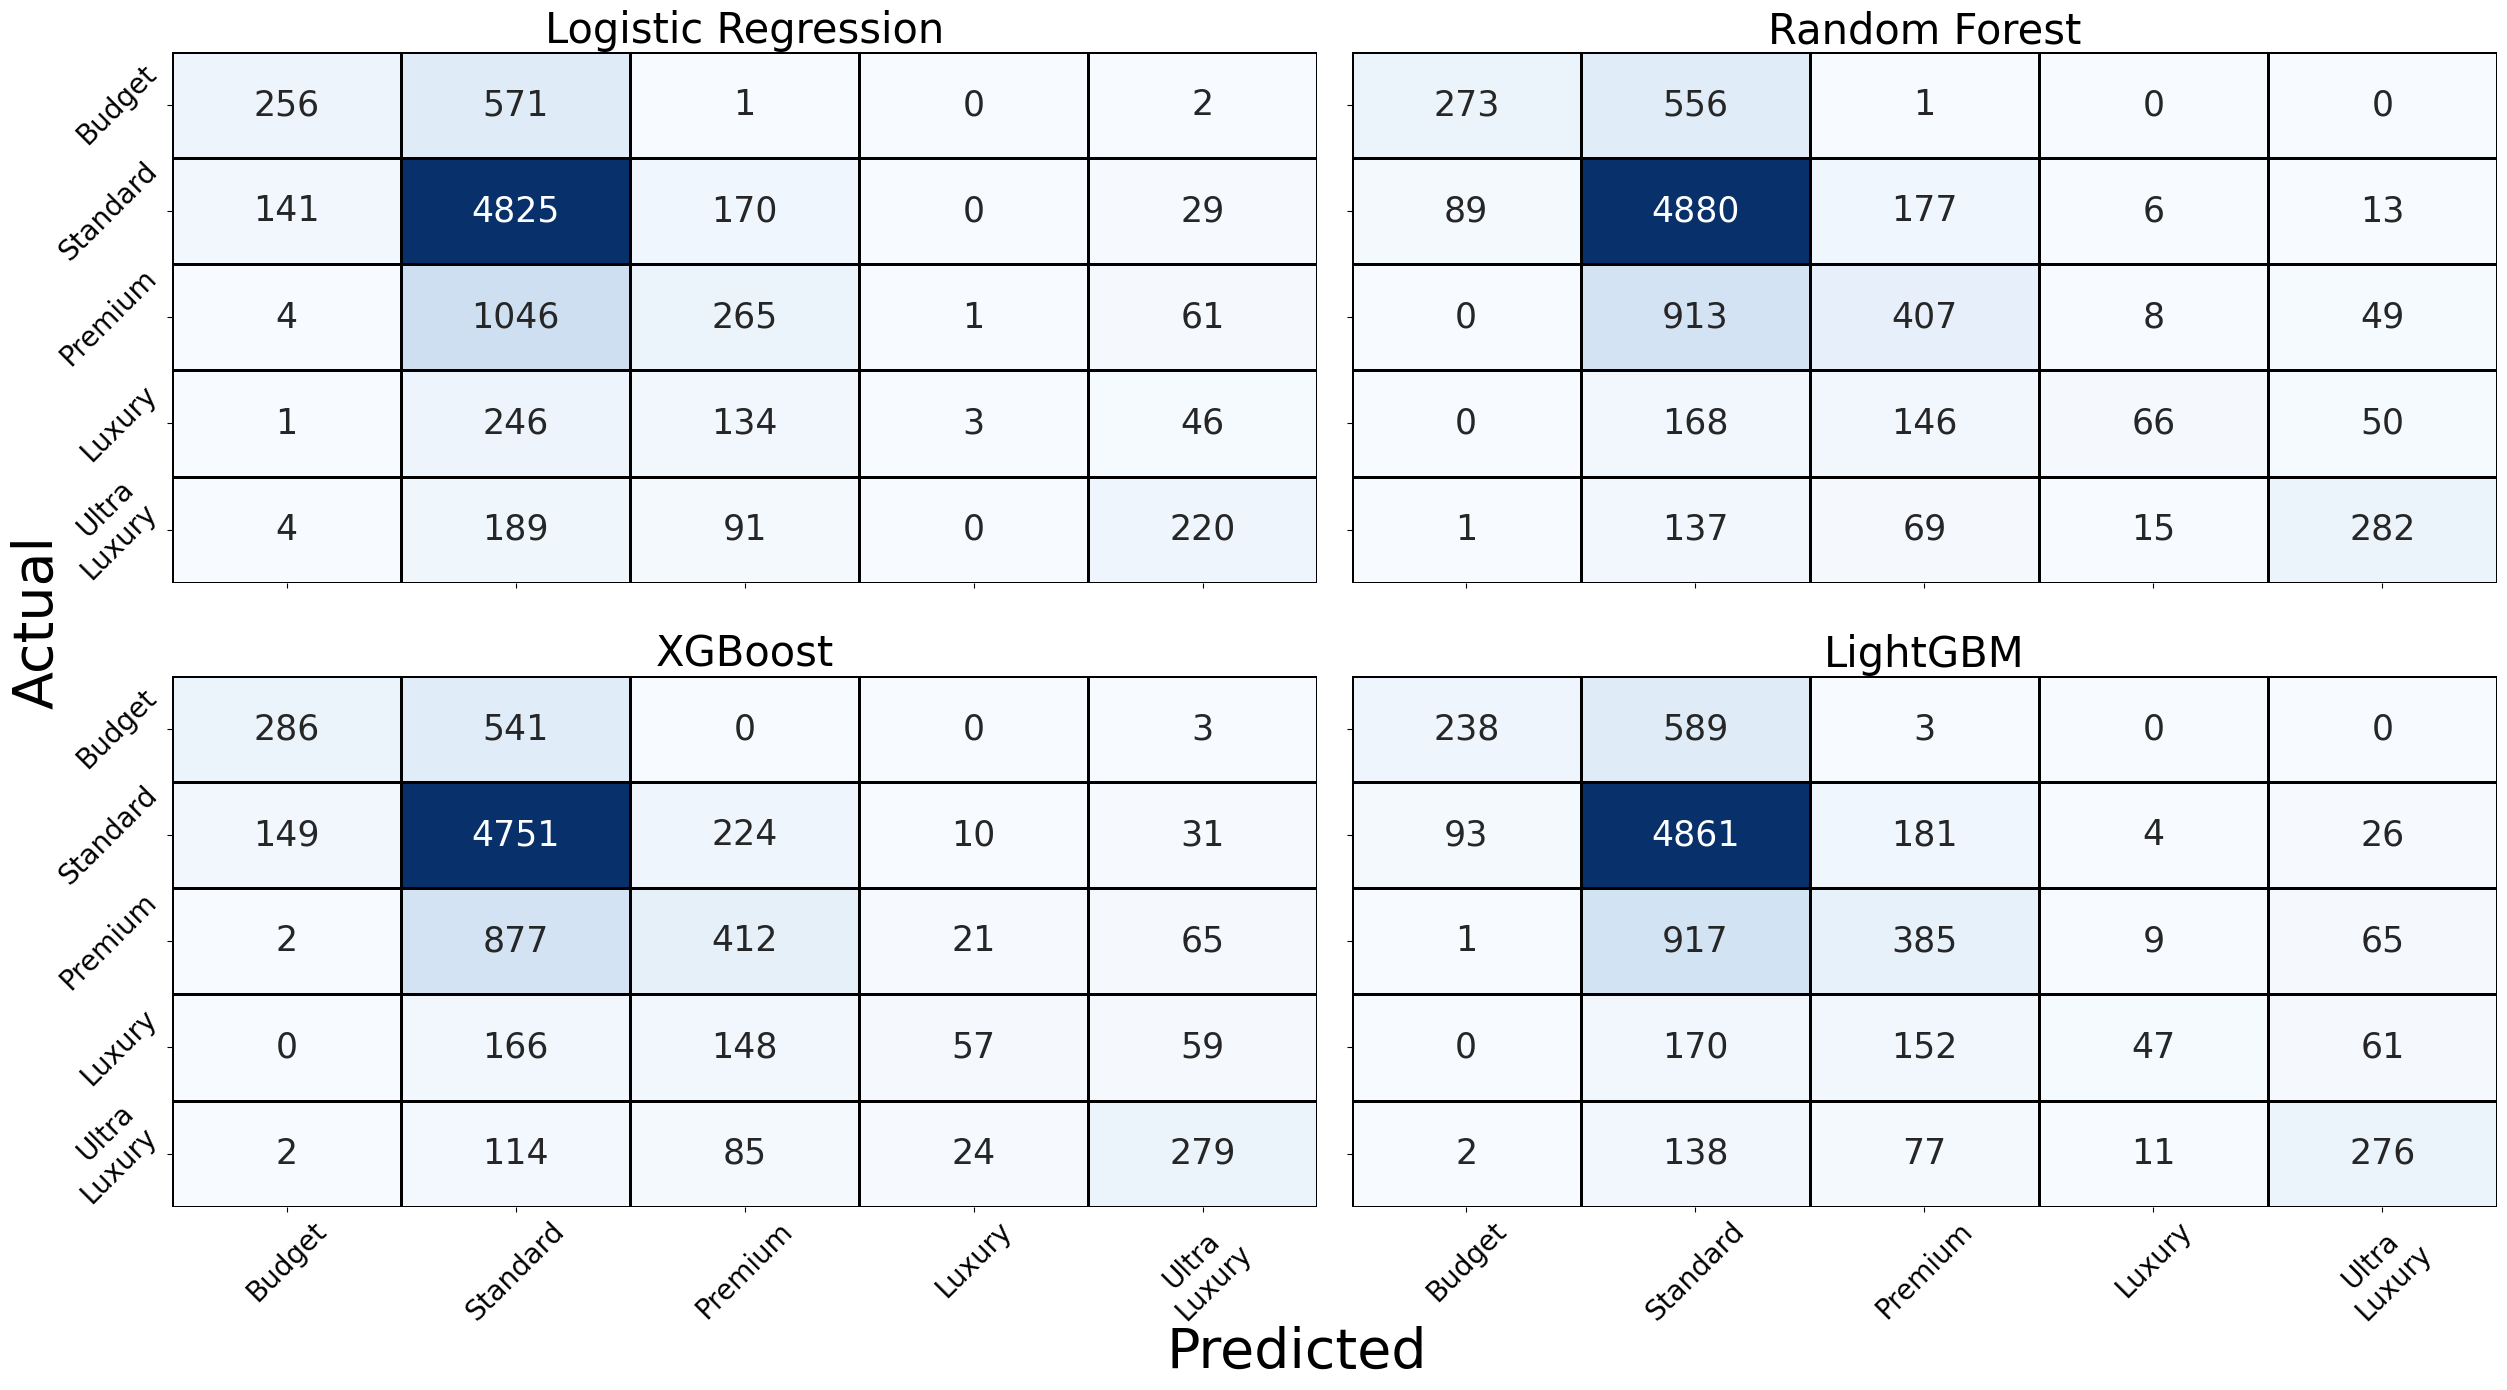

In [391]:
models = [LogRegression_Model, RandomForest_Model, XGBoost_Model, LightGBM_Model]
models_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM']

fig, axes = plt.subplots(2, 2, figsize=(30, 15))

for i, model_local in enumerate(models):
    ax1 = plt.subplot(2, 2, i+1)
    model_name = models_names[i]

    preds = model_local.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    dataframe = pd.DataFrame(cm, index = classes, columns = classes)
    
    # plot heatmap
    sns.heatmap(dataframe, cmap="Blues", annot=True, annot_kws={"fontsize": 25}, fmt="d", cbar=False, linewidths=2, linecolor='black')
    ax1.set_title(model_name, fontsize=30)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    
    # set various plot parameters
    ax1.xaxis.set_tick_params(labelsize=20)
    ax1.yaxis.set_tick_params(labelsize=20)
    ax1.spines['bottom'].set_color('black')
    ax1.spines['top'].set_color('black') 
    ax1.spines['right'].set_color('black')
    ax1.spines['right'].set_linewidth(2)
    ax1.spines['top'].set_linewidth(2)
    ax1.spines['bottom'].set_linewidth(2)
    ax1.spines['left'].set_color('black')
    ax1.spines['left'].set_lw(2) 

    if i == 1 or i == 3:
        ax1.set_yticklabels([])
    if i == 0 or i == 1:
        ax1.set_xticklabels([])

    
plt.subplots_adjust(wspace=0.03, hspace=0.175)
fig.text(0.5, 0.0125, 'Predicted', ha='center', va='center', fontsize=40)
fig.text(0.08, 0.5, 'Actual', ha='center', va='center', rotation='vertical', fontsize=40, color='black')


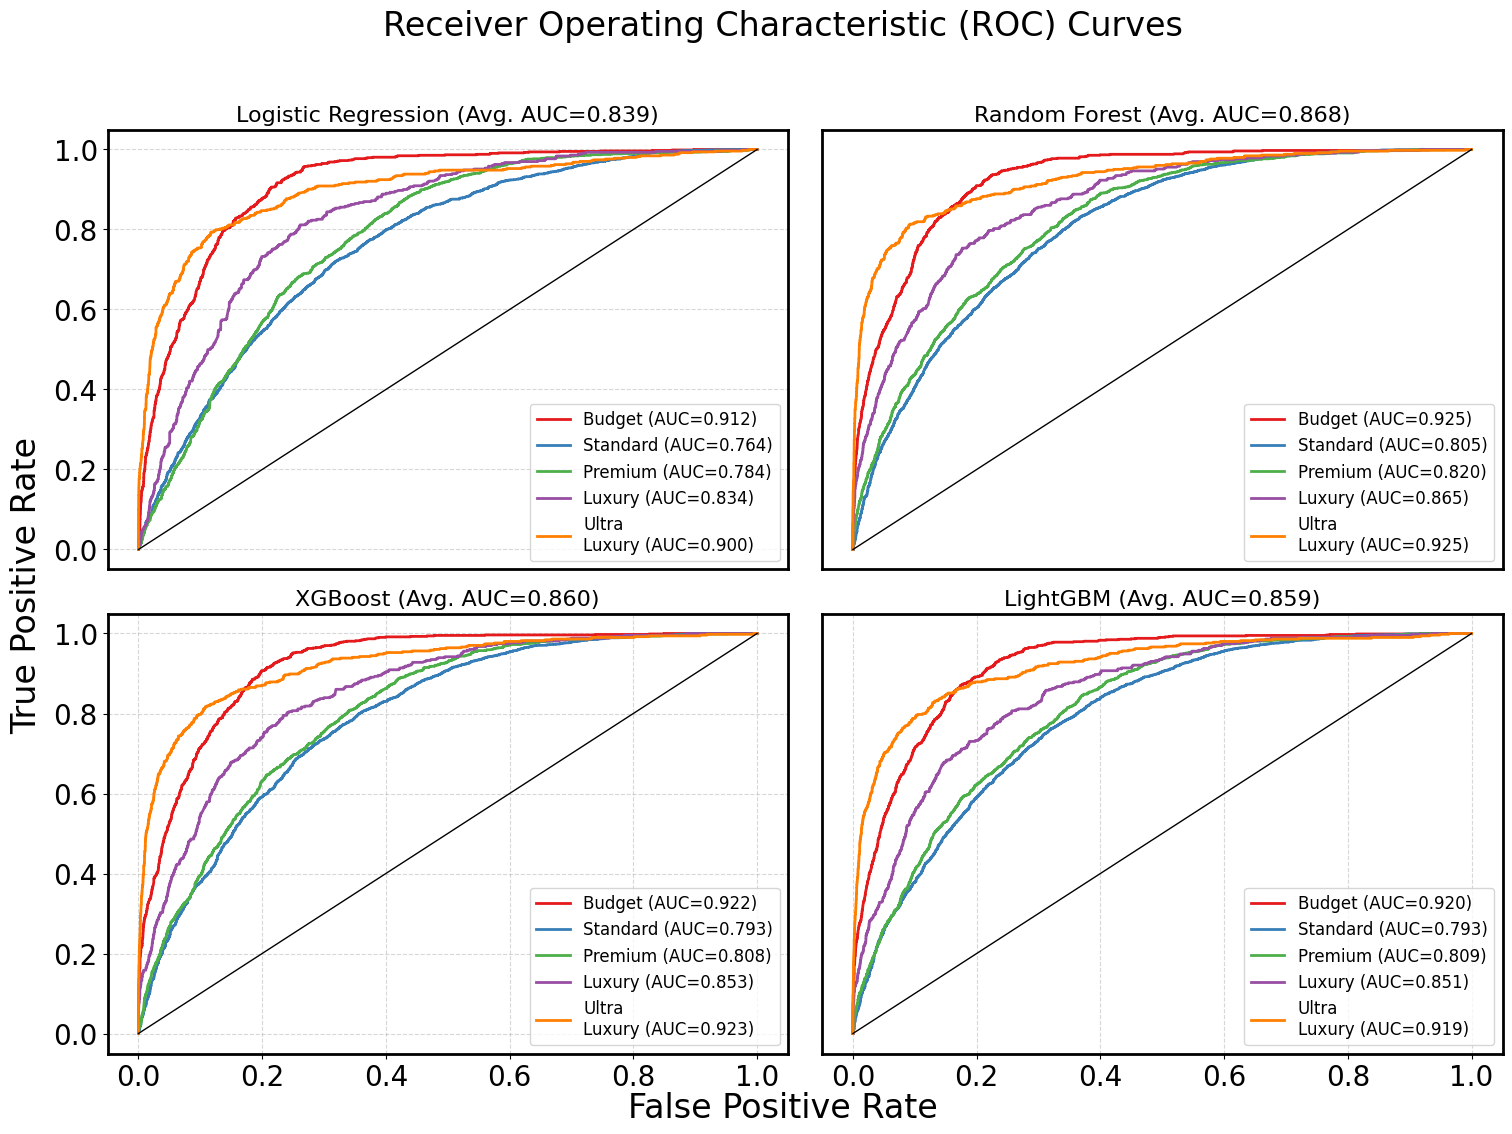

In [429]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# set a common font size
plt.rcParams.update({'font.size': 14})

# define a color palette for the curves
colors = sns.color_palette('Set1', n_colors=len(classes))

models = [LogRegression_Model, RandomForest_Model, XGBoost_Model, LightGBM_Model]
models_names = ['Logistic Regression', 'Random Forest', 'XGBoost', 'LightGBM']

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

for i, model_local in enumerate(models):
    ax = plt.subplot(2, 2, i+1)
    model_name = models_names[i]

    y_prob = model_local.predict_proba(X_test)
    auc_scores = []
    for j in range(len(classes)):
        fpr, tpr, thresholds = roc_curve(y_test == j, y_prob[:, j])
        auc_score = roc_auc_score(y_test == j, y_prob[:, j])
        auc_scores.append(auc_score)
        ax.plot(fpr, tpr, label=f'{classes[j]} (AUC={auc_score:.3f})', color=colors[j], linewidth=2)
        
    avg_auc_score = np.array(auc_scores).mean()
    ax.set_title(f'{model_name} (Avg. AUC={avg_auc_score:.3f})', fontsize=16, fontweight='normal')
    ax.legend(fontsize=12, markerscale=1.5)
    plt.plot([0, 1], [0, 1], color="black", linewidth = 1)

    # customize axis ticks
    if i == 0:
        ax.set_xticks([])
        ax.grid(True, linestyle='--', alpha=0.5)
    elif i == 1:
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(True, linestyle='--', alpha=0.5)
    elif i == 2:
        ax.grid(True, linestyle='--', alpha=0.5)
    elif i == 3:
        ax.set_yticks([])
        ax.grid(True, linestyle='--', alpha=0.5)

    # set various plot parameters
    ax.xaxis.set_tick_params(labelsize=20)
    ax.yaxis.set_tick_params(labelsize=20)
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_lw(2) 

plt.subplots_adjust(wspace=0.05, hspace=0.1)
fig.text(0.5, 0.065, 'False Positive Rate', ha='center', va='center', fontsize=24, fontweight='normal')
fig.text(0.08, 0.5, 'True Positive Rate', ha='center', va='center', rotation='vertical', fontsize=24, color='black', fontweight='normal')
fig.suptitle('Receiver Operating Characteristic (ROC) Curves', fontsize=24, fontweight='normal')
plt.show()